In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel(r"D:\Master Data Science\Graduation Project\cell2celltrain.xlsx",sheet_name =0)
df

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0                   -19.0  ...                          0            4   
1                     0.0  ...                          0            5   
2                     0.0  ...                          0            6   
3                     8.1  ...                          0            6   
4                    -0.2  ...                          0            9   
...                   ...  ...                        ...          ...   
51042                 NaN  ...                          0            6   
51043                15.9  ...                          0            9   
51044                 NaN  ...                          0            7   
51045                 NaN  ...                          0            9   
51046                 NaN  ...                          0            0   

       OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0                  No                          0            30   
1                  No                          0            30   
2                  No                          0       Unknown   
3                  No                          0            10   
4                  No                          1            10   
...               ...                        ...           ...   
51042              No                          0            60   
51043              No                          1            60   
51044              No                          1            80   
51045              No                          0            30   
51046              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other         Other   
4             

In [593]:
df['Handsets']

0        2.0
1        2.0
2        1.0
3        9.0
4        4.0
        ... 
51042    2.0
51043    2.0
51044    3.0
51045    2.0
51046    7.0
Name: Handsets, Length: 51047, dtype: float64

In [594]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [595]:
df['Churn'].value_counts(normalize =True)*100

Churn
No     71.18146
Yes    28.81854
Name: proportion, dtype: float64

# EDA

In [597]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")
    

Unique values in 'Churn': ['Yes' 'No']
Unique values in 'ServiceArea': ['SEAPOR503' 'PITHOM412' 'MILMIL414' 'OKCTUL918' 'OKCOKC405' 'SANMCA210'
 'SLCSLC801' 'LOULOU502' 'KCYKCK913' 'KCYNEW316' 'KCYKCM816' 'DENDEN303'
 'PHICTR610' 'OKCLRK501' 'OMADES515' 'SANAUS512' 'KCYWIC316' 'INDIND317'
 'SLCPRO801' 'OMALNC402' 'NSHNSH615' 'OMAOMA402' 'PHXTUC520' 'DALDAL214'
 'DALDTN940' 'DALFTW817' 'SANSAN210' 'NYCMAN917' 'NOLKEN504' 'MINMIN612'
 'NNYROC716' 'PHIARD610' 'NYCQUE917' 'DENBOU303' 'BOSBOS617' 'PHXPHX602'
 'NNYBUF716' 'DETTOL419' 'NNYSYR315' 'STLSTL314' 'PHIPHI215' 'SEABLV425'
 'MIAMIA305' 'PHICHC215' 'SEASEA206' 'BIRBIR205' 'MIADFD954' 'LOUNAL812'
 'MIADEL561' 'MIAFTL954' 'SEASPO509' 'SEATAC253' 'SFRSAC916' 'MIANDA305'
 'MINSTP612' 'MIAHWD954' 'NYCBRO917' 'PHIJEN215' 'OMACDR319' 'MIAWPB561'
 'SEAOLY360' 'PITBUT412' 'SEAEVE425' 'PHIMER609' 'SEACDA208' 'HARHAR860'
 'SFRSFR415' 'SFROAK510' 'SFRSCL408' 'NNYALB518' 'STLCOL618' 'NYCNEW201'
 'SFRPAL650' 'DETDET313' 'DETROS810' 'NYCNEW908' 'NYC

In [598]:
df

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0                   -19.0  ...                          0            4   
1                     0.0  ...                          0            5   
2                     0.0  ...                          0            6   
3                     8.1  ...                          0            6   
4                    -0.2  ...                          0            9   
...                   ...  ...                        ...          ...   
51042                 NaN  ...                          0            6   
51043                15.9  ...                          0            9   
51044                 NaN  ...                          0            7   
51045                 NaN  ...                          0            9   
51046                 NaN  ...                          0            0   

       OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0                  No                          0            30   
1                  No                          0            30   
2                  No                          0       Unknown   
3                  No                          0            10   
4                  No                          1            10   
...               ...                        ...           ...   
51042              No                          0            60   
51043              No                          1            60   
51044              No                          1            80   
51045              No                          0            30   
51046              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other         Other   
4             

In [599]:
df_dropped = df.drop(columns=["ServiceArea","AgeHH2","AdjustmentsToCreditRating"])
df_dropped


CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  ...  NotNewCellphoneUser  \
0                   -19.0  ...                   No   
1                     0.0  ...                   No   
2                     0.0  ...                   No   
3                     8.1  ...                   No   
4                    -0.2  ...                  Yes   
...                   ...  ...                  ...   
51042                 NaN  ...                   No   
51043                15.9  ...                   No   
51044                 NaN  ...                   No   
51045                 NaN  ...                   No   
51046                 NaN  ...                   No   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  HandsetPrice  \
0                              0            4              No            30   
1                              0            5              No            30   
2                              0            6              No       Unknown   
3                              0            6              No            10   
4                              0            9              No            10   
...                          ...          ...             ...           ...   
51042                          0            6              No            60   
51043                          0            9              No            60   
51044                          0            7              No            80   
51045                          0            9              No            30   
51046                          0            0              No            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other         Other   
4                           No     1-Highest      Other  Professional   
...          

# Missing Values

### Replacing unknown in marital status and handset prize to missing

In [602]:
df_dropped['MaritalStatus'].replace('Unknown', np.nan, inplace=True)
df_dropped

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  ...  NotNewCellphoneUser  \
0                   -19.0  ...                   No   
1                     0.0  ...                   No   
2                     0.0  ...                   No   
3                     8.1  ...                   No   
4                    -0.2  ...                  Yes   
...                   ...  ...                  ...   
51042                 NaN  ...                   No   
51043                15.9  ...                   No   
51044                 NaN  ...                   No   
51045                 NaN  ...                   No   
51046                 NaN  ...                   No   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  HandsetPrice  \
0                              0            4              No            30   
1                              0            5              No            30   
2                              0            6              No       Unknown   
3                              0            6              No            10   
4                              0            9              No            10   
...                          ...          ...             ...           ...   
51042                          0            6              No            60   
51043                          0            9              No            60   
51044                          0            7              No            80   
51045                          0            9              No            30   
51046                          0            0              No            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other         Other   
4                           No     1-Highest      Other  Professional   
...          

In [603]:
df_dropped.isna().sum() #after replacing UnKnown with NA

CustomerID                       0
Churn                            0
MonthlyRevenue                 156
MonthlyMinutes                 156
TotalRecurringCharge           156
DirectorAssistedCalls          156
OverageMinutes                 156
RoamingCalls                   156
PercChangeMinutes              367
PercChangeRevenues             367
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
Handsets                         1
HandsetModels                    1
CurrentEquipmentDays

#### Studying missing value in Marital Status & Handset price with target variable churn

In [605]:
#pd.crosstab(df_dropped['MaritalStatus_missing'], df_dropped['Churn'], normalize='index') * 100


**Then Missing in Marital Status is random, not related to target variable**

In [607]:
df_dropped['HandsetPrice'].replace('Unknown', np.nan, inplace=True)
df_dropped.isna().sum()

CustomerID                       0
Churn                            0
MonthlyRevenue                 156
MonthlyMinutes                 156
TotalRecurringCharge           156
DirectorAssistedCalls          156
OverageMinutes                 156
RoamingCalls                   156
PercChangeMinutes              367
PercChangeRevenues             367
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
Handsets                         1
HandsetModels                    1
CurrentEquipmentDays

In [608]:
df_dropped['HandsetPrice'].replace('Unknown', np.nan, inplace=True)
df_dropped.isna().sum()

CustomerID                       0
Churn                            0
MonthlyRevenue                 156
MonthlyMinutes                 156
TotalRecurringCharge           156
DirectorAssistedCalls          156
OverageMinutes                 156
RoamingCalls                   156
PercChangeMinutes              367
PercChangeRevenues             367
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
Handsets                         1
HandsetModels                    1
CurrentEquipmentDays

In [609]:
df_dropped['HandsetPrice_missing'] = df_dropped['HandsetPrice'].isnull().astype(int)
df_dropped

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0                   -19.0  ...                          0            4   
1                     0.0  ...                          0            5   
2                     0.0  ...                          0            6   
3                     8.1  ...                          0            6   
4                    -0.2  ...                          0            9   
...                   ...  ...                        ...          ...   
51042                 NaN  ...                          0            6   
51043                15.9  ...                          0            9   
51044                 NaN  ...                          0            7   
51045                 NaN  ...                          0            9   
51046                 NaN  ...                          0            0   

       OwnsMotorcycle  HandsetPrice  MadeCallToRetentionTeam  CreditRating  \
0                  No          30.0                      Yes     1-Highest   
1                  No          30.0                       No      4-Medium   
2                  No           NaN                       No        3-Good   
3                  No          10.0                       No      4-Medium   
4                  No          10.0                       No     1-Highest   
...               ...           ...                      ...           ...   
51042              No          60.0                       No     1-Highest   
51043              No          60.0                       No        3-Good   
51044              No          80.0                       No         5-Low   
51045              No          30.0                       No         5-Low   
51046              No          60.0                      Yes         5-Low   

       PrizmCode    Occupation  MaritalStatus  HandsetPrice_missing  
0       Suburban  Professional             No                     0  
1       Suburban  Professional            Yes                     0  
2           Town        C

In [610]:
pd.crosstab(df_dropped['HandsetPrice_missing'], df_dropped['Churn'], normalize='index') * 100


Churn                        No        Yes
HandsetPrice_missing                      
0                     72.961704  27.038296
1                     69.826099  30.173901

In [611]:
df_dropped['MaritalStatusmissing'] = df_dropped['MaritalStatus'].isnull().astype(int)
pd.crosstab(df_dropped['MaritalStatusmissing'], df_dropped['Churn'], normalize='index') * 100



Churn                        No        Yes
MaritalStatusmissing                      
0                     72.041982  27.958018
1                     69.812183  30.187817

**Handset price also doesn't relate to Churn, so it's random**

#### Study missing values by Charts

In [614]:
!pip install missingno

In [615]:
df3_dropped= df_dropped. drop(columns= ["HandsetPrice_missing","AgeHH1"])


In [616]:
import missingno as msno

In [617]:
plt.figure(figsize=(12, 8))
msno.bar(df3_dropped)
save_path = r"D:\Master Data Science\Graduation Project\missing values\barmissing_distribution.png"
plt.savefig(save_path)
plt.close()  

***most of missing values exist in Marital Status and HandsetPrice and a little in variables like Monthly revenue, Monthly minutes, TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes, Roaming calls***

In [619]:

plt.figure(figsize=(20, 12)) 
msno.matrix(df3_dropped, labels=True, fontsize=10)
save_path = r"D:\Master Data Science\Graduation Project\missing values\matrixmissing3_distribution.png"
plt.savefig(save_path, bbox_inches='tight')
plt.close()



<Figure size 2000x1200 with 0 Axes>

In [620]:
df4_dropped= df3_dropped.drop(columns ='MaritalStatus')
df4_dropped.isna().sum()

CustomerID                       0
Churn                            0
MonthlyRevenue                 156
MonthlyMinutes                 156
TotalRecurringCharge           156
DirectorAssistedCalls          156
OverageMinutes                 156
RoamingCalls                   156
PercChangeMinutes              367
PercChangeRevenues             367
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
Handsets                         1
HandsetModels                    1
CurrentEquipmentDays

In [621]:
df4_dropped[df4_dropped['HandsetPrice'].notnull()].groupby('Churn')['HandsetPrice'].mean()


Churn
No     82.271570
Yes    82.147167
Name: HandsetPrice, dtype: float64

<Axes: xlabel='Churn', ylabel='HandsetPrice'>

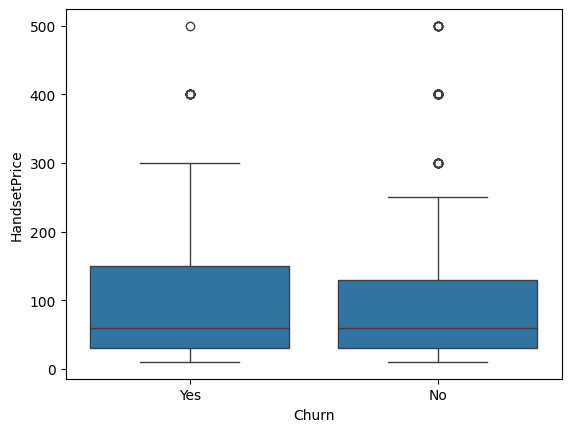

In [622]:
sns.boxplot(data=df4_dropped, x='Churn', y='HandsetPrice')

***I think Handset price not affecting to customer churn so i will drop it***

In [624]:
df5_dropped= df4_dropped.drop(columns ='HandsetPrice')
df5_dropped.isna().sum()


CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
ChildrenInHH                   0
HandsetRef

In [625]:
msno.heatmap(df5_dropped)
save_path = r"D:\Master Data Science\Graduation Project\missing values\heatmapmissing_distribution.png"
plt.savefig(save_path, bbox_inches='tight')
plt.close()


***"MonthlyMinutes, TotalRecurringChange,DirectorAssistedCalls,OverageMinutes,RoamingCalls), their missing values are highly correlated which means that there are shared 156 missing in all that columns and "Handsets, HandsetModels,CurrentEquipmentDays" are highly correlated which means that there's shared 1 missing in that columns >> total missing will be dropped is 157 then the data will be 50,891 instead of 51,047***

In [627]:
df6_dropped = df5_dropped.dropna()

In [628]:
df6_dropped

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  NewCellphoneUser  NotNewCellphoneUser  \
0                   -19.0  ...                No                   No   
1                     0.0  ...               Yes                   No   
2                     0.0  ...               Yes                   No   
3                     8.1  ...               Yes                   No   
4                    -0.2  ...                No                  Yes   
...                   ...  ...               ...                  ...   
51037               -13.2  ...                No                   No   
51039                 0.0  ...                No                   No   
51040                -2.0  ...                No                   No   
51041                 0.0  ...                No                   No   
51043                15.9  ...                No                   No   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                              0            4              No   
1                              0            5              No   
2                              0            6              No   
3                              0            6              No   
4                              0            9              No   
...                          ...          ...             ...   
51037                          0            3              No   
51039                          0            0              No   
51040                          0            7              No   
51041                          0            2              No   
51043                          0            9              No   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other         Other   
4                           No     1-H

### Check for Outliers

In [630]:
numeric_cols = df6_dropped.select_dtypes(include=['int', 'float']).columns
numeric_cols


Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'MaritalStatusmissing'],
      dtype='object')

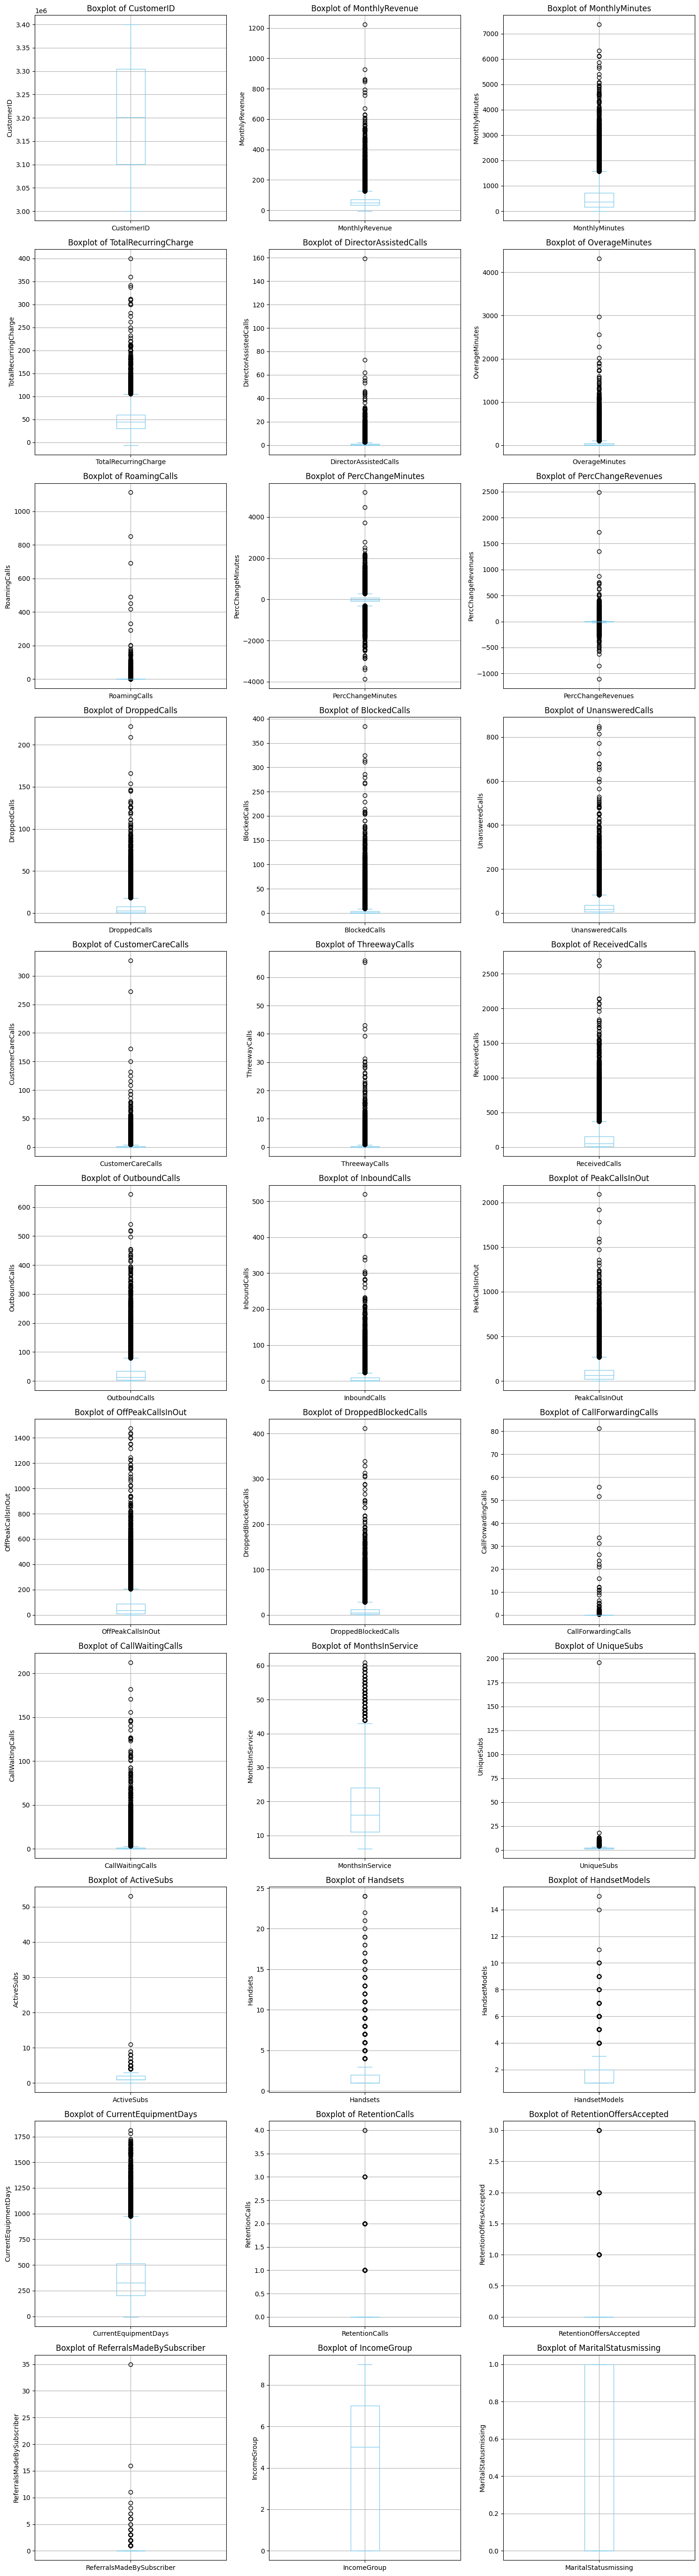

In [631]:
def plot_boxplots_pandas(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns


# Set the number of rows and columns for subplots
    cols_per_row = 3
    rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row  # Ceiling division
    
    # Create a figure with subplots
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 5))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    # Plot boxplots for each numeric column
    for i, col in enumerate(numeric_cols):
        df.boxplot(column=col, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

plot_boxplots_pandas(df6_dropped)



In [632]:
import os
import matplotlib.pyplot as plt

def plot_and_save_boxplots(df, save_dir):
    # Make sure the save directory exists
    os.makedirs(save_dir, exist_ok=True)

    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns

    for col in numeric_cols:
        # Create a new figure
        fig, ax = plt.subplots(figsize=(6, 6))

        # Draw colored boxplot
        bp = ax.boxplot(df[col].dropna(), patch_artist=True)

        # Custom colors
        for box in bp['boxes']:
            box.set(facecolor='skyblue')
        for whisker in bp['whiskers']:
            whisker.set(color='blue')
        for cap in bp['caps']:
            cap.set(color='blue')
        for median in bp['medians']:
            median.set(color='red')

        ax.set_ylabel(col)
        ax.set_xticks([])
        # Save the figure
        filename = f"boxplot_{col}.png"
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()  # Close the figure to free memory

        print(f"Saved: {save_path}")




In [633]:
save_folder = r"D:\Master Data Science\Graduation Project\Outliers\boxplots"
plot_and_save_boxplots(df6_dropped, save_folder)


Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_CustomerID.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_MonthlyRevenue.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_MonthlyMinutes.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_TotalRecurringCharge.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_DirectorAssistedCalls.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_OverageMinutes.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_RoamingCalls.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_PercChangeMinutes.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_PercChangeRevenues.png
Saved: D:\Master Data Science\Graduation Project\Outliers\boxplots\boxplot_DroppedCalls.png
Saved: D:\Master Data Science\Graduation Project

In [634]:
# List of columns to drop
columns_to_drop = [
    "NotNewCellphoneUser",
    "NonUSTravel",
    "HandsetModels"
]

# Drop specified columns from df6_dropped
df7_dropped = df6_dropped.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df7_dropped


CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  RetentionOffersAccepted  NewCellphoneUser  \
0                   -19.0  ...                        0                No   
1                     0.0  ...                        0               Yes   
2                     0.0  ...                        0               Yes   
3                     8.1  ...                        0               Yes   
4                    -0.2  ...                        0                No   
...                   ...  ...                      ...               ...   
51037               -13.2  ...                        0                No   
51039                 0.0  ...                        0                No   
51040                -2.0  ...                        0                No   
51041                 0.0  ...                        0                No   
51043                15.9  ...                        0                No   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                              0            4              No   
1                              0            5              No   
2                              0            6              No   
3                              0            6              No   
4                              0            9              No   
...                          ...          ...             ...   
51037                          0            3              No   
51039                          0            0              No   
51040                          0            7              No   
51041                          0            2              No   
51043                          0            9              No   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other        

In [635]:
df7_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50679 entries, 0 to 51043
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 50679 non-null  int64  
 1   Churn                      50679 non-null  object 
 2   MonthlyRevenue             50679 non-null  float64
 3   MonthlyMinutes             50679 non-null  float64
 4   TotalRecurringCharge       50679 non-null  float64
 5   DirectorAssistedCalls      50679 non-null  float64
 6   OverageMinutes             50679 non-null  float64
 7   RoamingCalls               50679 non-null  float64
 8   PercChangeMinutes          50679 non-null  float64
 9   PercChangeRevenues         50679 non-null  float64
 10  DroppedCalls               50679 non-null  float64
 11  BlockedCalls               50679 non-null  float64
 12  UnansweredCalls            50679 non-null  float64
 13  CustomerCareCalls          50679 non-null  float64


In [636]:
columns_to_drop = [ "BuysViaMailOrder",
                   "HandsetWebCapable",
                   "ChildrenInHH",
                   "DroppedBlockedCalls"]
                                             
# Drop specified columns from df6_dropped
df8_dropped = df7_dropped.drop(columns=columns_to_drop)

# Display the resulting DataFrame
df8_dropped

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  RetentionOffersAccepted  NewCellphoneUser  \
0                   -19.0  ...                        0                No   
1                     0.0  ...                        0               Yes   
2                     0.0  ...                        0               Yes   
3                     8.1  ...                        0               Yes   
4                    -0.2  ...                        0                No   
...                   ...  ...                      ...               ...   
51037               -13.2  ...                        0                No   
51039                 0.0  ...                        0                No   
51040                -2.0  ...                        0                No   
51041                 0.0  ...                        0                No   
51043                15.9  ...                        0                No   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                              0            4              No   
1                              0            5              No   
2                              0            6              No   
3                              0            6              No   
4                              0            9              No   
...                          ...          ...             ...   
51037                          0            3              No   
51039                          0            0              No   
51040                          0            7              No   
51041                          0            2              No   
51043                          0            9              No   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                          Yes     1-Highest   Suburban  Professional   
1                           No      4-Medium   Suburban  Professional   
2                           No        3-Good       Town        Crafts   
3                           No      4-Medium      Other        

In [637]:
df8_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50679 entries, 0 to 51043
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 50679 non-null  int64  
 1   Churn                      50679 non-null  object 
 2   MonthlyRevenue             50679 non-null  float64
 3   MonthlyMinutes             50679 non-null  float64
 4   TotalRecurringCharge       50679 non-null  float64
 5   DirectorAssistedCalls      50679 non-null  float64
 6   OverageMinutes             50679 non-null  float64
 7   RoamingCalls               50679 non-null  float64
 8   PercChangeMinutes          50679 non-null  float64
 9   PercChangeRevenues         50679 non-null  float64
 10  DroppedCalls               50679 non-null  float64
 11  BlockedCalls               50679 non-null  float64
 12  UnansweredCalls            50679 non-null  float64
 13  CustomerCareCalls          50679 non-null  float64


In [638]:
import pandas as pd

outlier_dfs = {}
numeric_cols = df8_dropped.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_cols:
    Q1 = df8_dropped[col].quantile(0.25)
    Q3 = df8_dropped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    outliers = df8_dropped[(df8_dropped[col] < lower_whisker) | (df8_dropped[col] > upper_whisker)]

    if not outliers.empty:
        outlier_dfs[col] = outliers

# Example: Access outliers for a specific column
# outlier_dfs["MonthlyRevenue"]

# To check which columns have outliers:
print("Columns with outliers:")
print(list(outlier_dfs.keys()))


Columns with outliers:
['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber']


In [639]:
outlier_dfs["BlockedCalls"]["BlockedCalls"].sort_values().unique()


array([  9.3,   9.7,  10. ,  10.3,  10.7,  11. ,  11.3,  11.7,  12. ,
        12.3,  12.7,  13. ,  13.3,  13.7,  14. ,  14.3,  14.7,  15. ,
        15.3,  15.7,  16. ,  16.3,  16.7,  17. ,  17.3,  17.7,  18. ,
        18.3,  18.7,  19. ,  19.3,  19.7,  20. ,  20.3,  20.7,  21. ,
        21.3,  21.7,  22. ,  22.3,  22.7,  23. ,  23.3,  23.7,  24. ,
        24.3,  24.7,  25. ,  25.3,  25.7,  26. ,  26.3,  26.7,  27. ,
        27.3,  27.7,  28. ,  28.3,  28.7,  29. ,  29.3,  29.7,  30. ,
        30.3,  30.7,  31. ,  31.3,  31.7,  32. ,  32.3,  32.7,  33. ,
        33.3,  33.7,  34. ,  34.3,  34.7,  35. ,  35.3,  35.7,  36. ,
        36.3,  36.7,  37. ,  37.3,  37.7,  38. ,  38.3,  38.7,  39. ,
        39.3,  39.7,  40. ,  40.3,  40.7,  41. ,  41.3,  41.7,  42. ,
        42.3,  42.7,  43. ,  43.3,  43.7,  44. ,  44.3,  44.7,  45. ,
        45.3,  45.7,  46. ,  46.3,  46.7,  47. ,  47.3,  47.7,  48. ,
        48.3,  48.7,  49. ,  49.3,  49.7,  50. ,  50.3,  50.7,  51. ,
        51.3,  51.7,

# EDA

In [641]:
df8_dropped.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'HandsetRefurbished', 'TruckOwner',
       'RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing'],
      dtype='object')

**Categorical: Churn - RespondsToMailOffers - UniqueSubs-ActiveSubs- OptOutMailings -TruckOwner- RVOwner- Homeownership- OwnsMotorcycle- OwnsComputer- NewCellphoneUser - IncomeGroup - MadeCallToRetentionTeam - CreditRating - PrizmCode - Occupation**

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\252210583.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='pastel')
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\252210583.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='pastel')
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\252210583.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_c

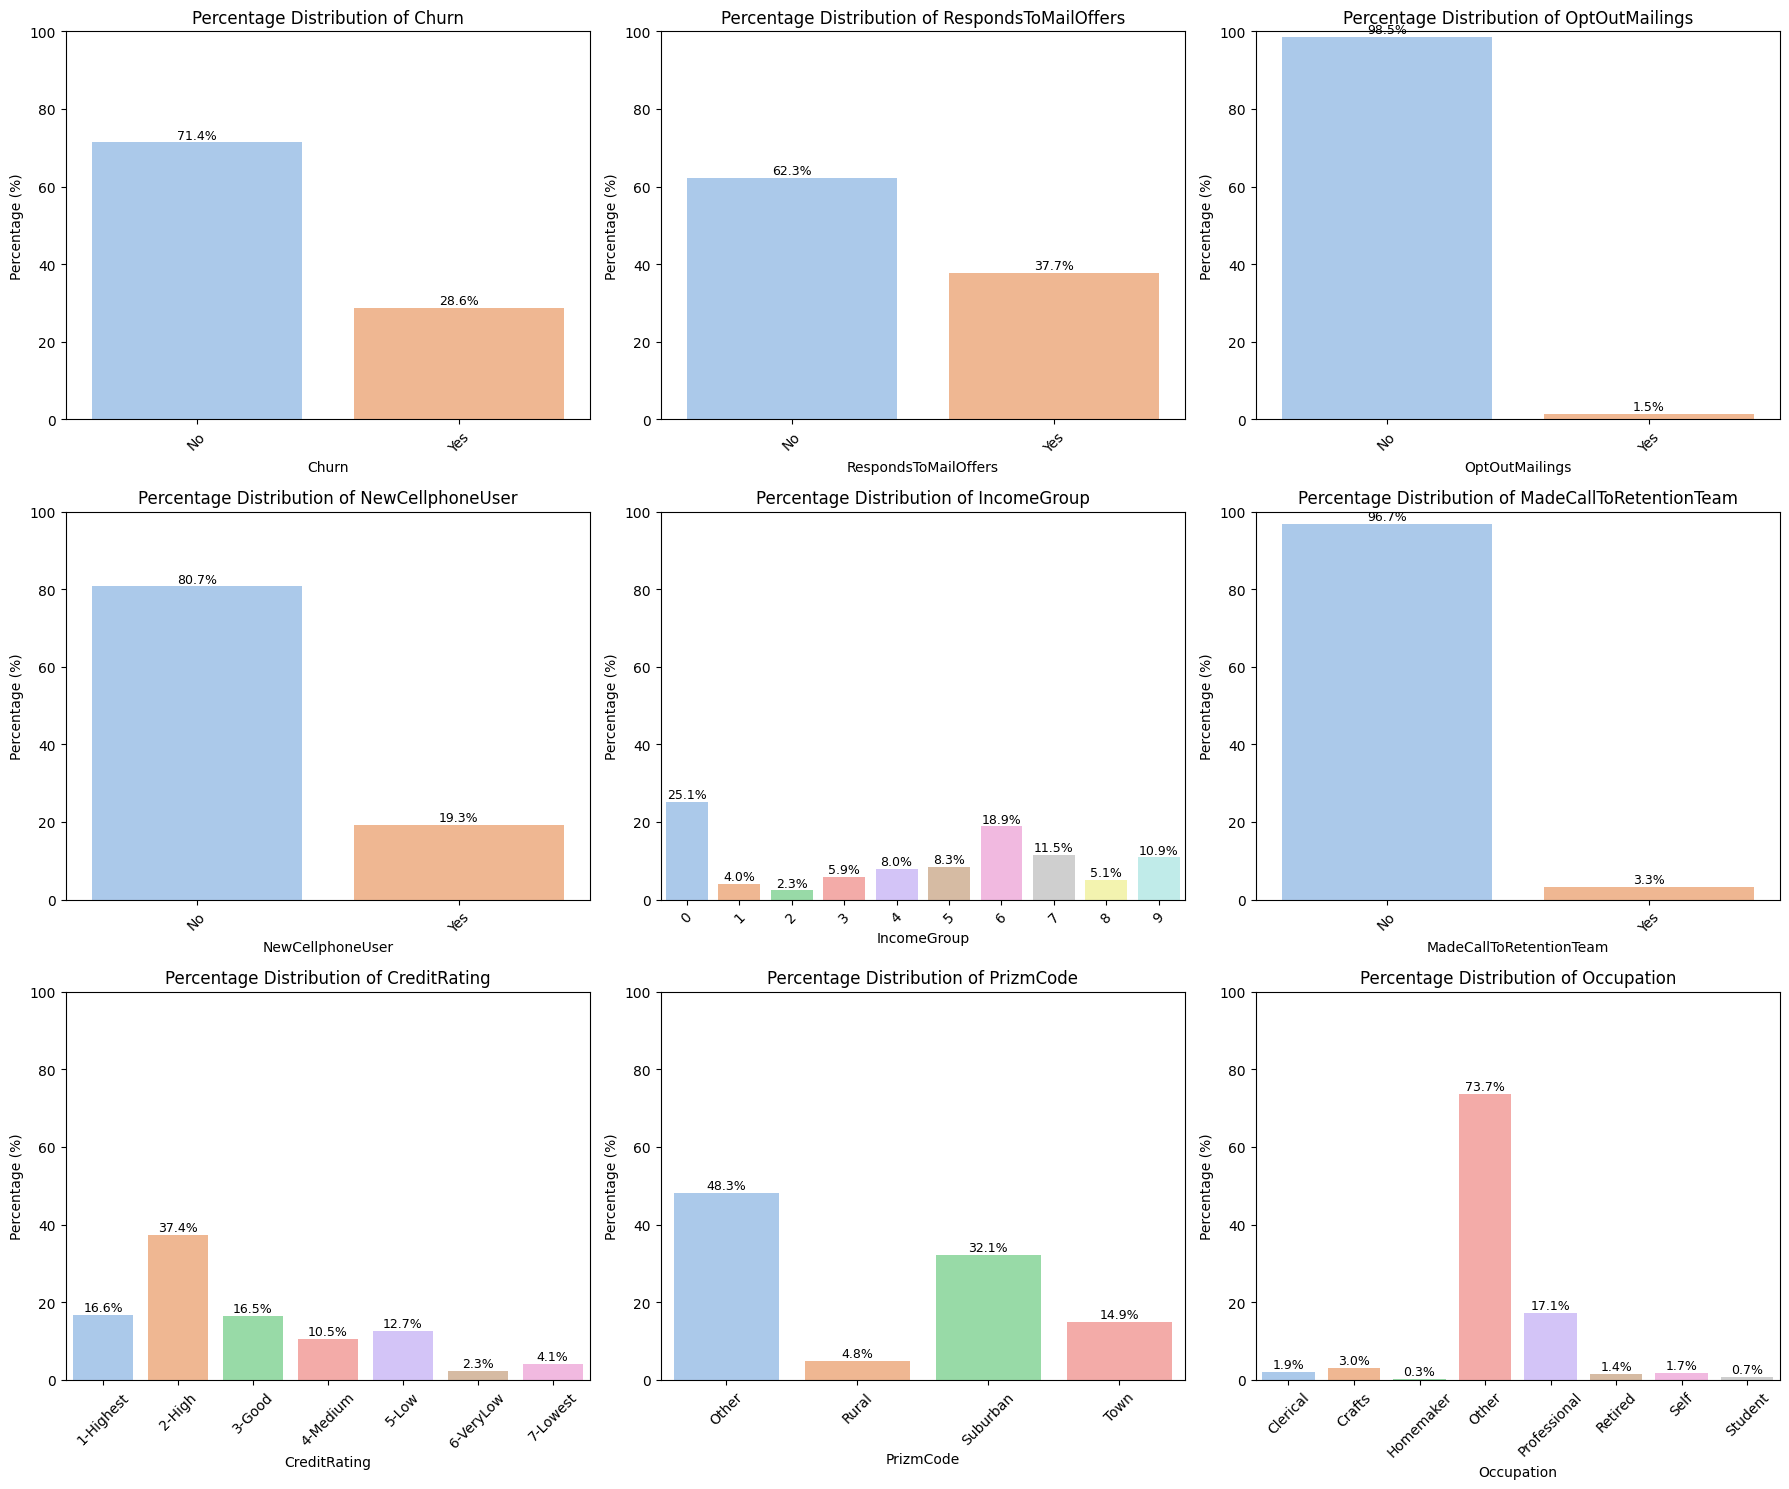

In [643]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_percentage_bars(df, categorical_cols, cols_per_row=3):
    total_plots = len(categorical_cols)
    rows = (total_plots + cols_per_row - 1) // cols_per_row
    
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row*6, rows*5))
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        # Calculate percentage counts
        value_counts = df[col].value_counts(normalize=True).sort_index() * 100
        
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='pastel')
        axes[i].set_title(f'Percentage Distribution of {col}')
        axes[i].set_ylabel('Percentage (%)')
        axes[i].set_xlabel(col)
        axes[i].set_ylim(0, 100)
        
        # Add percentage labels on each bar
        for j, val in enumerate(value_counts.values):
            axes[i].text(j, val+1 , f'{val:.1f}%', ha='center', fontsize=9)
        
        # Rotate x-axis labels if too long
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide unused subplots if any
    for k in range(i+1, len(axes)):
        axes[k].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Usage example:
categorical_vars = [
    'Churn', 'RespondsToMailOffers', 'OptOutMailings', 'NewCellphoneUser',
    'IncomeGroup', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation'
]

# Call the plotting function with your DataFrame, e.g. df:
plot_categorical_percentage_bars(df8_dropped, categorical_vars)


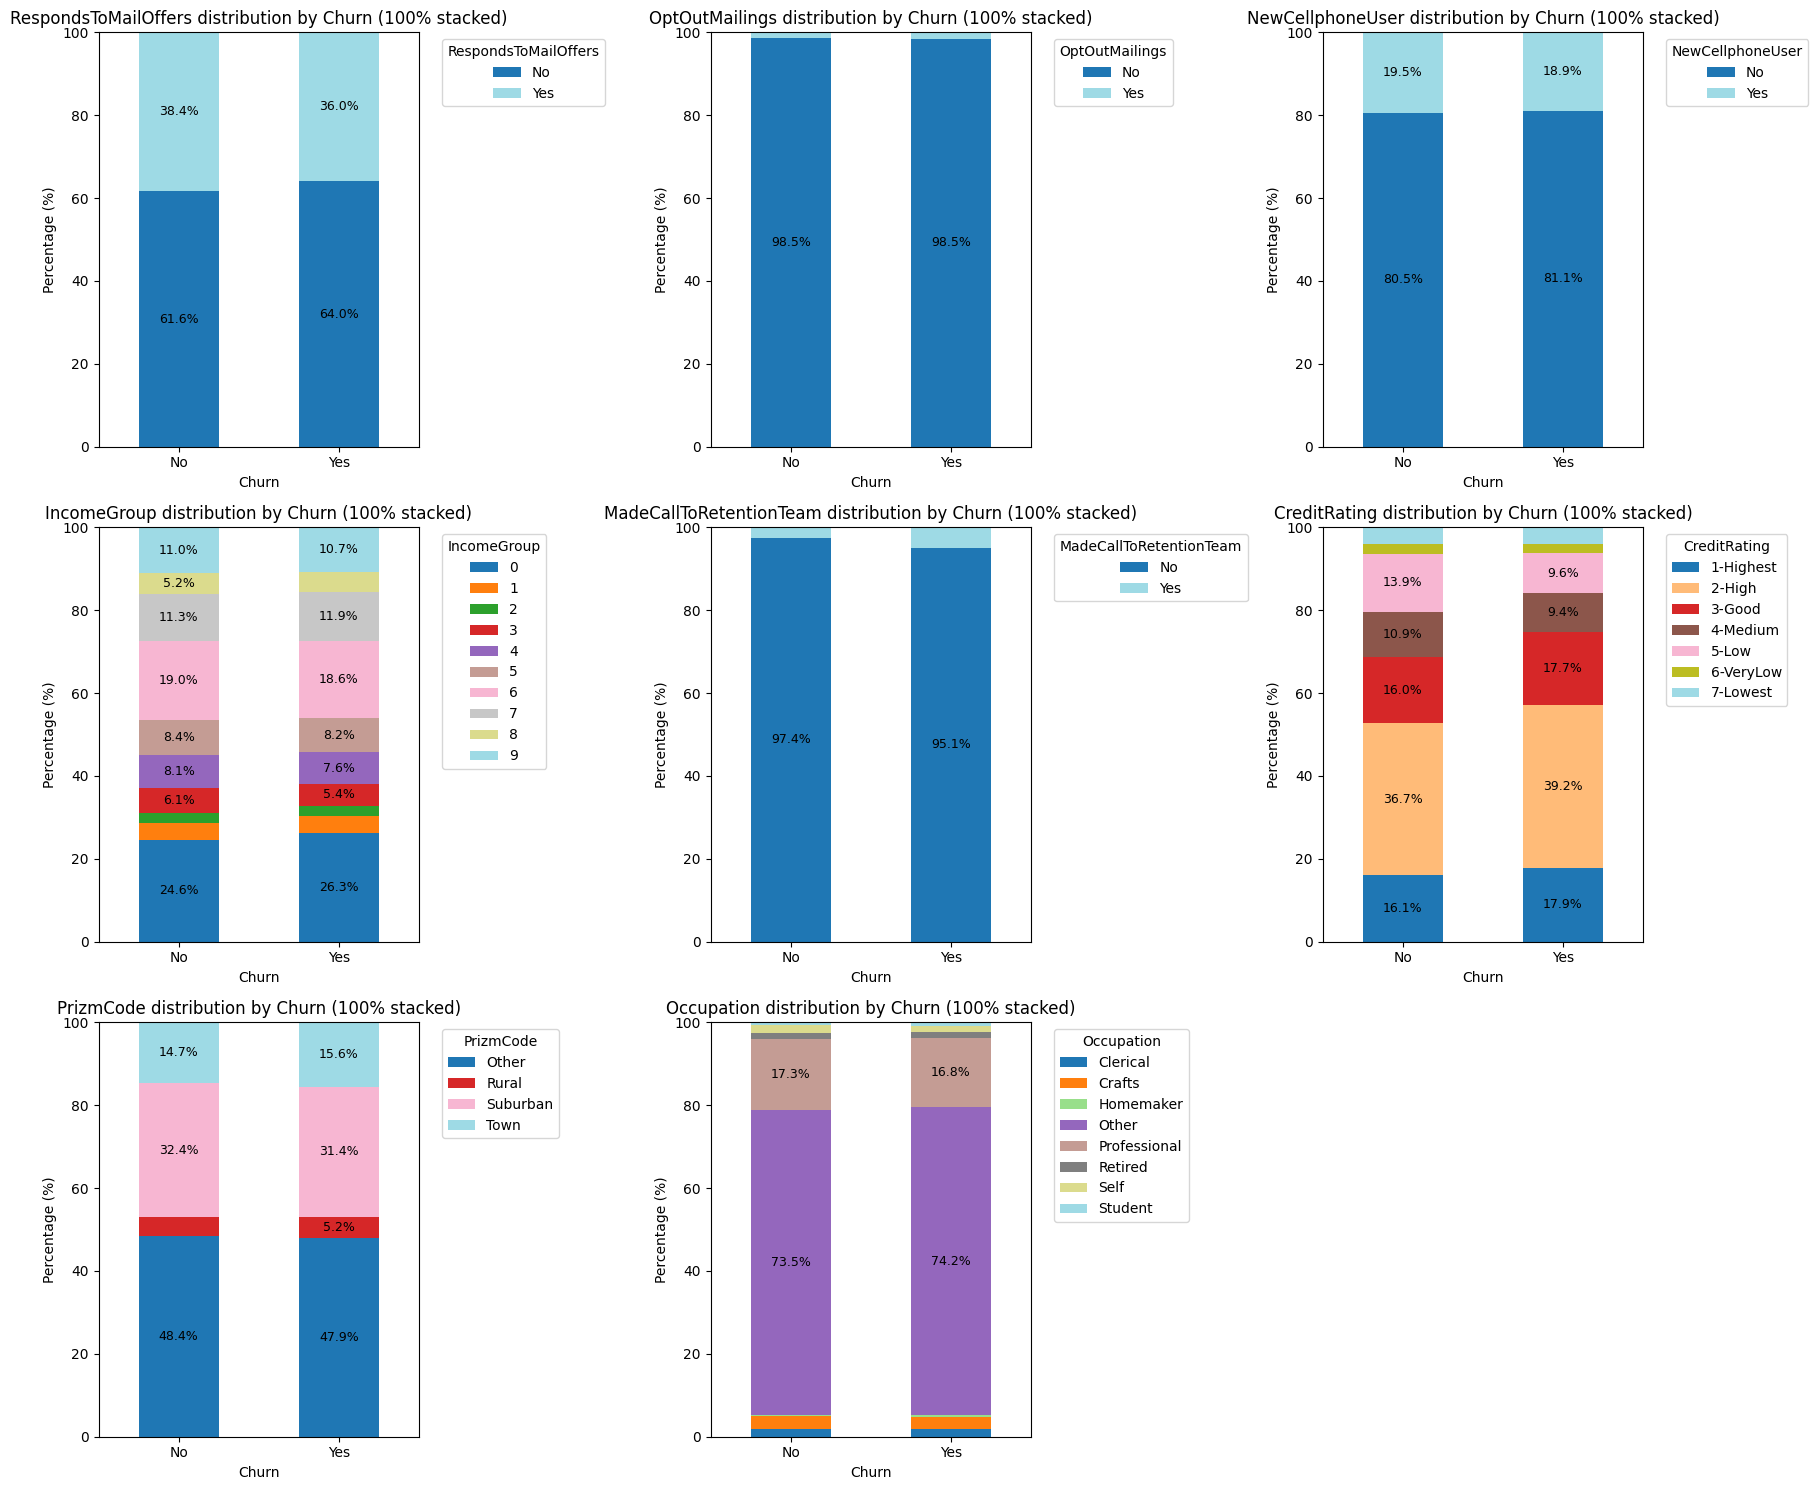

In [644]:


def plot_stacked_percentage_bars_by_churn(df, categorical_cols, churn_col='Churn', cols_per_row=3):
    total_vars = len(categorical_cols)
    rows = (total_vars + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        # Create cross-tab with normalized values per churn (row-wise)
        ct = pd.crosstab(df[churn_col], df[col], normalize='index') * 100
        
        # Plot stacked bar chart
        ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='tab20')

        axes[i].set_title(f'{col} distribution by {churn_col} (100% stacked)')
        axes[i].set_ylabel('Percentage (%)')
        axes[i].set_xlabel(churn_col)
        axes[i].set_ylim(0, 100)

        # Add percentage labels on each segment
        for container in axes[i].containers:
            # Iterate over bars inside container
            for rect in container:
                height = rect.get_height()
                if height > 5:  # Only label segments >5%
                    x = rect.get_x() + rect.get_width() / 2
                    y = rect.get_y() + height / 2
                    axes[i].text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

        axes[i].legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')

        # Rotate x labels if crowded
        axes[i].tick_params(axis='x', rotation=0)

    # Hide unused subplots
    for k in range(i + 1, len(axes)):
        axes[k].set_visible(False)

    plt.tight_layout()
    plt.show()

# Usage:
categorical_vars = [
    'RespondsToMailOffers', 'OptOutMailings', 'NewCellphoneUser',
    'IncomeGroup', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation'
]

# Call function with your DataFrame and categorical columns list:
plot_stacked_percentage_bars_by_churn(df8_dropped, categorical_vars)


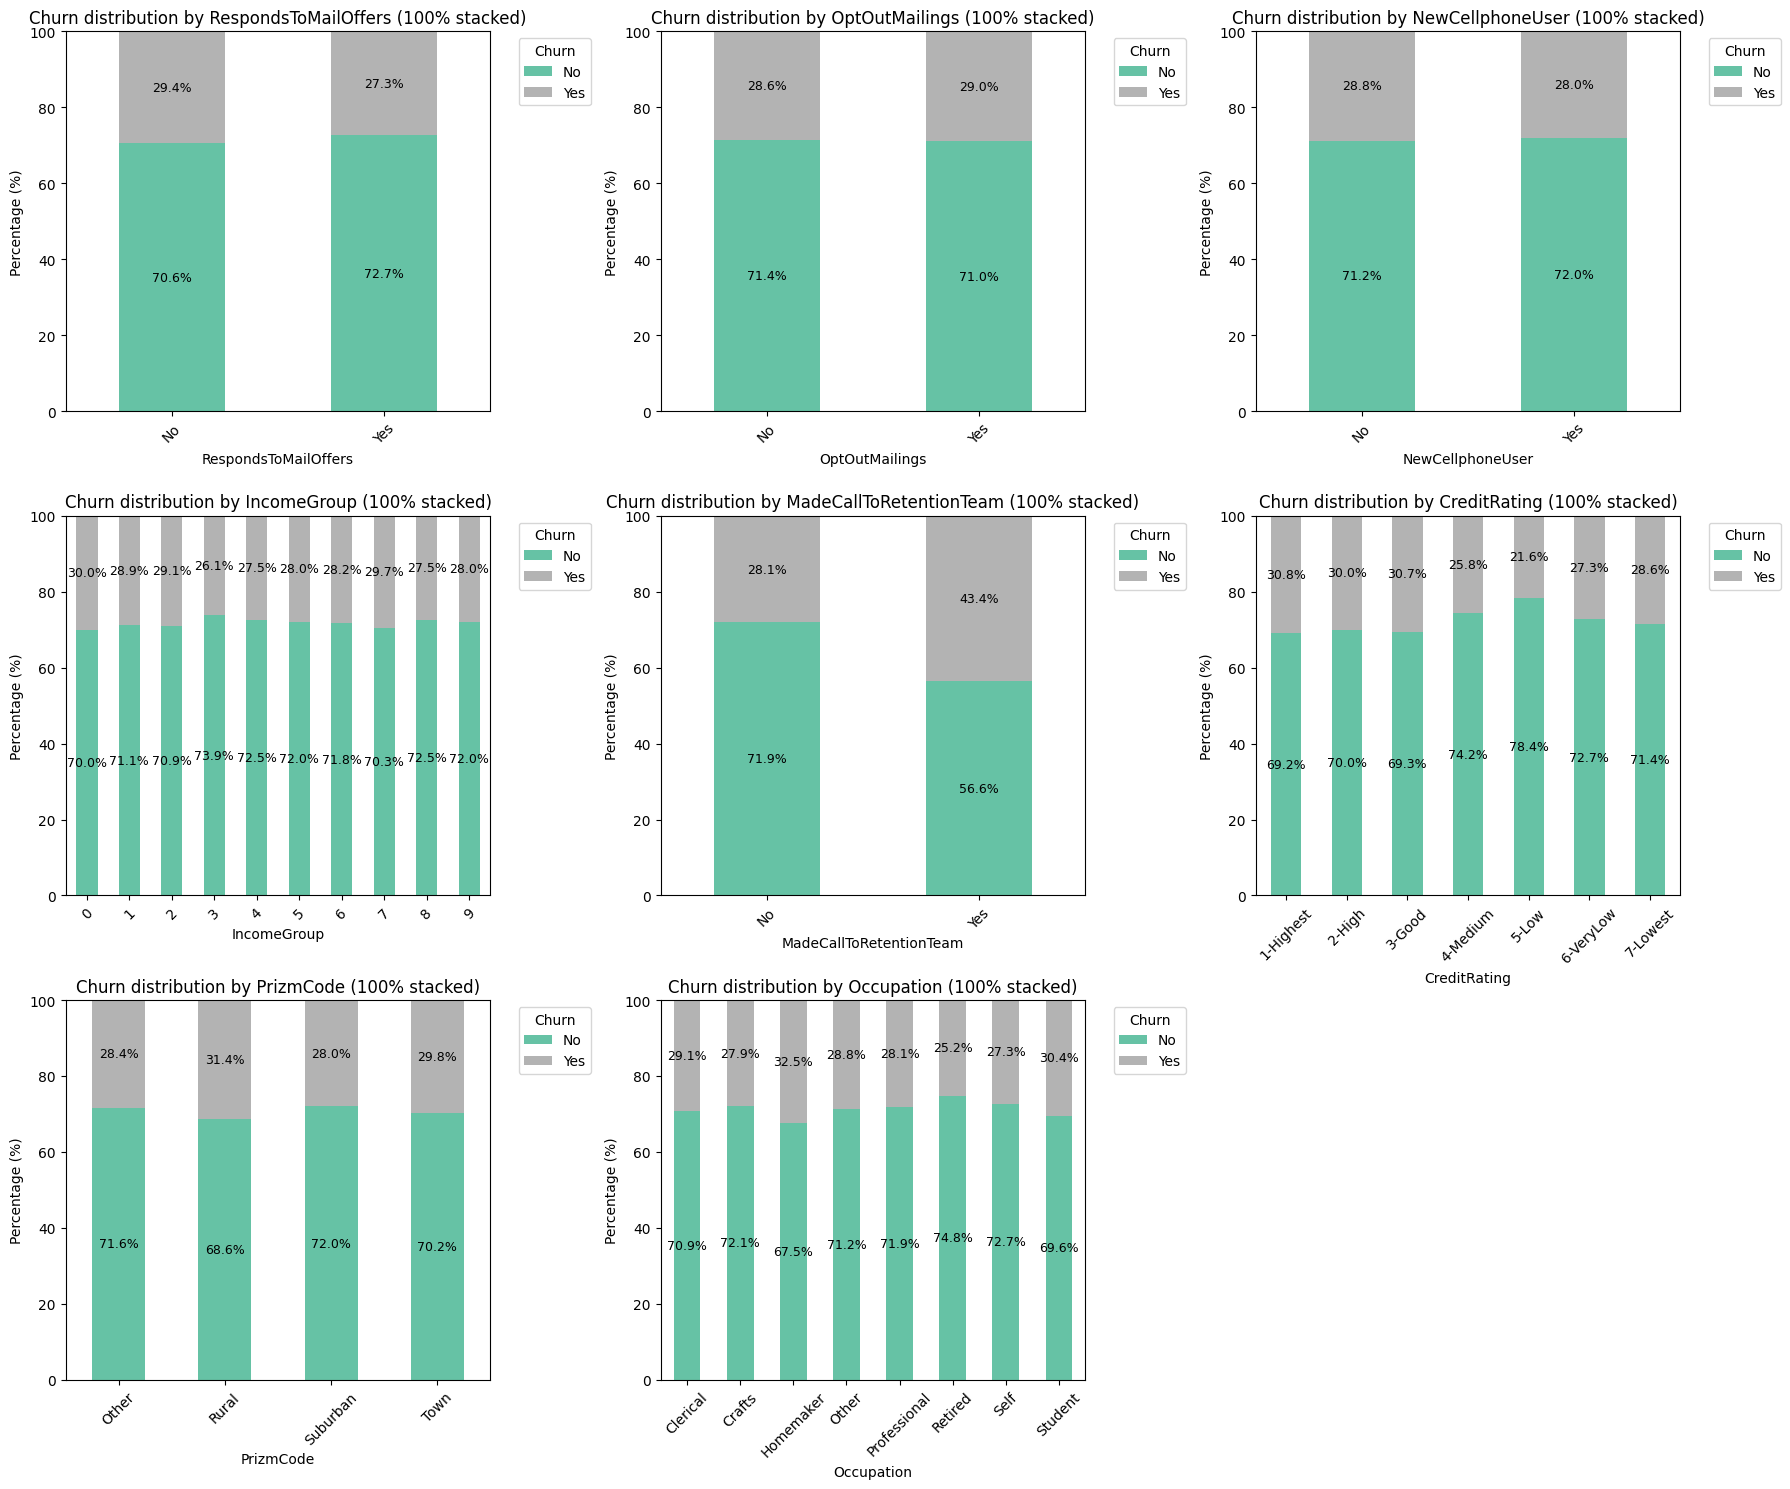

In [645]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_stacked_percentage_bars_reverse(df, categorical_cols, churn_col='Churn', cols_per_row=3):
    total_vars = len(categorical_cols)
    rows = (total_vars + cols_per_row - 1) // cols_per_row

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row*6, rows*5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        # Crosstab normalized over the categorical variable (column-wise normalization)
        ct = pd.crosstab(df[col], df[churn_col], normalize='index') * 100

        # Plot stacked bar chart
        ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')

        axes[i].set_title(f'{churn_col} distribution by {col} (100% stacked)')
        axes[i].set_ylabel('Percentage (%)')
        axes[i].set_xlabel(col)
        axes[i].set_ylim(0, 100)

        # Add percentage labels on each bar segment
        for container in axes[i].containers:
            for rect in container:
                height = rect.get_height()
                if height > 5:  # Label segments larger than 5%
                    x = rect.get_x() + rect.get_width() / 2
                    y = rect.get_y() + height / 2
                    axes[i].text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

        axes[i].legend(title=churn_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].tick_params(axis='x', rotation=45)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Usage example:
categorical_vars = [
    'RespondsToMailOffers', 'OptOutMailings', 'NewCellphoneUser',
    'IncomeGroup', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation'
]

plot_stacked_percentage_bars_reverse(df8_dropped, categorical_vars)


### Chi-Square Test

In [647]:
from scipy.stats import chi2_contingency


In [648]:
contingency_table_MailOffers = pd.crosstab(df8_dropped['RespondsToMailOffers'], df8_dropped['Churn'])
print(contingency_table_MailOffers)


Churn                    No   Yes
RespondsToMailOffers             
No                    22296  9286
Yes                   13880  5217


In [649]:
chi1, p1, dof1, expected1 = chi2_contingency(contingency_table_MailOffers) #chi2 : test value, p:p value, dof: degrees of freedom, expected : expected table once not correlated

In [650]:
alpha = 0.05  # مستوى الدلالة 5%
print(f"Chi-square Statistic: {chi1}")
print(f"P-value: {p1}")
#H0: there is no association between the two variables. H1:there is an association of any kind

if p1 < alpha:
    print("reject Ho, there's a relationship")
else:
    print("dont reject H0, No relationship")


Chi-square Statistic: 25.209425324515376
P-value: 5.143023723364291e-07
reject Ho, there's a relationship


In [651]:
Contingency_table_Retention = pd.crosstab(df8_dropped['MadeCallToRetentionTeam'], df8_dropped['Churn'])
print(Contingency_table_Retention)
chi2, p2, dof2, expected2 = chi2_contingency(Contingency_table_Retention) #chi2 : test value, p:p value, dof: degrees of freedom, expected : expected table once not correlated

Churn                       No    Yes
MadeCallToRetentionTeam              
No                       35243  13787
Yes                        933    716


In [652]:
alpha = 0.05  # مستوى الدلالة 5%
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p2}")
#H0: there is no association between the two variables. H1:there is an association of any kind

if p2 < alpha:
    print("reject Ho, there's a relationship")
else:
    print("dont reject H0, No relationship")


Chi-square Statistic: 182.08570198301237
P-value: 1.6984044517190935e-41
reject Ho, there's a relationship


In [653]:
Contingency_table_opt = pd.crosstab(df8_dropped['OptOutMailings'], df8_dropped['Churn'])
print(Contingency_table_opt)
chi3, p3, dof3, expected3 = chi2_contingency(Contingency_table_opt) #chi2 : test value, p:p value, dof: degrees of freedom, expected : expected table once not correlated

alpha = 0.05  # مستوى الدلالة 5%
print(f"Chi-square Statistic: {chi3}")
print(f"P-value: {p3}")
#H0: there is no association between the two variables. H1:there is an association of any kind

if p3 < alpha:
    print("reject Ho, there's a relationship")
else:
    print("dont reject H0, No relationship")


Churn              No    Yes
OptOutMailings              
No              35646  14287
Yes               530    216
Chi-square Statistic: 0.02702463187224171
P-value: 0.8694227951091109
dont reject H0, No relationship


In [654]:
Contingency_table_opt = pd.crosstab(df8_dropped['OptOutMailings'], df8_dropped['Churn'])
print(Contingency_table_opt)
chi3, p3, dof3, expected3 = chi2_contingency(Contingency_table_opt) #chi2 : test value, p:p value, dof: degrees of freedom, expected : expected table once not correlated

alpha = 0.05  # مستوى الدلالة 5%
print(f"Chi-square Statistic: {chi3}")
print(f"P-value: {p3}")
#H0: there is no association between the two variables. H1:there is an association of any kind

if p3 < alpha:
    print("reject Ho, there's a relationship")
else:
    print("dont reject H0, No relationship")


Churn              No    Yes
OptOutMailings              
No              35646  14287
Yes               530    216
Chi-square Statistic: 0.02702463187224171
P-value: 0.8694227951091109
dont reject H0, No relationship


### Recategorize

In [656]:
def categorize_income (income):
    if income == 0 :
        return 'UnKnown'
    elif income >= 1 and income <=3 :
        return 'Low'
    elif income >=4 and income<= 6:
        return 'Medium'
    elif income >= 7 and income <= 9: 
        return 'High'

df8_dropped['IncomeCat'] = df8_dropped['IncomeGroup'].apply(categorize_income)
df8_dropped

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  NewCellphoneUser  ReferralsMadeBySubscriber  \
0                   -19.0  ...                No                          0   
1                     0.0  ...               Yes                          0   
2                     0.0  ...               Yes                          0   
3                     8.1  ...               Yes                          0   
4                    -0.2  ...                No                          0   
...                   ...  ...               ...                        ...   
51037               -13.2  ...                No                          0   
51039                 0.0  ...                No                          0   
51040                -2.0  ...                No                          0   
51041                 0.0  ...                No                          0   
51043                15.9  ...                No                          0   

       IncomeGroup  OwnsMotorcycle  MadeCallToRetentionTeam  CreditRating  \
0                4              No                      Yes     1-Highest   
1                5              No                       No      4-Medium   
2                6              No                       No        3-Good   
3                6              No                       No      4-Medium   
4                9              No                       No     1-Highest   
...            ...             ...                      ...           ...   
51037            3              No                       No        3-Good   
51039            0              No                       No     6-VeryLow   
51040            7              No                       No     1-Highest   
51041            2              No                       No         5-Low   
51043            9              No                       No        3-Good   

       PrizmCode    Occupation  MaritalStatusmissing  IncomeCat  
0       Suburban  Professional                     0     Medium  
1       Suburban  Professional                     0   

In [657]:
def categorize_prizm (prizm):
    if prizm in ['Suburban', 'Town'] :
        return 'Urban'
    elif prizm == 'Rural' :
        return 'Rural'
    elif prizm == 'Other':
        return 'Other'
         

df8_dropped['PrizmCat'] = df8_dropped['PrizmCode'].apply(categorize_prizm)
df8_dropped

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0                   -19.0  ...                          0            4   
1                     0.0  ...                          0            5   
2                     0.0  ...                          0            6   
3                     8.1  ...                          0            6   
4                    -0.2  ...                          0            9   
...                   ...  ...                        ...          ...   
51037               -13.2  ...                          0            3   
51039                 0.0  ...                          0            0   
51040                -2.0  ...                          0            7   
51041                 0.0  ...                          0            2   
51043                15.9  ...                          0            9   

       OwnsMotorcycle  MadeCallToRetentionTeam  CreditRating  PrizmCode  \
0                  No                      Yes     1-Highest   Suburban   
1                  No                       No      4-Medium   Suburban   
2                  No                       No        3-Good       Town   
3                  No                       No      4-Medium      Other   
4                  No                       No     1-Highest      Other   
...               ...                      ...           ...        ...   
51037              No                       No        3-Good      Other   
51039              No                       No     6-VeryLow   Suburban   
51040              No                       No     1-Highest      Other   
51041              No                       No         5-Low      Other   
51043              No                       No        3-Good      Other   

         Occupation  MaritalStatusmissing  IncomeCat  PrizmCat  
0      Professional                     0     Medium     Urban  
1      Professional                     0     Medium     Urban  
2            Crafts                     0     Medium     Urban  
3          

In [658]:
def categorize_occupation(occ):
    if occ in ['Professional', 'Clerical', 'Crafts', 'Self']:
        return 'Working'
    elif occ in ['Homemaker', 'Retired']:
        return 'Not Working'
    elif occ == 'Student':
        return 'Student'
    else:
        return 'UnKnown'

df8_dropped['OccupationCat'] = df8_dropped['Occupation'].apply(categorize_occupation)


In [659]:
def categorize_credit(CC):
    if CC in ['1-Highest', '2-High','3-Good']:
        return 'High'
    elif CC in ['5-Low', '6-VeryLow', '7-Lowest']:
        return 'Low'
    elif CC == '4-Medium':
        return 'Medium'
    
df8_dropped['CreditCat'] = df8_dropped['CreditRating'].apply(categorize_credit)
df8_dropped


CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  OwnsMotorcycle  MadeCallToRetentionTeam  \
0                   -19.0  ...              No                      Yes   
1                     0.0  ...              No                       No   
2                     0.0  ...              No                       No   
3                     8.1  ...              No                       No   
4                    -0.2  ...              No                       No   
...                   ...  ...             ...                      ...   
51037               -13.2  ...              No                       No   
51039                 0.0  ...              No                       No   
51040                -2.0  ...              No                       No   
51041                 0.0  ...              No                       No   
51043                15.9  ...              No                       No   

       CreditRating  PrizmCode    Occupation  MaritalStatusmissing  IncomeCat  \
0         1-Highest   Suburban  Professional                     0     Medium   
1          4-Medium   Suburban  Professional                     0     Medium   
2            3-Good       Town        Crafts                     0     Medium   
3          4-Medium      Other         Other                     0     Medium   
4         1-Highest      Other  Professional                     0       High   
...             ...        ...           ...                   ...        ...   
51037        3-Good      Other         Other                     0        Low   
51039     6-VeryLow   Suburban         Other                     1    UnKnown   
51040     1-Highest      Other  Professional                     1       High   
51041         5-Low      Other  Professional                     0        Low   
51043        3-Good      Other         Other                     0       High   

       PrizmCat  OccupationCat  CreditCat  
0         Urban        Working       High  
1         Urban        Working     Medium  
2         Urban        Working       High  
3         O

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\252210583.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='pastel')
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\252210583.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], palette='pastel')
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\252210583.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_c

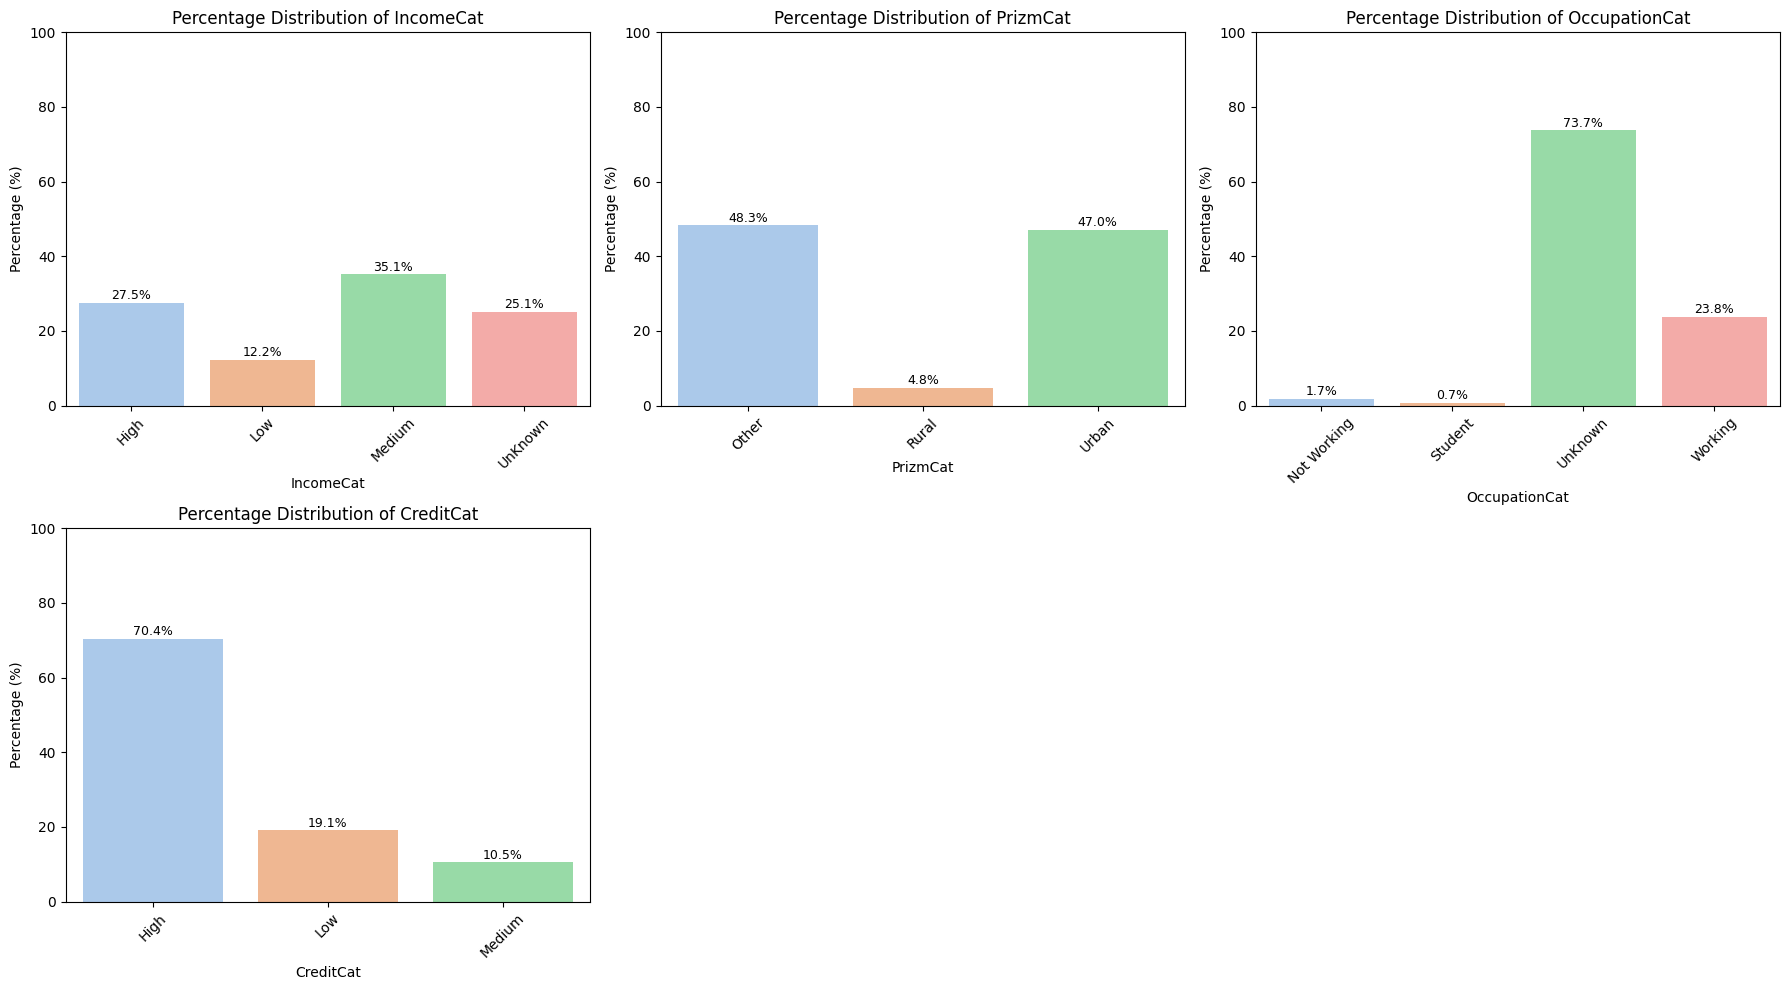

In [660]:
Cs = ['IncomeCat','PrizmCat','OccupationCat','CreditCat']

plot_categorical_percentage_bars(df8_dropped, Cs)


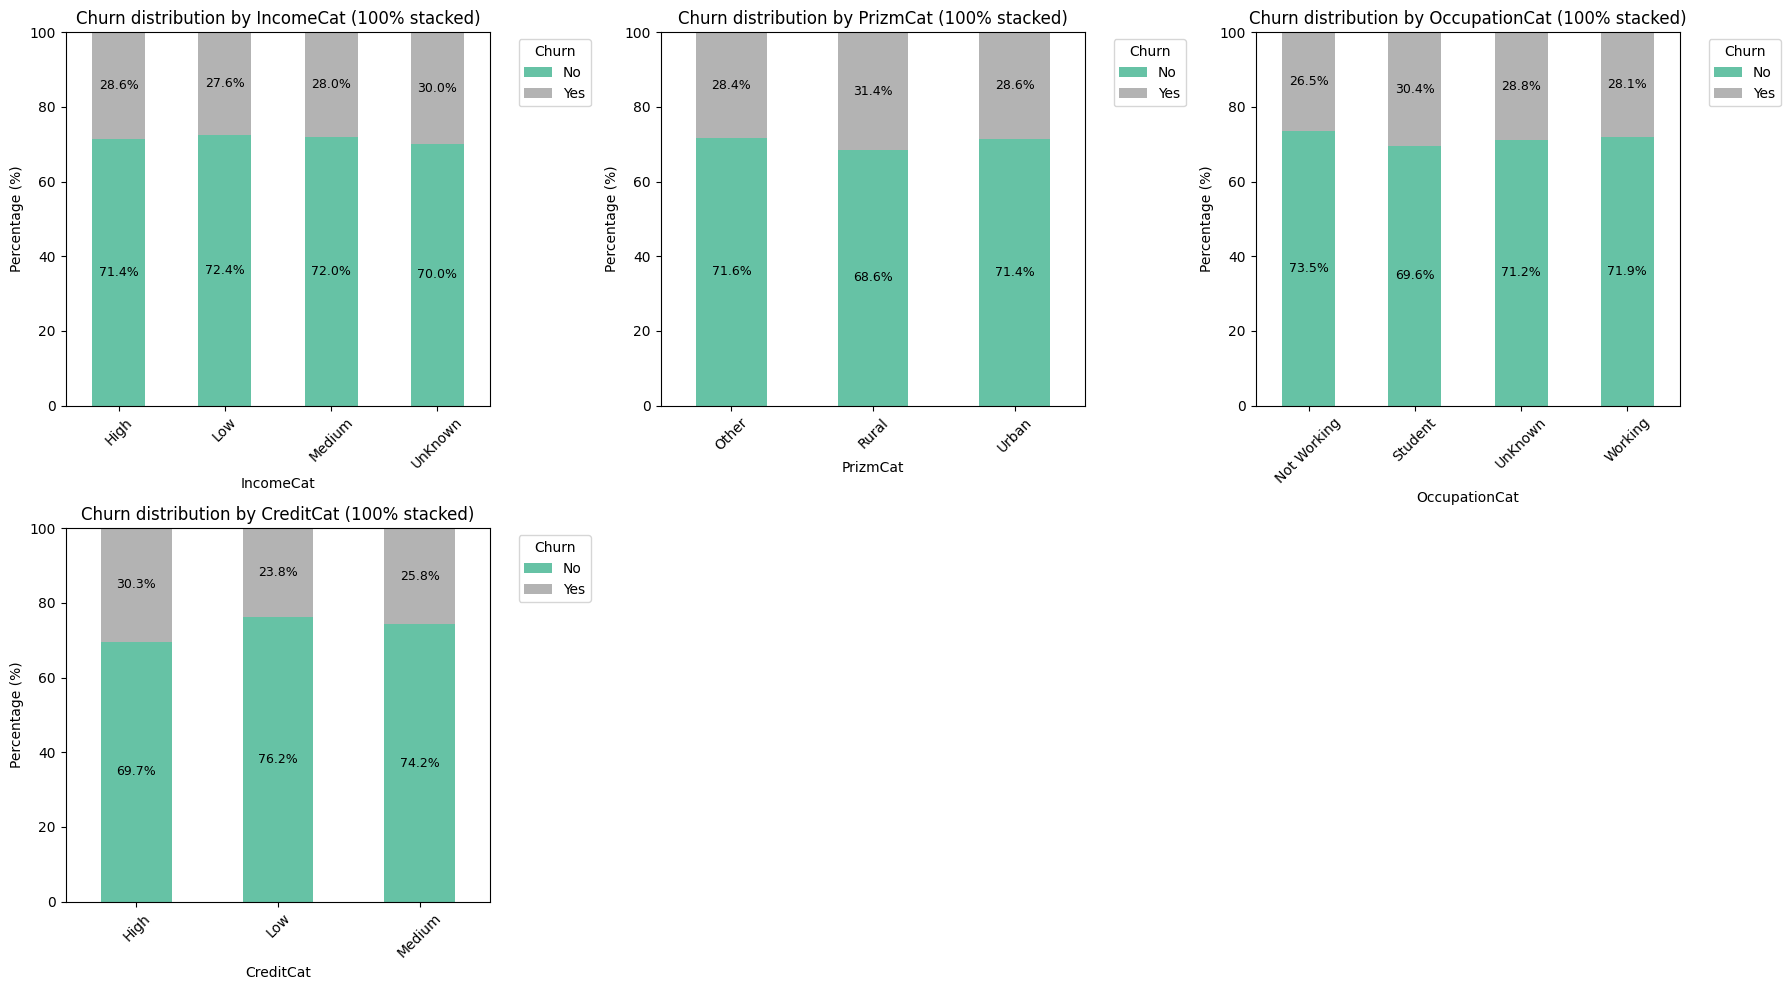

In [661]:
plot_stacked_percentage_bars_reverse(df8_dropped, Cs)


### Numeric Variables

In [663]:
df8_dropped.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'HandsetRefurbished', 'TruckOwner',
       'RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'Cre

##### MonthlyRevenue - PercChangeMinutes- PercChangeRevenues- MonthlyMinutes -TotalRecurringCharge-DirectorAssistedCalls-OverageMinutes-RoamingCalls-DroppedCalls-BlockedCalls-UnansweredCalls-CustomerCareCalls-ThreewayCalls-ReceivedCalls-OutboundCalls-InboundCalls-PeakCallsInOut-OffPeakCallsInOut-MonthsInService-UniqueSubs-ActiveSubs-Handsets-CurrentEquipmentDays-HandsetRefurbished-RetentionCalls-ReferralsMadeBySubscriber

In [665]:
import pandas as pd

# Assuming df is your DataFrame
# List of numeric columns to calculate the mean for
numeric_columns = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
    'OverageMinutes', 'RoamingCalls', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
    'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
    'PeakCallsInOut', 'OffPeakCallsInOut', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
    'Handsets', 'CurrentEquipmentDays', 'HandsetRefurbished', 'RetentionCalls', 'ReferralsMadeBySubscriber'
]

# Convert columns to numeric, coercing errors to NaN
for col in numeric_columns:
    df8_dropped[col] = pd.to_numeric(df8_dropped[col], errors='coerce')

mean_by_churn = df8_dropped.groupby('Churn')[numeric_columns].mean()

# Display the result
print(mean_by_churn)


       MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
Churn                                                         
No          59.216853      543.279799             47.799425   
Yes         58.072257      484.477074             44.700269   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  DroppedCalls  \
Churn                                                                      
No                  0.923763       39.054760      1.170091      6.110839   
Yes                 0.830061       42.519065      1.397290      5.811798   

       BlockedCalls  UnansweredCalls  CustomerCareCalls  ...  PeakCallsInOut  \
Churn                                                    ...                   
No         4.136884        29.068399           1.989645  ...       93.399005   
Yes        4.014776        26.637351           1.590154  ...       84.344225   

       OffPeakCallsInOut  MonthsInService  UniqueSubs  ActiveSubs  Handsets  \
Churn                                     

In [1032]:


def plot_numeric_means_by_churn(df, numeric_vars, churn_col='Churn', save_dir='charts'):
    os.makedirs(save_dir, exist_ok=True)  # Create directory if not exists

    for col in numeric_vars:
        means = df.groupby(churn_col)[col].mean()
        
        plt.figure(figsize=(2, 2))
        bars = plt.bar(means.index.astype(str), means.values, color=['#1f77b4', '#ff7f0e'])
        plt.title(f'Mean of {col} by {churn_col}', fontsize =9)
        plt.xlabel(churn_col, fontsize=7)
        plt.ylabel(f'Mean {col}', fontsize =7)
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)

        # Annotate bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height* 0.9,
                     f'{height:.2f}', ha='center', va='bottom', fontsize=6)

        plt.tight_layout()
        save_path = os.path.join(save_dir, f'{col}_mean_distribution.png')
        plt.savefig(save_path, bbox_inches='tight', transparent=True)
        plt.close()




In [1033]:
numeric_vars = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
    'OverageMinutes', 'RoamingCalls', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
    'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
    'PeakCallsInOut', 'OffPeakCallsInOut', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
    'Handsets', 'CurrentEquipmentDays', 'RetentionCalls', 'ReferralsMadeBySubscriber'
]

plot_numeric_means_by_churn(df8_dropped, numeric_vars, save_dir=r"D:\Master Data Science\Graduation Project\EDA\mean_charts3")


# Feature Engineering

#### 1- Average Calls per month 

In [669]:
df8_dropped['AverageCallsPerMonth'] = (df8_dropped['PeakCallsInOut'] + df8_dropped['OffPeakCallsInOut']) / df8_dropped['MonthsInService']

In [670]:
df8_dropped

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  MadeCallToRetentionTeam  CreditRating  \
0                   -19.0  ...                      Yes     1-Highest   
1                     0.0  ...                       No      4-Medium   
2                     0.0  ...                       No        3-Good   
3                     8.1  ...                       No      4-Medium   
4                    -0.2  ...                       No     1-Highest   
...                   ...  ...                      ...           ...   
51037               -13.2  ...                       No        3-Good   
51039                 0.0  ...                       No     6-VeryLow   
51040                -2.0  ...                       No     1-Highest   
51041                 0.0  ...                       No         5-Low   
51043                15.9  ...                       No        3-Good   

       PrizmCode    Occupation  MaritalStatusmissing  IncomeCat  PrizmCat  \
0       Suburban  Professional                     0     Medium     Urban   
1       Suburban  Professional                     0     Medium     Urban   
2           Town        Crafts                     0     Medium     Urban   
3          Other         Other                     0     Medium     Other   
4          Other  Professional                     0       High     Other   
...          ...           ...                   ...        ...       ...   
51037      Other         Other                     0        Low     Other   
51039   Suburban         Other                     1    UnKnown     Urban   
51040      Other  Professional                     1       High     Other   
51041      Other  Professional                     0        Low     Other   
51043      Other         Other                     0       High     Other   

       OccupationCat  CreditCat  AverageCallsPerMonth  
0            Working       High              1.344262  
1            Working     Medium              0.103448  
2            Working       High              0.083333  
3            UnKnown     Medium    

#### 2-Average number of customer service calls per month per customer.

In [672]:
df8_dropped['CustomerCareCallsPerMonth'] = df8_dropped['CustomerCareCalls'] / df8_dropped['MonthsInService']


#### clean two variables: MonthlyRevenue -TotalRecurringCharge

In [674]:
valid_count = df8_dropped[(df8_dropped['TotalRecurringCharge'] <= df8_dropped['MonthlyRevenue'])].shape[0]
print(f"عدد الصفوف المتوافقة مع الشرط: {valid_count}")
invalid_count = df8_dropped[(df8_dropped['TotalRecurringCharge'] > df8_dropped['MonthlyRevenue'])].shape[0]
print(f"عدد الصفوف المتوافقة مع الشرط: {invalid_count}")


عدد الصفوف المتوافقة مع الشرط: 32529
عدد الصفوف المتوافقة مع الشرط: 18150


In [675]:
df8_dropped[df8_dropped['TotalRecurringCharge'] < 0]

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
3605      3028134    No           21.94           329.0                  -2.0   
23904     3188158   Yes           94.77           908.0                  -6.0   
33352     3265738    No           -5.86             0.0                  -5.0   
35304     3281886    No            3.56           157.0                  -1.0   
48038     3378298    No           -6.17             0.0                  -6.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
3605                    0.00            44.0           6.6             -329.0   
23904                   4.95             4.0           0.0             -908.0   
33352                   0.00             0.0           0.0                0.0   
35304                   0.00             7.0           0.6             -157.0   
48038                   0.00             0.0           0.0                0.0   

       PercChangeRevenues  ...  CreditRating  PrizmCode  Occupation  \
3605                -21.9  ...     1-Highest   Suburban       Other   
23904               -89.8  ...         5-Low   Suburban       Other   
33352                 5.9  ...        3-Good   Suburban       Other   
35304                -3.6  ...      4-Medium       Town       Other   
48038                 6.2  ...      7-Lowest   Suburban       Other   

       MaritalStatusmissing  IncomeCat  PrizmCat  OccupationCat  CreditCat  \
3605                      0       High     Urban        UnKnown       High   
23904                     1    UnKnown     Urban        UnKnown        Low   
33352                     0     Medium     Urban        UnKnown       High   
35304                     1        Low     Urban        UnKnown     Medium   
48038                     0     Medium     Urban        UnKnown        Low   

       AverageCallsPerMonth  CustomerCareCallsPerMonth  
3605               0.342424                   0.021212  
23904              7.668750                   0.187500  
33352              0.000000                   0.000000  
35304              4.283333                   0.891667  
48038              0.000000                   0.000000  

[5 rows x 52 columns]

In [676]:
df9 = df8_dropped[df8_dropped['TotalRecurringCharge'] >= 0].copy()
print("No of rows after cleaning:", len(df9))


No of rows after cleaning: 50674


In [677]:
 df9['TotalRecurringCharge'].min()

0.0

In [678]:
df9[df9['MonthlyRevenue']<0].count()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
CurrentEquipmentDays         0
HandsetRefurbished           0
TruckOwner                   0
RVOwner                      0
Homeownership                0
RespondsToMailOffers         0
OptOutMa

In [679]:
df9[df9['MonthlyRevenue']<0].count()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
CurrentEquipmentDays         0
HandsetRefurbished           0
TruckOwner                   0
RVOwner                      0
Homeownership                0
RespondsToMailOffers         0
OptOutMa

In [680]:
df9[df9['MonthlyRevenue']<0].count()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
CurrentEquipmentDays         0
HandsetRefurbished           0
TruckOwner                   0
RVOwner                      0
Homeownership                0
RespondsToMailOffers         0
OptOutMa

In [681]:
df10= df9.copy()
df10['MonthlyRevenue'].min()

0.0

In [682]:
df10

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  CreditRating  PrizmCode    Occupation  \
0                   -19.0  ...     1-Highest   Suburban  Professional   
1                     0.0  ...      4-Medium   Suburban  Professional   
2                     0.0  ...        3-Good       Town        Crafts   
3                     8.1  ...      4-Medium      Other         Other   
4                    -0.2  ...     1-Highest      Other  Professional   
...                   ...  ...           ...        ...           ...   
51037               -13.2  ...        3-Good      Other         Other   
51039                 0.0  ...     6-VeryLow   Suburban         Other   
51040                -2.0  ...     1-Highest      Other  Professional   
51041                 0.0  ...         5-Low      Other  Professional   
51043                15.9  ...        3-Good      Other         Other   

       MaritalStatusmissing  IncomeCat  PrizmCat  OccupationCat  CreditCat  \
0                         0     Medium     Urban        Working       High   
1                         0     Medium     Urban        Working     Medium   
2                         0     Medium     Urban        Working       High   
3                         0     Medium     Other        UnKnown     Medium   
4                         0       High     Other        Working       High   
...                     ...        ...       ...            ...        ...   
51037                     0        Low     Other        UnKnown       High   
51039                     1    UnKnown     Urban        UnKnown        Low   
51040                     1       High     Other        Working       High   
51041                     0        Low     Other        Working        Low   
51043                     0       High     Other        UnKnown       High   

       AverageCallsPerMonth  CustomerCareCallsPerMonth  
0                  1.344262                   0.000000  
1                  0.103448                   0.000000  
2                  0.083333                   0.000000  
3                 1

In [683]:
count = df10[(df10['TotalRecurringCharge'] == 0) & (df10['MonthlyMinutes'] > 0)].shape[0]

print(count)


95


In [684]:
count = df10[(df10['TotalRecurringCharge'] == 0) & (df10['MonthlyMinutes'] > 0) & (df10['OverageMinutes'] > 0)].shape[0]
print(count)

87


In [685]:
df_subset = df10[(df10['TotalRecurringCharge'] == 0) & (df10['MonthlyMinutes'] > 0) & (df10['OverageMinutes'] > 0)]
df_subset['diff'] = np.abs(df_subset['MonthlyMinutes'] - df_subset['OverageMinutes'])
close_minutes = df_subset[df_subset['diff'] <= 5]

print(f"Number of rowaa which its difference close to only 5 mins: {close_minutes.shape[0]}")

Number of rowaa which its difference close to only 5 mins: 36


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\3333148704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['diff'] = np.abs(df_subset['MonthlyMinutes'] - df_subset['OverageMinutes'])


In [686]:
import numpy as np

df10['MinutesDiff'] = np.abs(df10['MonthlyMinutes'] - df10['OverageMinutes'])

condition_drop = (
    (df10['TotalRecurringCharge'] == 0) &
    (df10['MonthlyMinutes'] > 0) &
    (
        (df10['OverageMinutes'] == 0) |
        ((df10['OverageMinutes'] > 0) & (df10['MinutesDiff'] > 5))
    )
)

num_rows_to_drop = df10[condition_drop].shape[0]
print(f"Number of rows doesn't satisfy conditions: {num_rows_to_drop}")

#df.drop(columns=['MinutesDiff'], inplace=True)


Number of rows doesn't satisfy conditions: 59


In [687]:
count =df10[(df10['TotalRecurringCharge'] == 0) & (df10['MonthlyMinutes'] > 0) & (df10['OverageMinutes'] == 0)].shape[0]
print(count) 


8


In [688]:
df_filtered = df10[condition_drop]
print(df_filtered['MonthlyRevenue'].describe())


count     59.000000
mean      18.951017
std       17.885069
min        0.000000
25%        8.415000
50%       14.440000
75%       25.570000
max      117.920000
Name: MonthlyRevenue, dtype: float64


In [689]:
df11 =df10[~condition_drop].copy()
df11

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  PrizmCode    Occupation  MaritalStatusmissing  \
0                   -19.0  ...   Suburban  Professional                     0   
1                     0.0  ...   Suburban  Professional                     0   
2                     0.0  ...       Town        Crafts                     0   
3                     8.1  ...      Other         Other                     0   
4                    -0.2  ...      Other  Professional                     0   
...                   ...  ...        ...           ...                   ...   
51037               -13.2  ...      Other         Other                     0   
51039                 0.0  ...   Suburban         Other                     1   
51040                -2.0  ...      Other  Professional                     1   
51041                 0.0  ...      Other  Professional                     0   
51043                15.9  ...      Other         Other                     0   

       IncomeCat  PrizmCat  OccupationCat  CreditCat  AverageCallsPerMonth  \
0         Medium     Urban        Working       High              1.344262   
1         Medium     Urban        Working     Medium              0.103448   
2         Medium     Urban        Working       High              0.083333   
3         Medium     Other        UnKnown     Medium             14.566102   
4           High     Other        Working       High              0.000000   
...          ...       ...            ...        ...                   ...   
51037        Low     Other        UnKnown       High              1.023333   
51039    UnKnown     Urban        UnKnown        Low              2.253333   
51040       High     Other        Working       High              9.156667   
51041        Low     Other        Working        Low              5.120000   
51043       High     Other        UnKnown       High             19.551724   

       CustomerCareCallsPerMonth  MinutesDiff  
0                       0.000000        219.0  
1                       0.000000         10.0  
2      

In [690]:
df10

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  PrizmCode    Occupation  MaritalStatusmissing  \
0                   -19.0  ...   Suburban  Professional                     0   
1                     0.0  ...   Suburban  Professional                     0   
2                     0.0  ...       Town        Crafts                     0   
3                     8.1  ...      Other         Other                     0   
4                    -0.2  ...      Other  Professional                     0   
...                   ...  ...        ...           ...                   ...   
51037               -13.2  ...      Other         Other                     0   
51039                 0.0  ...   Suburban         Other                     1   
51040                -2.0  ...      Other  Professional                     1   
51041                 0.0  ...      Other  Professional                     0   
51043                15.9  ...      Other         Other                     0   

       IncomeCat  PrizmCat  OccupationCat  CreditCat  AverageCallsPerMonth  \
0         Medium     Urban        Working       High              1.344262   
1         Medium     Urban        Working     Medium              0.103448   
2         Medium     Urban        Working       High              0.083333   
3         Medium     Other        UnKnown     Medium             14.566102   
4           High     Other        Working       High              0.000000   
...          ...       ...            ...        ...                   ...   
51037        Low     Other        UnKnown       High              1.023333   
51039    UnKnown     Urban        UnKnown        Low              2.253333   
51040       High     Other        Working       High              9.156667   
51041        Low     Other        Working        Low              5.120000   
51043       High     Other        UnKnown       High             19.551724   

       CustomerCareCallsPerMonth  MinutesDiff  
0                       0.000000        219.0  
1                       0.000000         10.0  
2      

##### Adjusting Total Recurring Charge with Monthly revenue

In [692]:
def adjust_revenue(row):
    if (row["MonthlyRevenue"] == 0) and (row["TotalRecurringCharge"] > 0) and (row["OverageMinutes"] == 0):
        return row["TotalRecurringCharge"]
    else:
        return row["MonthlyRevenue"]

df11["MonthlyRevenue"] = df11.apply(adjust_revenue, axis=1)
df11

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  PrizmCode    Occupation  MaritalStatusmissing  \
0                   -19.0  ...   Suburban  Professional                     0   
1                     0.0  ...   Suburban  Professional                     0   
2                     0.0  ...       Town        Crafts                     0   
3                     8.1  ...      Other         Other                     0   
4                    -0.2  ...      Other  Professional                     0   
...                   ...  ...        ...           ...                   ...   
51037               -13.2  ...      Other         Other                     0   
51039                 0.0  ...   Suburban         Other                     1   
51040                -2.0  ...      Other  Professional                     1   
51041                 0.0  ...      Other  Professional                     0   
51043                15.9  ...      Other         Other                     0   

       IncomeCat  PrizmCat  OccupationCat  CreditCat  AverageCallsPerMonth  \
0         Medium     Urban        Working       High              1.344262   
1         Medium     Urban        Working     Medium              0.103448   
2         Medium     Urban        Working       High              0.083333   
3         Medium     Other        UnKnown     Medium             14.566102   
4           High     Other        Working       High              0.000000   
...          ...       ...            ...        ...                   ...   
51037        Low     Other        UnKnown       High              1.023333   
51039    UnKnown     Urban        UnKnown        Low              2.253333   
51040       High     Other        Working       High              9.156667   
51041        Low     Other        Working        Low              5.120000   
51043       High     Other        UnKnown       High             19.551724   

       CustomerCareCallsPerMonth  MinutesDiff  
0                       0.000000        219.0  
1                       0.000000         10.0  
2      

In [693]:
df10

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  PrizmCode    Occupation  MaritalStatusmissing  \
0                   -19.0  ...   Suburban  Professional                     0   
1                     0.0  ...   Suburban  Professional                     0   
2                     0.0  ...       Town        Crafts                     0   
3                     8.1  ...      Other         Other                     0   
4                    -0.2  ...      Other  Professional                     0   
...                   ...  ...        ...           ...                   ...   
51037               -13.2  ...      Other         Other                     0   
51039                 0.0  ...   Suburban         Other                     1   
51040                -2.0  ...      Other  Professional                     1   
51041                 0.0  ...      Other  Professional                     0   
51043                15.9  ...      Other         Other                     0   

       IncomeCat  PrizmCat  OccupationCat  CreditCat  AverageCallsPerMonth  \
0         Medium     Urban        Working       High              1.344262   
1         Medium     Urban        Working     Medium              0.103448   
2         Medium     Urban        Working       High              0.083333   
3         Medium     Other        UnKnown     Medium             14.566102   
4           High     Other        Working       High              0.000000   
...          ...       ...            ...        ...                   ...   
51037        Low     Other        UnKnown       High              1.023333   
51039    UnKnown     Urban        UnKnown        Low              2.253333   
51040       High     Other        Working       High              9.156667   
51041        Low     Other        Working        Low              5.120000   
51043       High     Other        UnKnown       High             19.551724   

       CustomerCareCallsPerMonth  MinutesDiff  
0                       0.000000        219.0  
1                       0.000000         10.0  
2      

In [694]:
# Count the number of rows that meet the conditions
row_count = df11[(df11['MonthlyRevenue'] == 0) & 
                  (df11['TotalRecurringCharge'] > 0) & 
                  (df11['OverageMinutes'] > 0)].shape[0]

# Display the row count
print(row_count) # one case edited put also 30 from total recharge in monthly revenue 


0


In [695]:
df11["Rev_Rec_Diff"] = df11["MonthlyRevenue"] - df11["TotalRecurringCharge"]

In [696]:
# Calculate the mean of 'Rev_Rec_Diff' for each category of 'Churn'
mean_rev_rec_diff_by_churn = df11.groupby('Churn')['Rev_Rec_Diff'].mean()

# Display the result
print(mean_rev_rec_diff_by_churn)


Churn
No     11.409456
Yes    13.359564
Name: Rev_Rec_Diff, dtype: float64


In [697]:
from scipy.stats import ttest_ind

group_no = df11[df11["Churn"] == "No"]["Rev_Rec_Diff"]
group_yes = df11[df11["Churn"] == "Yes"]["Rev_Rec_Diff"]

t_stat, p_val = ttest_ind(group_no, group_yes, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -5.61561188284939, P-value: 1.9787150649829888e-08


In [698]:
df11 #do we need a flag to remark unusual cases in diff ?

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...    Occupation  MaritalStatusmissing  IncomeCat  \
0                   -19.0  ...  Professional                     0     Medium   
1                     0.0  ...  Professional                     0     Medium   
2                     0.0  ...        Crafts                     0     Medium   
3                     8.1  ...         Other                     0     Medium   
4                    -0.2  ...  Professional                     0       High   
...                   ...  ...           ...                   ...        ...   
51037               -13.2  ...         Other                     0        Low   
51039                 0.0  ...         Other                     1    UnKnown   
51040                -2.0  ...  Professional                     1       High   
51041                 0.0  ...  Professional                     0        Low   
51043                15.9  ...         Other                     0       High   

       PrizmCat  OccupationCat  CreditCat  AverageCallsPerMonth  \
0         Urban        Working       High              1.344262   
1         Urban        Working     Medium              0.103448   
2         Urban        Working       High              0.083333   
3         Other        UnKnown     Medium             14.566102   
4         Other        Working       High              0.000000   
...         ...            ...        ...                   ...   
51037     Other        UnKnown       High              1.023333   
51039     Urban        UnKnown        Low              2.253333   
51040     Other        Working       High              9.156667   
51041     Other        Working        Low              5.120000   
51043     Other        UnKnown       High             19.551724   

       CustomerCareCallsPerMonth  MinutesDiff  Rev_Rec_Diff  
0                       0.000000        219.0          2.00  
1                       0.000000         10.0         -0.01  
2                       0.000000          8.0          0.00  
3                       0.072881   

In [699]:
def flag_rev_rec_diff(val):
    if val < 0:
        return 'Unusual'
    elif val > 0:
        return 'Normal'
    else:
        return 'No Revenue/Charge'

df11['RevRecDiff_Flag'] = df11['Rev_Rec_Diff'].apply(flag_rev_rec_diff)


In [700]:
ct2 = pd.crosstab(df11['Churn'], df11['RevRecDiff_Flag'], normalize='index') * 100
print (ct2)


RevRecDiff_Flag  No Revenue/Charge     Normal    Unusual
Churn                                                   
No                        1.998837  60.748595  37.252568
Yes                       2.601076  65.033807  32.365117


In [701]:
denominator = df11['PeakCallsInOut'] + df11['OffPeakCallsInOut']
df11['peakCallsfromTotal'] = df11['PeakCallsInOut'] / denominator.replace(0, 1)


In [702]:
df11

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  IncomeCat  PrizmCat  OccupationCat  CreditCat  \
0                   -19.0  ...     Medium     Urban        Working       High   
1                     0.0  ...     Medium     Urban        Working     Medium   
2                     0.0  ...     Medium     Urban        Working       High   
3                     8.1  ...     Medium     Other        UnKnown     Medium   
4                    -0.2  ...       High     Other        Working       High   
...                   ...  ...        ...       ...            ...        ...   
51037               -13.2  ...        Low     Other        UnKnown       High   
51039                 0.0  ...    UnKnown     Urban        UnKnown        Low   
51040                -2.0  ...       High     Other        Working       High   
51041                 0.0  ...        Low     Other        Working        Low   
51043                15.9  ...       High     Other        UnKnown       High   

       AverageCallsPerMonth  CustomerCareCallsPerMonth  MinutesDiff  \
0                  1.344262                   0.000000        219.0   
1                  0.103448                   0.000000         10.0   
2                  0.083333                   0.000000          8.0   
3                 14.566102                   0.072881       1312.0   
4                  0.000000                   0.000000          0.0   
...                     ...                        ...          ...   
51037              1.023333                   0.000000         20.0   
51039              2.253333                   0.010000        492.0   
51040              9.156667                   0.000000        720.0   
51041              5.120000                   0.000000        134.0   
51043             19.551724                   0.000000       1700.0   

       Rev_Rec_Diff    RevRecDiff_Flag  peakCallsfromTotal  
0              2.00             Normal            0.707317  
1             -0.01            Unusual            0.833333  
2              0.00  No Revenue/Charge            0.

In [703]:
df11['Inbound vs Outbound Ratio'] = df11['InboundCalls'] / df11['OutboundCalls'].replace(0, 1)

In [704]:
denominator = (df11['PeakCallsInOut'] + df11['OffPeakCallsInOut']).replace(0, 1)
df11['CallFailureRatio'] = df11['DroppedCalls'] / denominator


In [705]:
df11['CallProblemRatio'] = (df11['DroppedCalls'] + df11['BlockedCalls']) / (df11['PeakCallsInOut'] + df11['OffPeakCallsInOut']).replace(0, 1)


In [706]:
df11

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  CreditCat  AverageCallsPerMonth  \
0                   -19.0  ...       High              1.344262   
1                     0.0  ...     Medium              0.103448   
2                     0.0  ...       High              0.083333   
3                     8.1  ...     Medium             14.566102   
4                    -0.2  ...       High              0.000000   
...                   ...  ...        ...                   ...   
51037               -13.2  ...       High              1.023333   
51039                 0.0  ...        Low              2.253333   
51040                -2.0  ...       High              9.156667   
51041                 0.0  ...        Low              5.120000   
51043                15.9  ...       High             19.551724   

       CustomerCareCallsPerMonth  MinutesDiff  Rev_Rec_Diff  \
0                       0.000000        219.0          2.00   
1                       0.000000         10.0         -0.01   
2                       0.000000          8.0          0.00   
3                       0.072881       1312.0          7.28   
4                       0.000000          0.0          0.14   
...                          ...          ...           ...   
51037                   0.000000         20.0         14.92   
51039                   0.010000        492.0          0.00   
51040                   0.000000        720.0          1.99   
51041                   0.000000        134.0         87.49   
51043                   0.000000       1700.0         10.17   

         RevRecDiff_Flag  peakCallsfromTotal  Inbound vs Outbound Ratio  \
0                 Normal            0.707317                   0.000000   
1                Unusual            0.833333                   0.000000   
2      No Revenue/Charge            0.260000                   0.000000   
3                 Normal            0.646614                   0.396975   
4                 Normal            0.000000                   0.000000   
...                  ...                 ...     

# EDA after Feature Engineering 

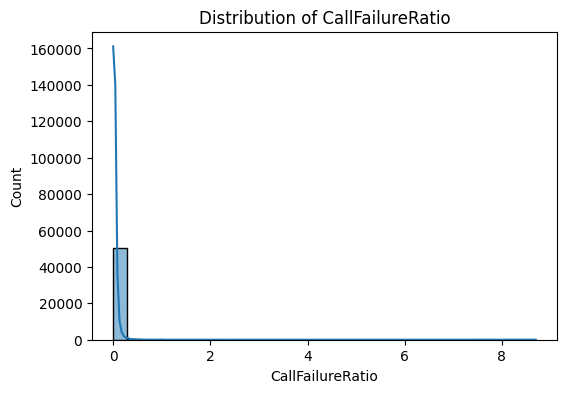

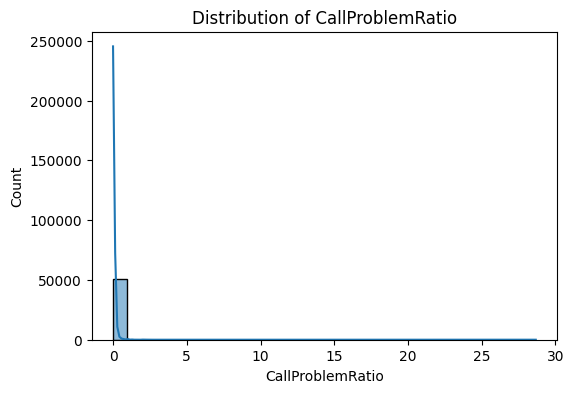

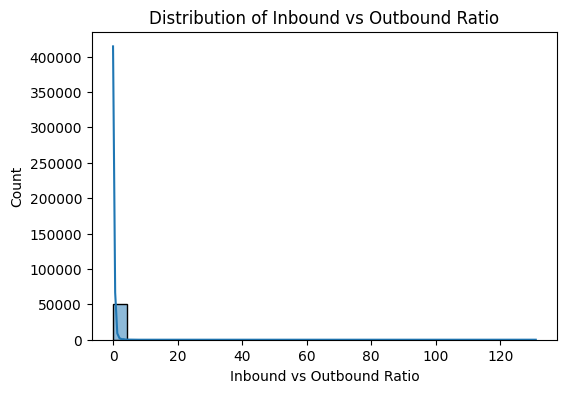

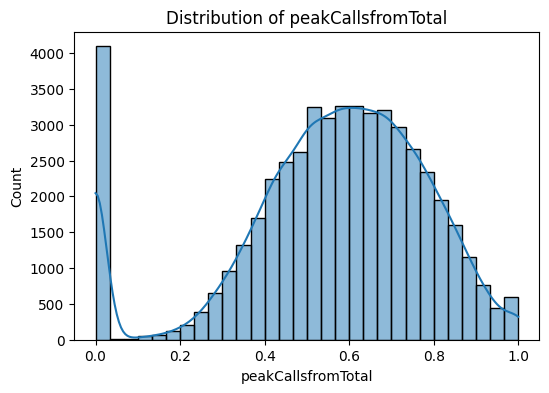

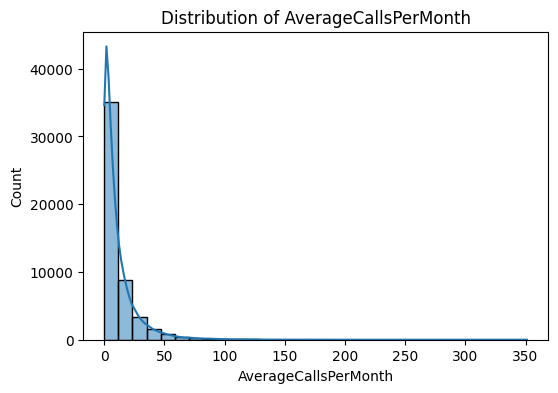

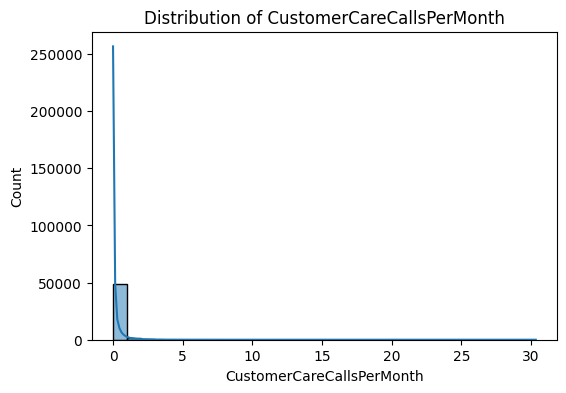

In [708]:
for col in [ 'CallFailureRatio', 'CallProblemRatio', 'Inbound vs Outbound Ratio',
            'peakCallsfromTotal', 'AverageCallsPerMonth', 'CustomerCareCallsPerMonth']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df11[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    #plt.show()
    save_path = rf"D:\Master Data Science\Graduation Project\{col}_distribution.png"
    plt.savefig(save_path)

<Axes: xlabel='Inbound vs Outbound Ratio', ylabel='Count'>

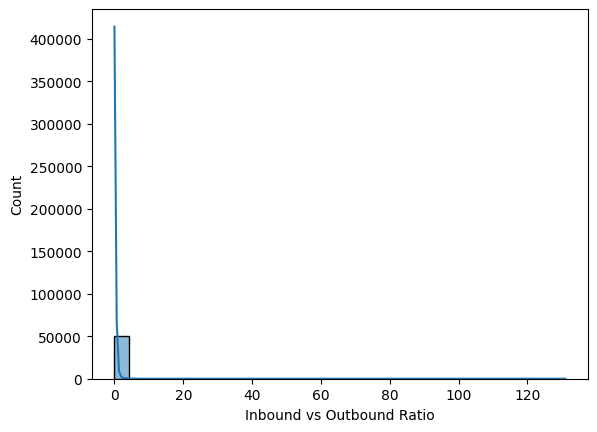

In [709]:
sns.histplot(df11['Inbound vs Outbound Ratio'], kde=True, bins=30)


In [710]:
bins = [0, 1, 5, 10, 20, 50, 100, df11['Inbound vs Outbound Ratio'].max()]
labels = ['0- <1', '1- <5', '5- <10', '10- <20', '20- <50', '50- <100', '100+']
df11['ratio_bin'] = pd.cut(df11['Inbound vs Outbound Ratio'], bins=bins, labels=labels, include_lowest=True)




In [711]:
df11

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  AverageCallsPerMonth  \
0                   -19.0  ...              1.344262   
1                     0.0  ...              0.103448   
2                     0.0  ...              0.083333   
3                     8.1  ...             14.566102   
4                    -0.2  ...              0.000000   
...                   ...  ...                   ...   
51037               -13.2  ...              1.023333   
51039                 0.0  ...              2.253333   
51040                -2.0  ...              9.156667   
51041                 0.0  ...              5.120000   
51043                15.9  ...             19.551724   

       CustomerCareCallsPerMonth  MinutesDiff  Rev_Rec_Diff  \
0                       0.000000        219.0          2.00   
1                       0.000000         10.0         -0.01   
2                       0.000000          8.0          0.00   
3                       0.072881       1312.0          7.28   
4                       0.000000          0.0          0.14   
...                          ...          ...           ...   
51037                   0.000000         20.0         14.92   
51039                   0.010000        492.0          0.00   
51040                   0.000000        720.0          1.99   
51041                   0.000000        134.0         87.49   
51043                   0.000000       1700.0         10.17   

         RevRecDiff_Flag  peakCallsfromTotal  Inbound vs Outbound Ratio  \
0                 Normal            0.707317                   0.000000   
1                Unusual            0.833333                   0.000000   
2      No Revenue/Charge            0.260000                   0.000000   
3                 Normal            0.646614                   0.396975   
4                 Normal            0.000000                   0.000000   
...                  ...                 ...                        ...   
51037             Normal            0.521173                   0.000000   
51039  No Revenue/Charge       

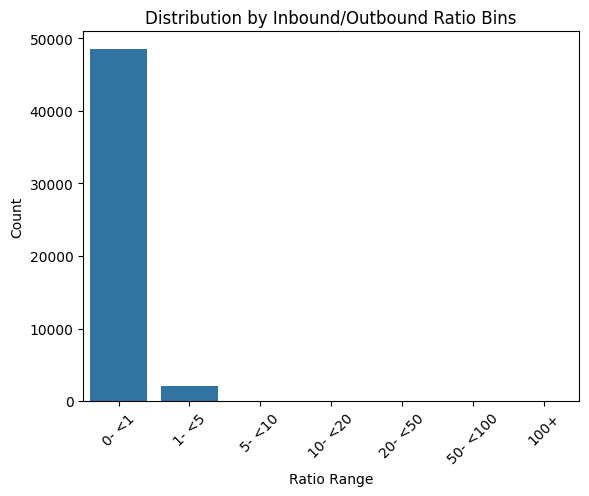

In [712]:

sns.countplot(data=df11, x='ratio_bin')
plt.title('Distribution by Inbound/Outbound Ratio Bins')
plt.xlabel('Ratio Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
save_path = rf"D:\Master Data Science\Graduation Project\CountplotInbound_Outboundratio_distribution.png"
plt.savefig(save_path, bbox_inches='tight') # يمنع الصورة تكون مقطوعة ويخليها كاملة


In [713]:

# عندنا عمود نسميه مثلاً
col = df11['Inbound vs Outbound Ratio']

conditions = [
    (col == 0),
    (col > 0) & (col < 1),
    (col == 1),
    (col > 1)
]

choices = ['Zero', 'Between 0 and 1', 'One', 'Above One']

df11['ratio_bin_custom'] = np.select(conditions, choices, default='Other')

print(df11['ratio_bin_custom'].value_counts(normalize =True)*100)


ratio_bin_custom
Between 0 and 1    66.027857
Zero               29.173170
Above One           4.121308
One                 0.677665
Name: proportion, dtype: float64


In [714]:
df12 = df11.copy()

**Condition1: Blocked Calls**

In [716]:
dominator = df11['PeakCallsInOut']+df11['OffPeakCallsInOut']
invalid_rows1= df11[df11['BlockedCalls']> dominator]
print (len(invalid_rows1))

86


**Condition2: Blocked Calls**

In [718]:
condition1 = df11['BlockedCalls'] == (df11['PeakCallsInOut'] + df11['OffPeakCallsInOut'])
cols_to_check = [
    'CustomerCareCalls',
    'ThreewayCalls',
    'CallForwardingCalls',
    'CallWaitingCalls',
    'DirectorAssistedCalls',
    'RoamingCalls',
    'RetentionCalls',
    'DroppedCalls']

condition2 = df11[cols_to_check].any(axis=1)  # أي عمود منهم يحتوي على قيمة غير صفرية
invalid_rows2 = df11[condition1 & condition2]

print("Invalid Rows in blocked and all values:", len(invalid_rows2))



Invalid Rows in blocked and all values: 2077


**Condition3: Blocked CALLS**

In [720]:
condition1 = df11['BlockedCalls'] == (df11['PeakCallsInOut'] + df11['OffPeakCallsInOut'])

# الأعمدة اللي لو فيها قيمة غير صفرية نعتبر الصف غير صالح
cols_to_check = [
  'CustomerCareCalls',
    'ThreewayCalls',
    'CallForwardingCalls',
    'CallWaitingCalls',
    'DirectorAssistedCalls',
    'RoamingCalls',
    'RetentionCalls',
    'DroppedCalls']

# الشرط 2: أي قيمة غير صفرية في الأعمدة المختارة
condition2 = (df11[cols_to_check] == 0).all(axis=1)

# الشرط 3: ReceivedCalls تكون > 0
condition3 = df11['ReceivedCalls'] > 0

# تحديد الصفوف غير الصالحة
invalid_rows3 = df11[condition1 & condition2 & condition3]

# طباعة عددهم
print("عدد الصفوف غير الصالحة:", len(invalid_rows3))


عدد الصفوف غير الصالحة: 0


**Condition4: Blocked Calls**

In [722]:
# الشرط 1: DroppedBlockedCalls == PeakCallsInOut + OffPeakCallsInOut
condition1 = df11['BlockedCalls'] == (df11['PeakCallsInOut'] + df11['OffPeakCallsInOut'])

# الشرط 2: القيم كلها = 0 في الأعمدة التالية
zero_cols = [
    'CustomerCareCalls',
    'ThreewayCalls',
    'CallForwardingCalls',
    'CallWaitingCalls',
    'DirectorAssistedCalls',
    'RoamingCalls',
    'RetentionCalls',
    'DroppedCalls']
condition2 = (df11[zero_cols] == 0).all(axis=1)

# الشرط 3: ReceivedCalls == 0
condition3 = df11['ReceivedCalls'] == 0

# الشرط 4: OverageMinutes > 0
condition4 = df11['OverageMinutes'] > 0

# الصفوف غير الصالحة بناءً على الشروط كلها
invalid_rows4 = df11[condition1 & condition2 & condition3 & condition4]

# طباعة عددهم
print("عدد الصفوف غير الصالحة:", len(invalid_rows4))


عدد الصفوف غير الصالحة: 450


In [723]:
dominator = df11['PeakCallsInOut'] + df11['OffPeakCallsInOut']

# condition 1: BlockedCalls > dominator
condition_blocked_gt = df11['BlockedCalls'] > dominator

# condition 2: BlockedCalls == Peak + OffPeak AND any value in some columns
condition_blocked_eq = df11['BlockedCalls'] == dominator
cols_non_zero = [
    'CustomerCareCalls', 'ThreewayCalls', 'CallForwardingCalls',
    'CallWaitingCalls', 'DirectorAssistedCalls', 'RoamingCalls',
    'RetentionCalls', 'DroppedCalls']
condition_any_nonzero = df11[cols_non_zero].any(axis=1)
condition_blocked_and_nonzero =  condition_blocked_eq & condition_any_nonzero

# condition 3: BlockedCalls == Peak+OffPeak AND all other cols = 0 AND ReceivedCalls > 0
condition_all_zero = (df11[cols_non_zero] == 0).all(axis=1)
condition_received_gt_0 = df11['ReceivedCalls'] > 0
condition_complex1 = condition_blocked_eq & condition_all_zero & condition_received_gt_0

# condition 4: BlockedCalls == Peak+OffPeak AND all cols = 0 AND ReceivedCalls == 0 AND OverageMinutes > 0
condition_received_eq_0 = df11['ReceivedCalls'] == 0
condition_overage_gt_0 = df11['OverageMinutes'] > 0
condition_complex2 = condition_blocked_eq & condition_all_zero & condition_received_eq_0 & condition_overage_gt_0

combined_invalid = condition_blocked_gt | condition_blocked_and_nonzero | condition_complex1 | condition_complex2
df12 = df11[~combined_invalid]
print("Number of rows before cleaning:", len(df11))
print("Number of rows after cleaning:", len(df12))


Number of rows before cleaning: 50615
Number of rows after cleaning: 48002


In [724]:
df15 =df12.copy()
print(len(df12), len(df15))

48002 48002


**Condition: All calls should be less than or equal total calls**

In [726]:
columns_to_check = [
    'CustomerCareCalls',
    'ThreewayCalls',
    'CallForwardingCalls',
    'CallWaitingCalls',
    'DirectorAssistedCalls',
    'RoamingCalls',
    'RetentionCalls',
    'DroppedCalls']

peak_total = df12['PeakCallsInOut'] + df12['OffPeakCallsInOut']
invalid_counts = {}
for col in columns_to_check:
    invalid_counts[col] = (df12[col] > peak_total).sum()
for col, count in invalid_counts.items():
    print(f"{col}: عدد الصفوف غير الصالحة = {count}")


CustomerCareCalls: عدد الصفوف غير الصالحة = 6
ThreewayCalls: عدد الصفوف غير الصالحة = 0
CallForwardingCalls: عدد الصفوف غير الصالحة = 0
CallWaitingCalls: عدد الصفوف غير الصالحة = 0
DirectorAssistedCalls: عدد الصفوف غير الصالحة = 10
RoamingCalls: عدد الصفوف غير الصالحة = 104
RetentionCalls: عدد الصفوف غير الصالحة = 13
DroppedCalls: عدد الصفوف غير الصالحة = 18


In [727]:
columns_to_check = [
    'CustomerCareCalls',
    'ThreewayCalls',
    'CallForwardingCalls',
    'CallWaitingCalls',
    'DirectorAssistedCalls',
    'RoamingCalls',
    'RetentionCalls',
    'DroppedCalls']

peak_total = df15['PeakCallsInOut'] + df15['OffPeakCallsInOut']
invalid_counts = {}
for col in columns_to_check:
    invalid_counts[col] = (df15[col] > peak_total).sum()
for col, count in invalid_counts.items():
    print(f"{col}: عدد الصفوف غير الصالحة = {count}")


CustomerCareCalls: عدد الصفوف غير الصالحة = 6
ThreewayCalls: عدد الصفوف غير الصالحة = 0
CallForwardingCalls: عدد الصفوف غير الصالحة = 0
CallWaitingCalls: عدد الصفوف غير الصالحة = 0
DirectorAssistedCalls: عدد الصفوف غير الصالحة = 10
RoamingCalls: عدد الصفوف غير الصالحة = 104
RetentionCalls: عدد الصفوف غير الصالحة = 13
DroppedCalls: عدد الصفوف غير الصالحة = 18


In [728]:
df13 = df12[~(df12[columns_to_check].gt(peak_total, axis=0).any(axis=1))] # gt used for compare every column with peak total 'greater than'

# نطبع النتائج
print("before removing:", len(df12))
print("after removing:", len(df13))
print("removed about:", len(df12) - len(df13))


before removing: 48002
after removing: 47854
removed about: 148


In [841]:
df13

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  CustomerCareCallsPerMonth  MinutesDiff  \
0                   -19.0  ...                   0.000000        219.0   
1                     0.0  ...                   0.000000         10.0   
2                     0.0  ...                   0.000000          8.0   
3                     8.1  ...                   0.072881       1312.0   
4                    -0.2  ...                   0.000000          0.0   
...                   ...  ...                        ...          ...   
51037               -13.2  ...                   0.000000         20.0   
51039                 0.0  ...                   0.010000        492.0   
51040                -2.0  ...                   0.000000        720.0   
51041                 0.0  ...                   0.000000        134.0   
51043                15.9  ...                   0.000000       1700.0   

       Rev_Rec_Diff    RevRecDiff_Flag  peakCallsfromTotal  \
0              2.00             Normal            0.707317   
1             -0.01            Unusual            0.833333   
2              0.00  No Revenue/Charge            0.260000   
3              7.28             Normal            0.646614   
4              0.14             Normal            0.000000   
...             ...                ...                 ...   
51037         14.92             Normal            0.521173   
51039          0.00  No Revenue/Charge            0.714497   
51040          1.99             Normal            0.953768   
51041         87.49             Normal            0.646484   
51043         10.17             Normal            0.562081   

       Inbound vs Outbound Ratio  CallFailureRatio  CallProblemRatio  \
0                       0.000000          0.008537          0.017073   
1                       0.000000          0.050000          0.050000   
2                       0.000000          0.000000          0.000000   
3                       0.396975          0.060507          0.069467   
4                       0.000000          0.000000          0.00000

In [842]:
df16 = df15[~(df15[columns_to_check].gt(peak_total, axis=0).any(axis=1))] # gt used for compare every column with peak total 'greater than'

# نطبع النتائج
print("before removing:", len(df15))
print("after removing:", len(df16))
print("removed about:", len(df15) - len(df16))


before removing: 48002
after removing: 47854
removed about: 148


**condition: Recieved & Overage Number with total_peak**

In [844]:
total_peak = df12['PeakCallsInOut'] + df12['OffPeakCallsInOut']
invalid_rows = (total_peak == 0) & (df12['ReceivedCalls'] > 0)
print("Invalid_rows:", invalid_rows.sum())


Invalid_rows: 0


In [845]:
total_peak = df12['PeakCallsInOut'] + df12['OffPeakCallsInOut']
invalid_rows = (total_peak == 0) & (df12['OverageMinutes'] > 0)
print("Invalid_rows:", invalid_rows.sum())


Invalid_rows: 0


***anything in bounds is very large***

In [847]:
invalid_rows = (df12['ReceivedCalls']>0) & (df12['InboundCalls'] == 0)
print("Invalid_rows:", invalid_rows.sum()) #8588 !!


Invalid_rows: 8588


In [848]:
invalid_rows = (df12['OverageMinutes']>0) & (df12['InboundCalls'] == 0)
print("Invalid_rows:", invalid_rows.sum()) #3768 !!


Invalid_rows: 3768


In [849]:
invalid_block_inbound = df12['BlockedCalls']> df12['InboundCalls']
print("Invalid_rows:", invalid_block_inbound.sum()) ##15855 !! too much


Invalid_rows: 15855


In [850]:
df12

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  CustomerCareCallsPerMonth  MinutesDiff  \
0                   -19.0  ...                   0.000000        219.0   
1                     0.0  ...                   0.000000         10.0   
2                     0.0  ...                   0.000000          8.0   
3                     8.1  ...                   0.072881       1312.0   
4                    -0.2  ...                   0.000000          0.0   
...                   ...  ...                        ...          ...   
51037               -13.2  ...                   0.000000         20.0   
51039                 0.0  ...                   0.010000        492.0   
51040                -2.0  ...                   0.000000        720.0   
51041                 0.0  ...                   0.000000        134.0   
51043                15.9  ...                   0.000000       1700.0   

       Rev_Rec_Diff    RevRecDiff_Flag  peakCallsfromTotal  \
0              2.00             Normal            0.707317   
1             -0.01            Unusual            0.833333   
2              0.00  No Revenue/Charge            0.260000   
3              7.28             Normal            0.646614   
4              0.14             Normal            0.000000   
...             ...                ...                 ...   
51037         14.92             Normal            0.521173   
51039          0.00  No Revenue/Charge            0.714497   
51040          1.99             Normal            0.953768   
51041         87.49             Normal            0.646484   
51043         10.17             Normal            0.562081   

       Inbound vs Outbound Ratio  CallFailureRatio  CallProblemRatio  \
0                       0.000000          0.008537          0.017073   
1                       0.000000          0.050000          0.050000   
2                       0.000000          0.000000          0.000000   
3                       0.396975          0.060507          0.069467   
4                       0.000000          0.000000          0.00000

In [851]:
df12.isna().sum()


CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
                            ..
Inbound vs Outbound Ratio    0
CallFailureRatio             0
CallProblemRatio             0
ratio_bin                    0
ratio_bin_custom             0
Length: 61, dtype: int64

In [852]:
df12.drop(columns ='HandsetRefurbished',inplace =True)

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\1589185345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12.drop(columns ='HandsetRefurbished',inplace =True)


In [853]:
df12.isna().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
CurrentEquipmentDays         0
TruckOwner                   0
RVOwner                      0
Homeownership                0
RespondsToMailOffers         0
OptOutMailings               0
OwnsComp

In [854]:
# حساب عدد الصفوف اللي total_bound = peak_total
df12['total_bound']= df12['OutboundCalls']+df12['OutboundCalls']
df12['peak_total']= df12['PeakCallsInOut']+df12['OffPeakCallsInOut']
#matching_cases = (df12['total_bound'] == df12['peak_total']).sum()
#print(matching_cases)


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\2862164388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['total_bound']= df12['OutboundCalls']+df12['OutboundCalls']
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\2862164388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['peak_total']= df12['PeakCallsInOut']+df12['OffPeakCallsInOut']


In [855]:
# حساب عدد الحالات اللي الفرق بين total_bound و peak_total أقل أو يساوي 5 دقايق
matching_cases = (df12['total_bound'] - df12['peak_total'])
count = (matching_cases> 0) .sum()
print(count)


454


***peak totals doesn't equal to bound total***

In [857]:
# هل في مكالمات تظهر في الاثنين معًا؟
overlap = df12[(df12['PeakCallsInOut'] > 0) & (df12['OffPeakCallsInOut'] > 0)]
print(f"عدد الصفوف اللي فيها مكالمات في الذروة وخارجها معاً: {len(overlap)}")


عدد الصفوف اللي فيها مكالمات في الذروة وخارجها معاً: 46042


In [858]:
columns_to_check = [
    'CustomerCareCalls',
    'ThreewayCalls',
    'CallForwardingCalls',
    'CallWaitingCalls',
    'DirectorAssistedCalls',
    'RoamingCalls',
    'RetentionCalls',
    'DroppedCalls']

peak_total = df12['InboundCalls'] + df12['OutboundCalls']
invalid_counts = {}
for col in columns_to_check:
    invalid_counts[col] = (df12[col] > peak_total).sum()
for col, count in invalid_counts.items():
    print(f"{col}: عدد الصفوف غير الصالحة = {count}")


CustomerCareCalls: عدد الصفوف غير الصالحة = 1314
ThreewayCalls: عدد الصفوف غير الصالحة = 240
CallForwardingCalls: عدد الصفوف غير الصالحة = 7
CallWaitingCalls: عدد الصفوف غير الصالحة = 211
DirectorAssistedCalls: عدد الصفوف غير الصالحة = 833
RoamingCalls: عدد الصفوف غير الصالحة = 1434
RetentionCalls: عدد الصفوف غير الصالحة = 149
DroppedCalls: عدد الصفوف غير الصالحة = 4417


In [859]:
df12

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  Rev_Rec_Diff    RevRecDiff_Flag  \
0                   -19.0  ...          2.00             Normal   
1                     0.0  ...         -0.01            Unusual   
2                     0.0  ...          0.00  No Revenue/Charge   
3                     8.1  ...          7.28             Normal   
4                    -0.2  ...          0.14             Normal   
...                   ...  ...           ...                ...   
51037               -13.2  ...         14.92             Normal   
51039                 0.0  ...          0.00  No Revenue/Charge   
51040                -2.0  ...          1.99             Normal   
51041                 0.0  ...         87.49             Normal   
51043                15.9  ...         10.17             Normal   

       peakCallsfromTotal  Inbound vs Outbound Ratio  CallFailureRatio  \
0                0.707317                   0.000000          0.008537   
1                0.833333                   0.000000          0.050000   
2                0.260000                   0.000000          0.000000   
3                0.646614                   0.396975          0.060507   
4                0.000000                   0.000000          0.000000   
...                   ...                        ...               ...   
51037            0.521173                   0.000000          0.022801   
51039            0.714497                   0.000000          0.054734   
51040            0.953768                   0.011673          0.052057   
51041            0.646484                   0.000000          0.026042   
51043            0.562081                   0.371237          0.029453   

       CallProblemRatio  ratio_bin  ratio_bin_custom  total_bound  peak_total  
0              0.017073      0- <1              Zero          0.0        82.0  
1              0.050000      0- <1              Zero          0.0         6.0  
2              0.000000      0- <1              Zero          0.6         5.0  
3              0.069467      0- <1   Between 0 

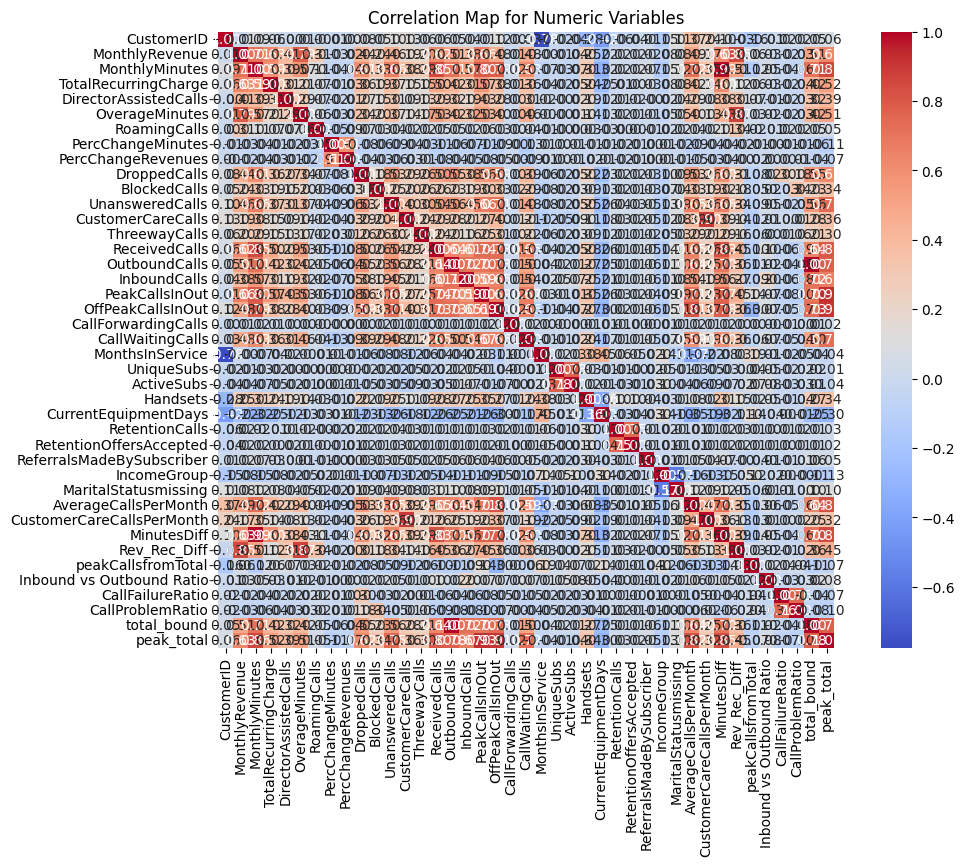

In [860]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب مصفوفة الارتباط لكل المتغيرات الرقمية فقط
corr = df12.select_dtypes(include='number').corr()

# إعداد حجم الشكل
plt.figure(figsize=(12, 8))

# رسم خريطة الحرارة للارتباطات
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

plt.title('Correlation Map for Numeric Variables')
plt.show()


In [861]:
df12.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'TruckOwner', 'RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'CreditCat', 'AverageCalls

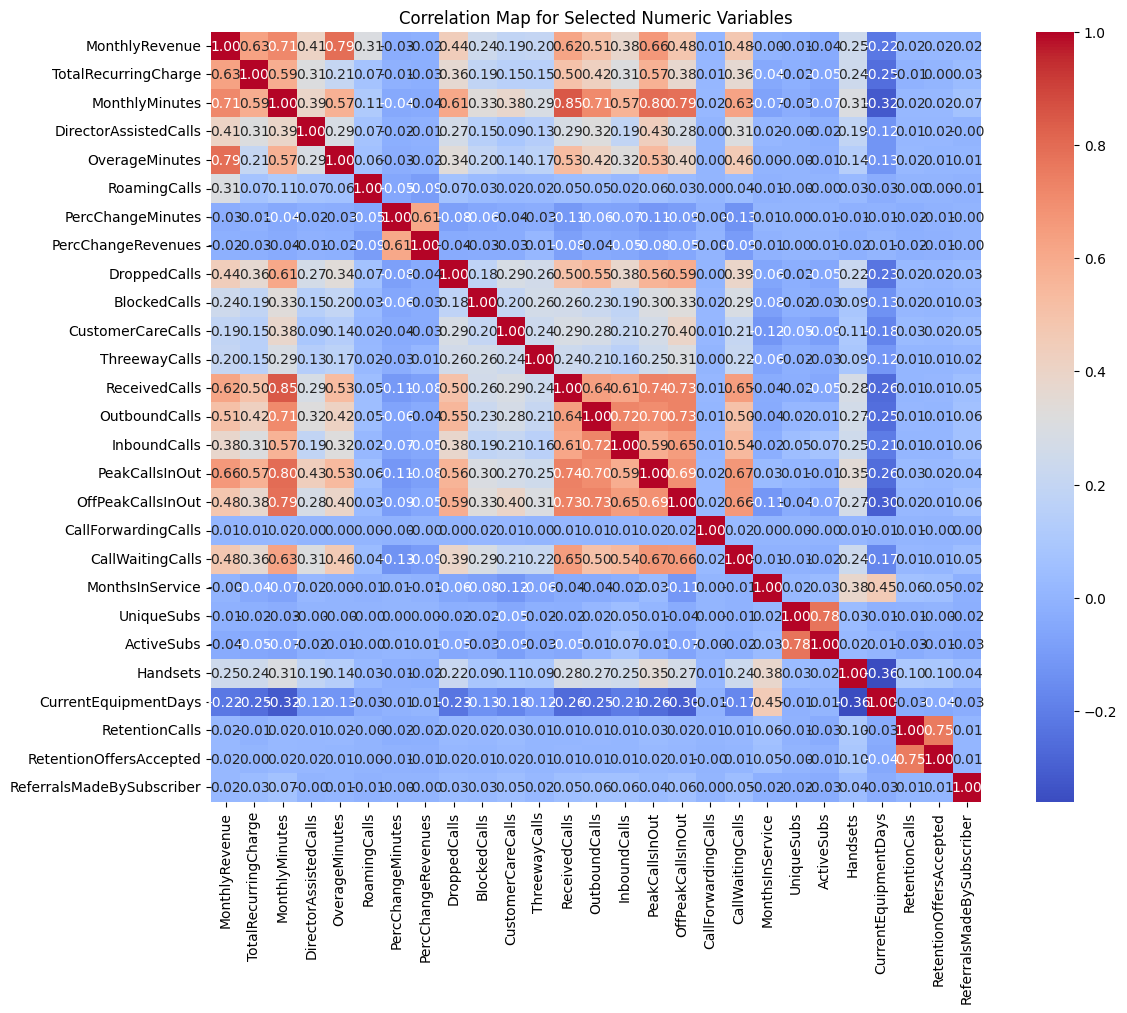

In [862]:

columns_of_interest = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'MonthlyMinutes', 'DirectorAssistedCalls',
    'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
    'DroppedCalls', 'BlockedCalls', 'CustomerCareCalls', 'ThreewayCalls',
    'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
    'OffPeakCallsInOut', 'CallForwardingCalls', 'CallWaitingCalls',
    'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets',
    'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted',
    'ReferralsMadeBySubscriber'
]

existing_cols = [col for col in columns_of_interest if col in df12.columns]

corr = df12[existing_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

plt.title('Correlation Map for Selected Numeric Variables')
plt.show()


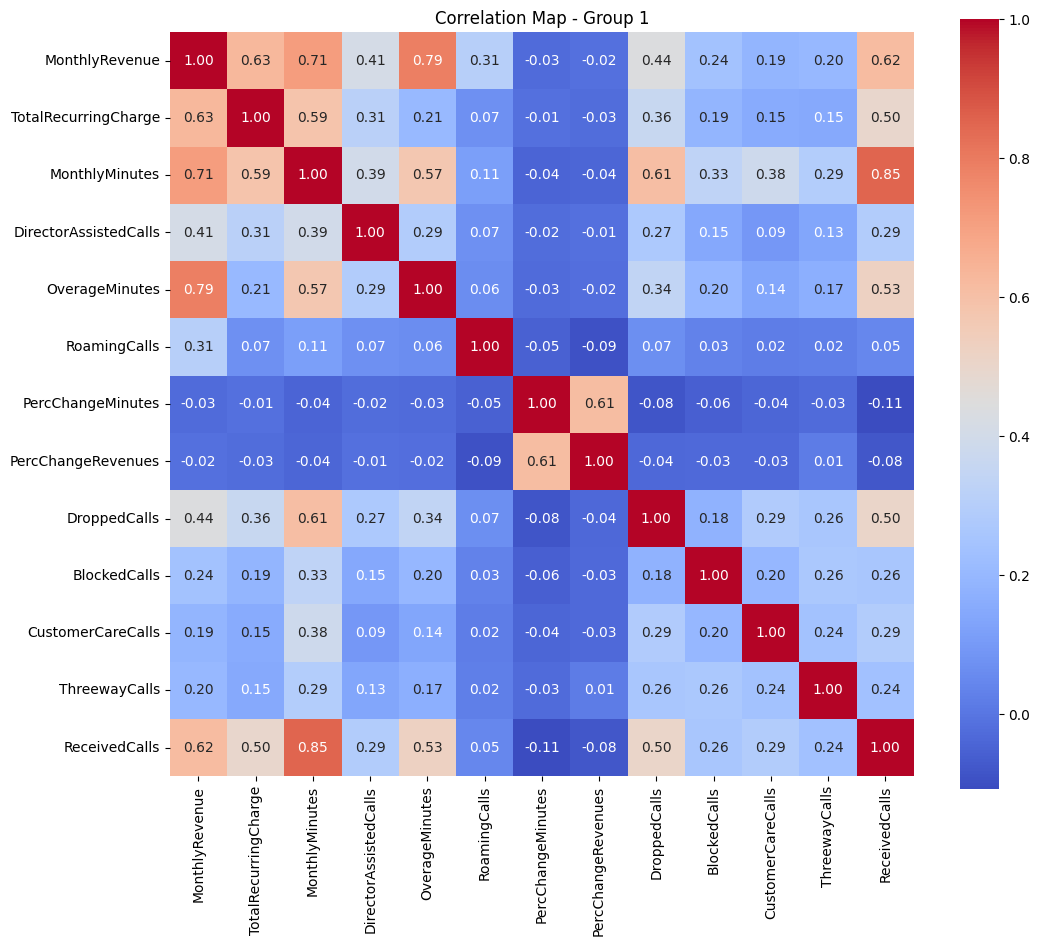

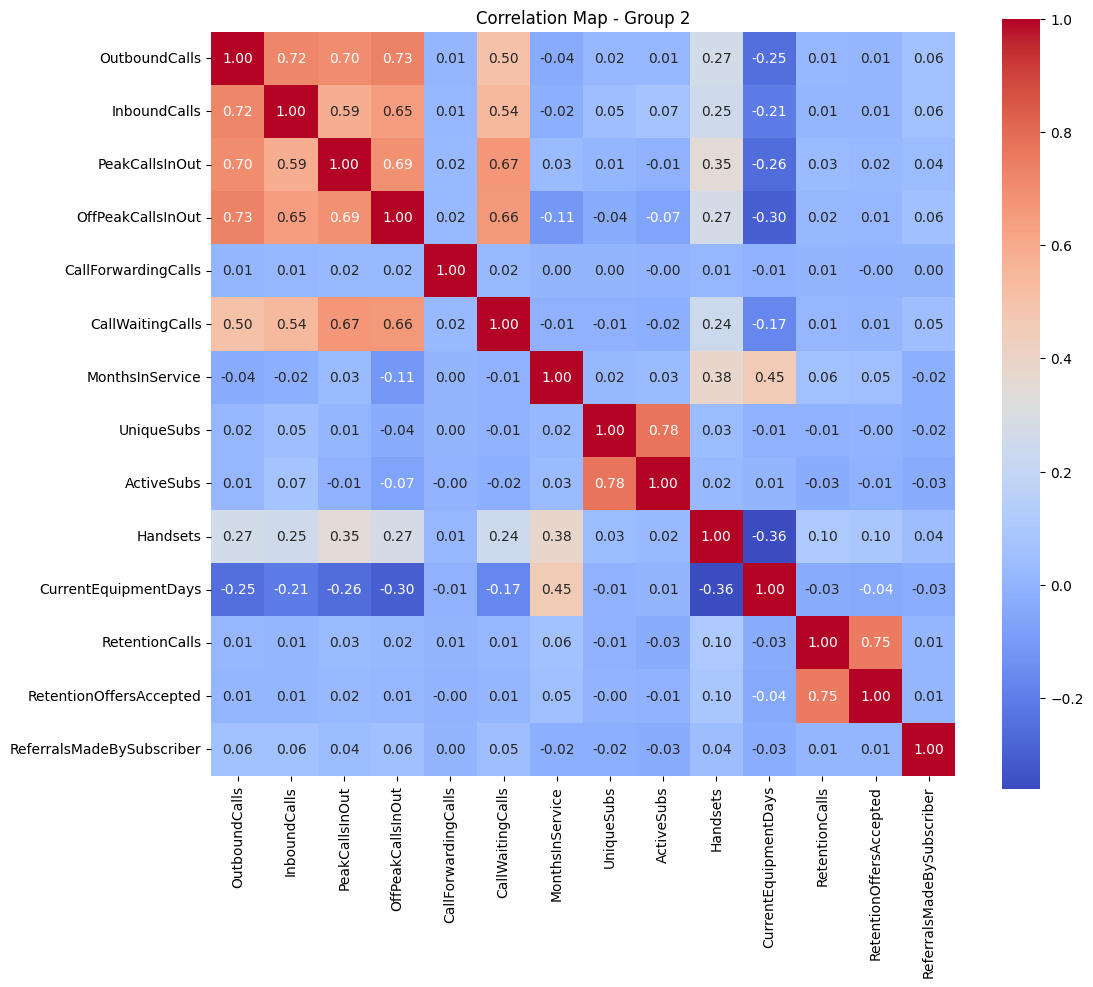

In [863]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'MonthlyMinutes', 'DirectorAssistedCalls',
    'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
    'DroppedCalls', 'BlockedCalls', 'CustomerCareCalls', 'ThreewayCalls',
    'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
    'OffPeakCallsInOut', 'CallForwardingCalls', 'CallWaitingCalls',
    'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets',
    'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted',
    'ReferralsMadeBySubscriber'
]

existing_cols = [col for col in columns_of_interest if col in df12.columns]

# تقسيم الأعمدة على مجموعتين
mid_index = len(existing_cols) // 2
group1 = existing_cols[:mid_index]
group2 = existing_cols[mid_index:]

# رسم المجموعة الأولى
plt.figure(figsize=(12, 10))
sns.heatmap(df12[group1].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Map - Group 1')
plt.show()

# رسم المجموعة الثانية
plt.figure(figsize=(12, 10))
sns.heatmap(df12[group2].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Map - Group 2')
plt.show()


In [864]:

# حساب مصفوفة الارتباط للأعمدة اللي اخترناها مسبقاً
corr = df12[existing_cols].corr()

# تحويل مصفوفة الارتباط إلى صيغة طويلة (pairs)
corr_pairs = corr.unstack()

# إزالة الارتباط الذاتي (كل متغير مع نفسه)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# اختيار الارتباطات القوية (أكبر من 0.7 أو أقل من -0.7)
strong_corr = corr_pairs[(corr_pairs >= 0.7) | (corr_pairs <= -0.7)]

# إزالة التكرار (لأن العلاقة تظهر مرتين)
strong_corr = strong_corr.drop_duplicates()

# ترتيب النتائج حسب قيمة الارتباط تنازليًا
strong_corr = strong_corr.sort_values(ascending=False)

print("أزواج المتغيرات ذات الارتباط القوي:")
print(strong_corr)


أزواج المتغيرات ذات الارتباط القوي:
MonthlyMinutes  ReceivedCalls              0.850254
                PeakCallsInOut             0.796822
MonthlyRevenue  OverageMinutes             0.789905
MonthlyMinutes  OffPeakCallsInOut          0.785219
UniqueSubs      ActiveSubs                 0.776219
RetentionCalls  RetentionOffersAccepted    0.753433
ReceivedCalls   PeakCallsInOut             0.738643
OutboundCalls   OffPeakCallsInOut          0.733643
ReceivedCalls   OffPeakCallsInOut          0.729996
OutboundCalls   InboundCalls               0.719560
MonthlyRevenue  MonthlyMinutes             0.714077
MonthlyMinutes  OutboundCalls              0.712748
dtype: float64


In [865]:
df12['ActiveRate'] = df12['ActiveSubs'] / np.where(df12['UniqueSubs'] == 0, 1, df12['UniqueSubs'])
df12['RetentionSuccessRatio'] = df12['RetentionOffersAccepted'] / np.where(df12['RetentionCalls'] == 0, 1, df12['RetentionCalls'])
df12['OutInRatio'] = df12['OutboundCalls'] / np.where(df12['InboundCalls'] == 0, 1, df12['InboundCalls'])
df12['RevenuePerMinute'] = df12['MonthlyRevenue'] / np.where(df12['MonthlyMinutes'] == 0, 1, df12['MonthlyMinutes'])
df12['RevenuePerOverage'] = df12['MonthlyRevenue'] / np.where(df12['OverageMinutes'] == 0, 1, df12['OverageMinutes'])


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\330123075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['ActiveRate'] = df12['ActiveSubs'] / np.where(df12['UniqueSubs'] == 0, 1, df12['UniqueSubs'])
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\330123075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12['RetentionSuccessRatio'] = df12['RetentionOffersAccepted'] / np.where(df12['RetentionCalls'] == 0, 1, df12['RetentionCalls'])
C:\Users\nermeen.ashraf\AppData\Local\Te

In [866]:
df12.isna().sum()

CustomerID               0
Churn                    0
MonthlyRevenue           0
MonthlyMinutes           0
TotalRecurringCharge     0
                        ..
ActiveRate               0
RetentionSuccessRatio    0
OutInRatio               0
RevenuePerMinute         0
RevenuePerOverage        0
Length: 67, dtype: int64

In [867]:
df12.columns


Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'TruckOwner', 'RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'CreditCat', 'AverageCalls

In [868]:
def correlationfunction (df, cols):
    corr = df[cols].corr()
    corr_pairs = corr.unstack()
    corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
    strong_corr = corr_pairs[(corr_pairs >= 0.7) | (corr_pairs <= -0.7)]
    strong_corr = strong_corr.drop_duplicates()
    strong_corr = strong_corr.sort_values(ascending=False)
    print("Variables are highly correlated")
    print(strong_corr)

columns_of_interest = [
     'TotalRecurringCharge', 'DirectorAssistedCalls',
    'OverageMinutes','MonthlyMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
    'DroppedCalls', 'BlockedCalls', 'ThreewayCalls',
    'ReceivedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
    'MonthsInService', 'Handsets',
    'CurrentEquipmentDays',
    'ReferralsMadeBySubscriber','ActiveRate','RetentionSuccessRatio','OutInRatio','RevenuePerMinute','RevenuePerOverage','peakCallsfromTotal','AverageCallsPerMonth','CustomerCareCallsPerMonth',
    'CallFailureRatio'
]

correlationfunction(df12,columns_of_interest)


Variables are highly correlated
MonthlyMinutes  ReceivedCalls           0.850254
                AverageCallsPerMonth    0.717822
dtype: float64


In [869]:
df12.drop(columns ='OutInRatio',inplace =True)
df12

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\1734061454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df12.drop(columns ='OutInRatio',inplace =True)


CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  CallFailureRatio  CallProblemRatio  ratio_bin  \
0                   -19.0  ...          0.008537          0.017073      0- <1   
1                     0.0  ...          0.050000          0.050000      0- <1   
2                     0.0  ...          0.000000          0.000000      0- <1   
3                     8.1  ...          0.060507          0.069467      0- <1   
4                    -0.2  ...          0.000000          0.000000      0- <1   
...                   ...  ...               ...               ...        ...   
51037               -13.2  ...          0.022801          0.022801      0- <1   
51039                 0.0  ...          0.054734          0.059172      0- <1   
51040                -2.0  ...          0.052057          0.055697      0- <1   
51041                 0.0  ...          0.026042          0.032552      0- <1   
51043                15.9  ...          0.029453          0.030688      0- <1   

       ratio_bin_custom  total_bound  peak_total  ActiveRate  \
0                  Zero          0.0        82.0         0.5   
1                  Zero          0.0         6.0         1.0   
2                  Zero          0.6         5.0         1.0   
3       Between 0 and 1        740.6       859.4         1.0   
4                  Zero          0.0         0.0         1.0   
...                 ...          ...         ...         ...   
51037              Zero          0.0        30.7         1.0   
51039              Zero         13.4        67.6         1.0   
51040   Between 0 and 1         51.4       274.7         1.0   
51041              Zero          2.6       153.6         1.0   
51043   Between 0 and 1        179.4       567.0         1.0   

       RetentionSuccessRatio  RevenuePerMinute  RevenuePerOverage  
0                        0.0          0.109589          24.000000  
1                        0.0          1.699000          16.990000  
2                        0.0          4.750000          38.000000  
3                        0.0          0.062713 

In [870]:
df12.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'TruckOwner', 'RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'CreditCat', 'AverageCalls

***df13 after filtering variables***

In [872]:
cols_to_remove = [
    'UnansweredCalls', 'CustomerCareCalls', 'DroppedCalls', 'OutboundCalls', 'InboundCalls',
    'UniqueSubs', 'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted',
    'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MinutesDiff',
    'Rev_Rec_Diff', 'RevRecDiff_Flag', 'CallProblemRatio', 'ratio_bin', 'ratio_bin_custom',
    'total_bound', 'peak_total'
]

df13= df12.drop(columns=cols_to_remove)


In [873]:
df13

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  CreditCat  AverageCallsPerMonth  \
0                   -19.0  ...       High              1.344262   
1                     0.0  ...     Medium              0.103448   
2                     0.0  ...       High              0.083333   
3                     8.1  ...     Medium             14.566102   
4                    -0.2  ...       High              0.000000   
...                   ...  ...        ...                   ...   
51037               -13.2  ...       High              1.023333   
51039                 0.0  ...        Low              2.253333   
51040                -2.0  ...       High              9.156667   
51041                 0.0  ...        Low              5.120000   
51043                15.9  ...       High             19.551724   

       CustomerCareCallsPerMonth  peakCallsfromTotal  \
0                       0.000000            0.707317   
1                       0.000000            0.833333   
2                       0.000000            0.260000   
3                       0.072881            0.646614   
4                       0.000000            0.000000   
...                          ...                 ...   
51037                   0.000000            0.521173   
51039                   0.010000            0.714497   
51040                   0.000000            0.953768   
51041                   0.000000            0.646484   
51043                   0.000000            0.562081   

       Inbound vs Outbound Ratio  CallFailureRatio  ActiveRate  \
0                       0.000000          0.008537         0.5   
1                       0.000000          0.050000         1.0   
2                       0.000000          0.000000         1.0   
3                       0.396975          0.060507         1.0   
4                       0.000000          0.000000         1.0   
...                          ...               ...         ...   
51037                   0.000000          0.022801         1.0   
51039                   0.000000          0.054734     

### EDA after Feature Engineering

In [875]:
df13.describe()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  4.800200e+04    48002.000000    48002.000000          48002.000000   
mean   3.199036e+06       59.284188      530.292634             47.073893   
std    1.177699e+05       44.895592      534.871828             23.867116   
min    3.000002e+06        0.000000        0.000000              0.000000   
25%    3.097176e+06       33.832500      159.000000             30.000000   
50%    3.194348e+06       49.000000      369.000000             45.000000   
75%    3.308844e+06       71.640000      730.000000             60.000000   
max    3.399974e+06     1223.380000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count           48002.000000    48002.000000  48002.000000       48002.000000   
mean                0.904484       40.471814      1.237598         -12.004250   
std                 2.257032       97.916709     10.021114         260.565168   
min                 0.000000        0.000000      0.000000       -3875.000000   
25%                 0.000000        0.000000      0.000000         -84.000000   
50%                 0.250000        2.000000      0.000000          -5.000000   
75%                 0.990000       41.000000      0.200000          66.000000   
max               159.390000     4321.000000   1112.400000        5192.000000   

       PercChangeRevenues  BlockedCalls  ...  MaritalStatusmissing  \
count        48002.000000  48002.000000  ...          48002.000000   
mean            -1.288248      4.294011  ...              0.385005   
std             40.039214     10.963710  ...              0.486602   
min          -1107.700000      0.000000  ...              0.000000   
25%             -7.200000      0.300000  ...              0.000000   
50%             -0.300000      1.300000  ...              0.000000   
75%              1.600000      4.000000  ...              1.000000   
max           2483.500000    384.300000  ...              1.000000   

       AverageCallsPerMonth  CustomerCareCallsPerMonth  peakCallsfromTotal  \
count          48002.000000               48002.000000        48002.000000   
mean              11.893331                   0.160613            0.588174   
std               16.000726                   0.492489            0.198199   
min                0.000000                   0.000000            0.000000   
25%                2.538095                   0.000000            0.470458   
50%                6.646061                   0.000000            0.600686   
75%               15.000000                   0.117391            0.727273   
max              351.250000                  30.333333            1.000000   

       Inbound vs Outbound Ratio  CallFailureRatio    ActiveRate  \
count               48002.000000      48002.000000  48002.000000   
mean                    0.295975          0.043090      0.937686   
std                     0.877242          0.065008      0.166752   
min                     0.000000          0.000000      0.000000   
25%                     0.000000          0.013889      1.000000   
50%                     0.165909          0.030000      1.000000   
75%                     0.382114          0.053698      1.000000   
max                   131.000000          3.723404      1.000000   

       RetentionSuccessRatio  RevenuePerMinute  RevenuePerOverage  
count           48002.000000      48002.000000       48002.000000  
mean                0.016373          0.673710          22.439126  
std                 0.125576          3.806287          26.530475  
min                 0.000000          0.000000           0.000000  
25%                 0.000000          0.088084           1.373782  
50%                 0.000000          0.137346          10.250000  
75%                 0.000000          0.248432          35.480000  
max                 1.000000        163.230000         861.110000  

[8 rows x 31 columns]

In [876]:
df16.describe()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  4.785400e+04    47854.000000    47854.000000          47854.000000   
mean   3.199047e+06       59.184832      531.100660             47.105905   
std    1.177539e+05       44.077045      534.520395             23.866115   
min    3.000002e+06        0.000000        0.000000              0.000000   
25%    3.097268e+06       33.840000      160.000000             30.000000   
50%    3.194348e+06       49.000000      370.000000             45.000000   
75%    3.308824e+06       71.600000      731.000000             60.000000   
max    3.399974e+06      926.080000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count            47854.00000    47854.000000  47854.000000       47854.000000   
mean                 0.90520       40.552514      1.085088         -11.992853   
std                  2.25418       98.029620      5.498053         259.730980   
min                  0.00000        0.000000      0.000000       -3875.000000   
25%                  0.00000        0.000000      0.000000         -84.000000   
50%                  0.25000        3.000000      0.000000          -5.000000   
75%                  0.99000       41.000000      0.200000          66.000000   
max                159.39000     4321.000000    292.500000        5192.000000   

       PercChangeRevenues  DroppedCalls  ...   IncomeGroup  \
count        47854.000000  47854.000000  ...  47854.000000   
mean            -1.279479      6.367679  ...      4.322293   
std             38.702934      9.182227  ...      3.135027   
min           -626.400000      0.000000  ...      0.000000   
25%             -7.100000      1.000000  ...      0.000000   
50%             -0.300000      3.300000  ...      5.000000   
75%              1.600000      8.000000  ...      7.000000   
max           2483.500000    221.700000  ...      9.000000   

       MaritalStatusmissing  AverageCallsPerMonth  CustomerCareCallsPerMonth  \
count          47854.000000          47854.000000               47854.000000   
mean               0.385046             11.925229                   0.159940   
std                0.486611             16.013891                   0.466273   
min                0.000000              0.000000                   0.000000   
25%                0.000000              2.560813                   0.000000   
50%                0.000000              6.677009                   0.000000   
75%                1.000000             15.050000                   0.117647   
max                1.000000            351.250000                  16.571429   

        MinutesDiff  Rev_Rec_Diff  peakCallsfromTotal  \
count  47854.000000  47854.000000        47854.000000   
mean     490.548146     12.078927            0.588120   
std      485.081087     34.185774            0.197774   
min        0.000000    -52.620000            0.000000   
25%      151.000000     -4.520000            0.470588   
50%      344.000000      1.790000            0.600626   
75%      672.000000     15.110000            0.727042   
max     6319.000000    886.080000            1.000000   

       Inbound vs Outbound Ratio  CallFailureRatio  CallProblemRatio  
count               47854.000000      47854.000000      47854.000000  
mean                    0.296672          0.042276          0.072298  
std                     0.878449          0.052589          0.082301  
min                     0.000000          0.000000          0.000000  
25%                     0.000000          0.013918          0.029083  
50%                     0.166667          0.030000          0.050279  
75%                     0.382919          0.053600          0.086384  
max                   131.000000          1.000000          1.363636  

[8 rows x 40 columns]

In [877]:
df12.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'TruckOwner', 'RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'CreditCat', 'AverageCalls

In [878]:
invalids= df12['DroppedCalls']>(df12['PeakCallsInOut']+df12['OffPeakCallsInOut'])
count =invalids.sum()
print (count)

18


In [879]:
invalids= df16['DroppedCalls']>(df16['PeakCallsInOut']+df16['OffPeakCallsInOut'])
count =invalids.sum()
print (count)

0


### there 's a mistake happend, df13 -- variables cleaned but chosen / df16 -- variables cleaned & All

In [881]:
df16.describe()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  4.785400e+04    47854.000000    47854.000000          47854.000000   
mean   3.199047e+06       59.184832      531.100660             47.105905   
std    1.177539e+05       44.077045      534.520395             23.866115   
min    3.000002e+06        0.000000        0.000000              0.000000   
25%    3.097268e+06       33.840000      160.000000             30.000000   
50%    3.194348e+06       49.000000      370.000000             45.000000   
75%    3.308824e+06       71.600000      731.000000             60.000000   
max    3.399974e+06      926.080000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count            47854.00000    47854.000000  47854.000000       47854.000000   
mean                 0.90520       40.552514      1.085088         -11.992853   
std                  2.25418       98.029620      5.498053         259.730980   
min                  0.00000        0.000000      0.000000       -3875.000000   
25%                  0.00000        0.000000      0.000000         -84.000000   
50%                  0.25000        3.000000      0.000000          -5.000000   
75%                  0.99000       41.000000      0.200000          66.000000   
max                159.39000     4321.000000    292.500000        5192.000000   

       PercChangeRevenues  DroppedCalls  ...   IncomeGroup  \
count        47854.000000  47854.000000  ...  47854.000000   
mean            -1.279479      6.367679  ...      4.322293   
std             38.702934      9.182227  ...      3.135027   
min           -626.400000      0.000000  ...      0.000000   
25%             -7.100000      1.000000  ...      0.000000   
50%             -0.300000      3.300000  ...      5.000000   
75%              1.600000      8.000000  ...      7.000000   
max           2483.500000    221.700000  ...      9.000000   

       MaritalStatusmissing  AverageCallsPerMonth  CustomerCareCallsPerMonth  \
count          47854.000000          47854.000000               47854.000000   
mean               0.385046             11.925229                   0.159940   
std                0.486611             16.013891                   0.466273   
min                0.000000              0.000000                   0.000000   
25%                0.000000              2.560813                   0.000000   
50%                0.000000              6.677009                   0.000000   
75%                1.000000             15.050000                   0.117647   
max                1.000000            351.250000                  16.571429   

        MinutesDiff  Rev_Rec_Diff  peakCallsfromTotal  \
count  47854.000000  47854.000000        47854.000000   
mean     490.548146     12.078927            0.588120   
std      485.081087     34.185774            0.197774   
min        0.000000    -52.620000            0.000000   
25%      151.000000     -4.520000            0.470588   
50%      344.000000      1.790000            0.600626   
75%      672.000000     15.110000            0.727042   
max     6319.000000    886.080000            1.000000   

       Inbound vs Outbound Ratio  CallFailureRatio  CallProblemRatio  
count               47854.000000      47854.000000      47854.000000  
mean                    0.296672          0.042276          0.072298  
std                     0.878449          0.052589          0.082301  
min                     0.000000          0.000000          0.000000  
25%                     0.000000          0.013918          0.029083  
50%                     0.166667          0.030000          0.050279  
75%                     0.382919          0.053600          0.086384  
max                   131.000000          1.000000          1.363636  

[8 rows x 40 columns]

In [882]:
df13.describe()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  4.800200e+04    48002.000000    48002.000000          48002.000000   
mean   3.199036e+06       59.284188      530.292634             47.073893   
std    1.177699e+05       44.895592      534.871828             23.867116   
min    3.000002e+06        0.000000        0.000000              0.000000   
25%    3.097176e+06       33.832500      159.000000             30.000000   
50%    3.194348e+06       49.000000      369.000000             45.000000   
75%    3.308844e+06       71.640000      730.000000             60.000000   
max    3.399974e+06     1223.380000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count           48002.000000    48002.000000  48002.000000       48002.000000   
mean                0.904484       40.471814      1.237598         -12.004250   
std                 2.257032       97.916709     10.021114         260.565168   
min                 0.000000        0.000000      0.000000       -3875.000000   
25%                 0.000000        0.000000      0.000000         -84.000000   
50%                 0.250000        2.000000      0.000000          -5.000000   
75%                 0.990000       41.000000      0.200000          66.000000   
max               159.390000     4321.000000   1112.400000        5192.000000   

       PercChangeRevenues  BlockedCalls  ...  MaritalStatusmissing  \
count        48002.000000  48002.000000  ...          48002.000000   
mean            -1.288248      4.294011  ...              0.385005   
std             40.039214     10.963710  ...              0.486602   
min          -1107.700000      0.000000  ...              0.000000   
25%             -7.200000      0.300000  ...              0.000000   
50%             -0.300000      1.300000  ...              0.000000   
75%              1.600000      4.000000  ...              1.000000   
max           2483.500000    384.300000  ...              1.000000   

       AverageCallsPerMonth  CustomerCareCallsPerMonth  peakCallsfromTotal  \
count          48002.000000               48002.000000        48002.000000   
mean              11.893331                   0.160613            0.588174   
std               16.000726                   0.492489            0.198199   
min                0.000000                   0.000000            0.000000   
25%                2.538095                   0.000000            0.470458   
50%                6.646061                   0.000000            0.600686   
75%               15.000000                   0.117391            0.727273   
max              351.250000                  30.333333            1.000000   

       Inbound vs Outbound Ratio  CallFailureRatio    ActiveRate  \
count               48002.000000      48002.000000  48002.000000   
mean                    0.295975          0.043090      0.937686   
std                     0.877242          0.065008      0.166752   
min                     0.000000          0.000000      0.000000   
25%                     0.000000          0.013889      1.000000   
50%                     0.165909          0.030000      1.000000   
75%                     0.382114          0.053698      1.000000   
max                   131.000000          3.723404      1.000000   

       RetentionSuccessRatio  RevenuePerMinute  RevenuePerOverage  
count           48002.000000      48002.000000       48002.000000  
mean                0.016373          0.673710          22.439126  
std                 0.125576          3.806287          26.530475  
min                 0.000000          0.000000           0.000000  
25%                 0.000000          0.088084           1.373782  
50%                 0.000000          0.137346          10.250000  
75%                 0.000000          0.248432          35.480000  
max                 1.000000        163.230000         861.110000  

[8 rows x 31 columns]

#### 1- Churn distribution

In [884]:
churn_counts = df16['Churn'].value_counts()

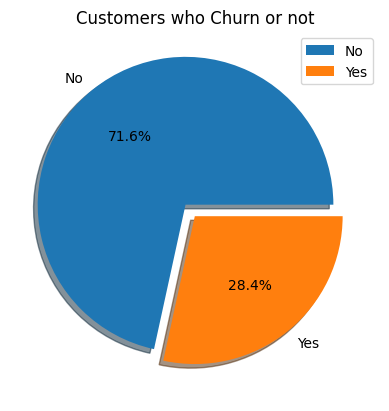

In [885]:
label = churn_counts.index
explode =[0.1,0]
plt.pie(churn_counts.values, labels =label,shadow=True,explode =explode, autopct='%.1f%%')
plt.title('Customers who Churn or not')
plt.legend()
plt.show()

#### 2- Monthly revenue dist

In [887]:
df16['MonthlyRevenue'].describe()

count    47854.000000
mean        59.184832
std         44.077045
min          0.000000
25%         33.840000
50%         49.000000
75%         71.600000
max        926.080000
Name: MonthlyRevenue, dtype: float64

In [888]:
monthly_revenue = df16['MonthlyRevenue']
monthly_revenue_dist = np.histogram(monthly_revenue, bins =[0,10,20,30,40,50,60,70,80,90,100,200,1000])
monthly_revenue_dist_label = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-200','200-1000']
monthly_revenue_dist

(array([  316,  3071,  3298, 11989,  6056,  6922,  3761,  3025,  2406,
         1645,  4624,   741], dtype=int64),
 array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
         200, 1000]))

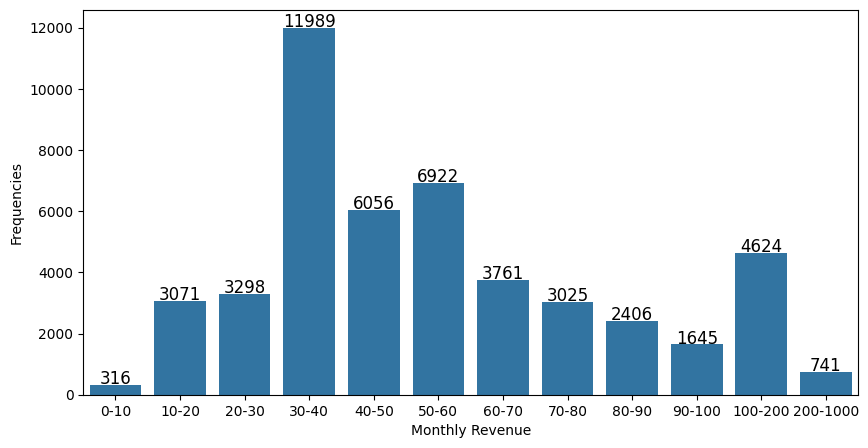

In [1001]:
plt.figure(figsize=(10,5))
#purple_palette = (
#     sns.color_palette("Purples", 3) +  # light to medium purple
#     sns.color_palette("BuPu", 3) +     # blue-purple shades
#     sns.color_palette("PuRd", 3) +     # purple-red shades
#     sns.color_palette("RdPu", 3)       # red-purple shades
# )

sns.barplot(x= monthly_revenue_dist_label, y= monthly_revenue_dist[0],color = '#1f77b4')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequencies')

for i, value in enumerate(monthly_revenue_dist[0]):
    plt.text(i, value+200, str(value), fontsize=12, color='black', horizontalalignment='center',verticalalignment='center')
save_path = r"D:\Master Data Science\Graduation Project\EDA\MonthlyRevenue_distribution.png"
plt.savefig(save_path, bbox_inches='tight', transparent=True) # يمنع الصورة تكون مقطوعة ويخليها كاملة


#### 3- Performance of Retention Team

In [891]:
df16.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'HandsetRefurbished', 'TruckOwner',
       'RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'Cre

Number of customers communicate with retention team: 1515
Number of customers lost after calls : 644
Number of customers not lost after calls : 871


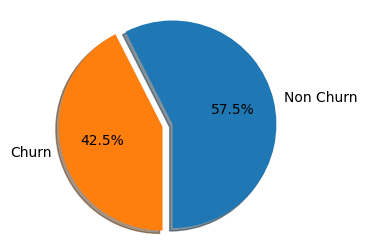

In [979]:
Retentiondf =df16[df16['MadeCallToRetentionTeam']=='Yes']
print ("Number of customers communicate with retention team: {}".format(df16[df16['MadeCallToRetentionTeam']=='Yes'].shape[0]))
print("Number of customers lost after calls : {}".format(Retentiondf[Retentiondf['Churn']=='Yes'].shape[0]))
print("Number of customers not lost after calls : {}".format(Retentiondf[Retentiondf['Churn']=='No'].shape[0]))

slices=[Retentiondf[Retentiondf['Churn']=='No'].shape[0],Retentiondf[Retentiondf['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]
fig1, ax1 = plt.subplots(figsize=(3, 3))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
# Save the figure
save_path = rf"D:\Master Data Science\Graduation Project\EDA\CUSTOMERCALLRETENTIONTEAM2_distribution.png"
fig1.savefig(save_path, bbox_inches='tight', transparent=True) # يمنع الصورة تكون مقطوعة ويخليها كاملة



Number of customers didn't communicate with retention team: 46339
Number of customers lost without calls : 12956
Number of customers not lost even without calls : 33383


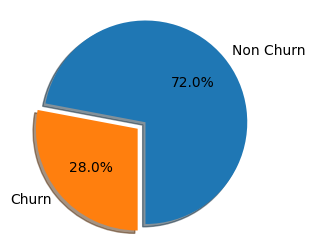

In [981]:
Retentiondf2 =df16[df16['MadeCallToRetentionTeam']=='No']
print ("Number of customers didn't communicate with retention team: {}".format(df16[df16['MadeCallToRetentionTeam']=='No'].shape[0]))
print("Number of customers lost without calls : {}".format(Retentiondf2[Retentiondf2['Churn']=='Yes'].shape[0]))
print("Number of customers not lost even without calls : {}".format(Retentiondf2[Retentiondf2['Churn']=='No'].shape[0]))

slices=[Retentiondf2[Retentiondf2['Churn']=='No'].shape[0],Retentiondf2[Retentiondf2['Churn']=='Yes'].shape[0]]
labels=['Non Churn','Churn']
explode=[0,0.1]
fig1, ax1 = plt.subplots(figsize=(3, 3))
ax1.pie(slices, explode=explode, labels=labels,autopct='%1.1f%%',shadow=True, startangle=270)
ax1.axis('equal')  
# Save the figure
save_path = rf"D:\Master Data Science\Graduation Project\EDA\CUSTOMERdidn;tCALLRETENTIONTEAM_distribution.png"
fig1.savefig(save_path, bbox_inches='tight', transparent=True) # يمنع الصورة تكون مقطوعة ويخليها كاملة

In [894]:
df16.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'HandsetRefurbished', 'TruckOwner',
       'RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'Cre

In [895]:
df16['ActiveRate'] = df16['ActiveSubs'] / np.where(df16['UniqueSubs'] == 0, 1, df16['UniqueSubs'])
df16['RetentionSuccessRatio'] = df16['RetentionOffersAccepted'] / np.where(df16['RetentionCalls'] == 0, 1, df16['RetentionCalls'])
df16['OutInRatio'] = df16['OutboundCalls'] / np.where(df16['InboundCalls'] == 0, 1, df16['InboundCalls'])
df16['RevenuePerMinute'] = df16['MonthlyRevenue'] / np.where(df16['MonthlyMinutes'] == 0, 1, df16['MonthlyMinutes'])
df16['RevenuePerOverage'] = df16['MonthlyRevenue'] / np.where(df16['OverageMinutes'] == 0, 1, df16['OverageMinutes'])


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\1881523054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['ActiveRate'] = df16['ActiveSubs'] / np.where(df16['UniqueSubs'] == 0, 1, df16['UniqueSubs'])
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\1881523054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['RetentionSuccessRatio'] = df16['RetentionOffersAccepted'] / np.where(df16['RetentionCalls'] == 0, 1, df16['RetentionCalls'])
C:\Users\nermeen.ashraf\AppData\Local\

In [896]:
df16['RetentionSuccessRatio'].describe()

count    47854.000000
mean         0.016308
std          0.125345
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: RetentionSuccessRatio, dtype: float64

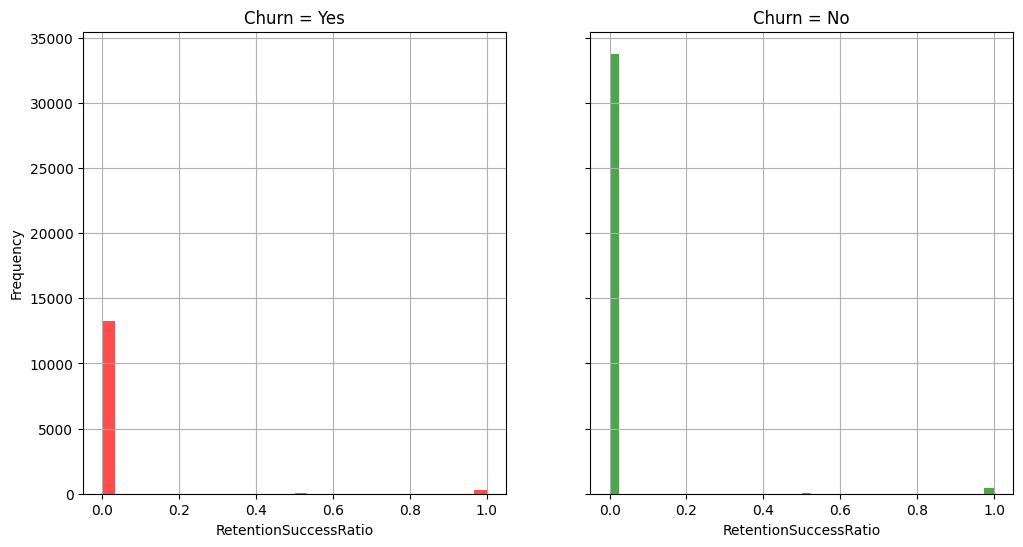

In [897]:
churn_yes = df16[df16['Churn'] == 'Yes']['RetentionSuccessRatio']
churn_no = df16[df16['Churn'] == 'No']['RetentionSuccessRatio']
fig, axes = plt.subplots (1,2,figsize=(12, 6),sharey=True)
axes[0].hist(churn_yes, bins=30, color='red', alpha=0.7)
axes[0].set_title('Churn = Yes')
axes[0].set_xlabel('RetentionSuccessRatio')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

axes[1].hist(churn_no, bins=40, color='green', alpha=0.7)
axes[1].set_title('Churn = No')
axes[1].set_xlabel('RetentionSuccessRatio')
axes[1].grid(True)

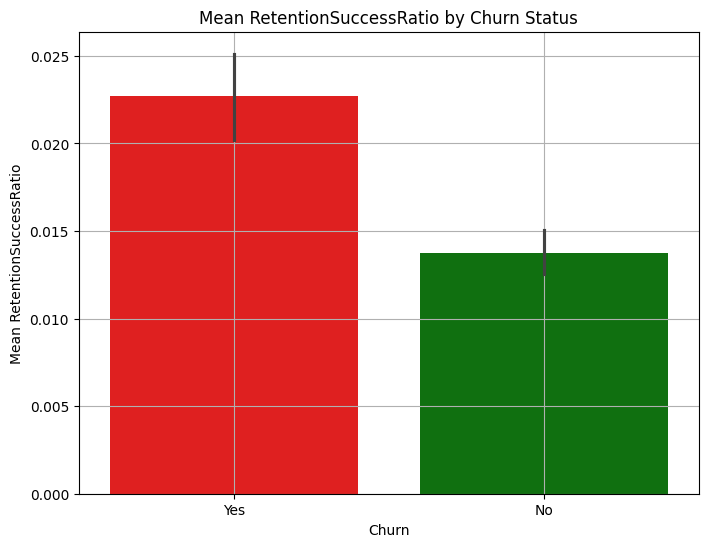

In [898]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(data=df16, x='Churn', y='RetentionSuccessRatio', hue='Churn', palette={'Yes': 'red', 'No': 'green'})

plt.title('Mean RetentionSuccessRatio by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Mean RetentionSuccessRatio')
plt.grid(True)
plt.show()


In [899]:
group_means = df16.groupby('Churn')['RetentionSuccessRatio'].mean()
group_means


Churn
No     0.013770
Yes    0.022702
Name: RetentionSuccessRatio, dtype: float64

### 4- Average minutes used by the customer per month
(Monthly Minutes + Overage Minutes)/ Monthes service 

In [901]:
df16.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'HandsetRefurbished', 'TruckOwner',
       'RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'Cre

In [902]:
df16

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  Inbound vs Outbound Ratio  CallFailureRatio  \
0                   -19.0  ...                   0.000000          0.008537   
1                     0.0  ...                   0.000000          0.050000   
2                     0.0  ...                   0.000000          0.000000   
3                     8.1  ...                   0.396975          0.060507   
4                    -0.2  ...                   0.000000          0.000000   
...                   ...  ...                        ...               ...   
51037               -13.2  ...                   0.000000          0.022801   
51039                 0.0  ...                   0.000000          0.054734   
51040                -2.0  ...                   0.011673          0.052057   
51041                 0.0  ...                   0.000000          0.026042   
51043                15.9  ...                   0.371237          0.029453   

       CallProblemRatio  ratio_bin  ratio_bin_custom  ActiveRate  \
0              0.017073      0- <1              Zero         0.5   
1              0.050000      0- <1              Zero         1.0   
2              0.000000      0- <1              Zero         1.0   
3              0.069467      0- <1   Between 0 and 1         1.0   
4              0.000000      0- <1              Zero         1.0   
...                 ...        ...               ...         ...   
51037          0.022801      0- <1              Zero         1.0   
51039          0.059172      0- <1              Zero         1.0   
51040          0.055697      0- <1   Between 0 and 1         1.0   
51041          0.032552      0- <1              Zero         1.0   
51043          0.030688      0- <1   Between 0 and 1         1.0   

       RetentionSuccessRatio  OutInRatio  RevenuePerMinute  RevenuePerOverage  
0                        0.0    0.000000          0.109589          24.000000  
1                        0.0    0.000000          1.699000          16.990000  
2                        0.0    0.300000          4.750

In [903]:
df16['AllMinutesPermonth'] = (df16['MonthlyMinutes']+df16['OverageMinutes'])/df16['MonthsInService']

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\4214920285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['AllMinutesPermonth'] = (df16['MonthlyMinutes']+df16['OverageMinutes'])/df16['MonthsInService']


In [904]:
df16['AllMinutesPermonth'].mean()

41.01895696717978

In [905]:
group_means2 = df16.groupby('Churn')['AllMinutesPermonth'].mean()
group_means2

Churn
No     42.582770
Yes    37.080217
Name: AllMinutesPermonth, dtype: float64

In [906]:
df16['AllMinutesPermonth'].describe()

count    47854.000000
mean        41.018957
std         52.734546
min          0.000000
25%          8.777778
50%         23.062500
75%         52.307692
max       1002.000000
Name: AllMinutesPermonth, dtype: float64

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\1637811823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df16, x='Churn', y='AllMinutesPermonth', palette={'Yes': 'red', 'No': 'green'})


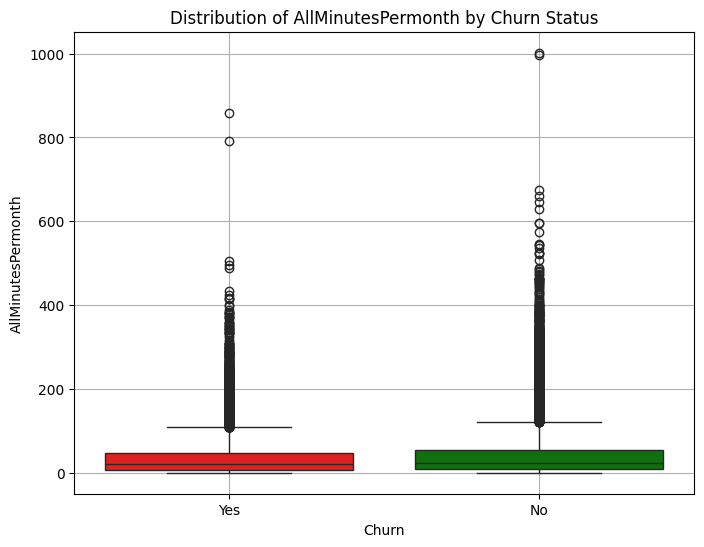

In [907]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df16, x='Churn', y='AllMinutesPermonth', palette={'Yes': 'red', 'No': 'green'})
plt.title('Distribution of AllMinutesPermonth by Churn Status')
plt.xlabel('Churn')
plt.ylabel('AllMinutesPermonth')
plt.grid(True)
plt.show()

# Handling Outliers

### Steps for Outlier Detection and Treatment

1. **Plot a Histogram:**  
   To observe the shape of the variable distribution and check whether it is approximately normal or skewed.

2. **Choose the Detection Method Based on Distribution Shape:**  
   - If the distribution is **skewed** → use the **IQR (Interquartile Range)** method.  
   - If the distribution is **normal** → use the **Z-Score (Standardization)** method.

3. **Count the Number of Outliers:**  
   - Number of observations **above the upper bound**.  
   - Number of observations **below the lower bound**.

4. **Use IQR to Identify Extreme Outliers:**  
   - Observations above `Q3 + 3 * IQR`.  
   - Observations below `5. **Count the Number of Extreme Outliers:**  
   - Count how many values are **above the extreme upper bound**.  
   - Count how many values are **below the extreme lower bound**.

6. **Decide on Outlier Treatment:**  
   - **Remove** the outliers.  
   - **Replace** them with the mean, median, or another imputation method.  
   - **Keep as is** if the outliers are valid or meaningful for the context.w many values are


#### Two important function:
- `OutlierHist(df, col)`  
- `LowerUpperWisker(df, col, value)`  


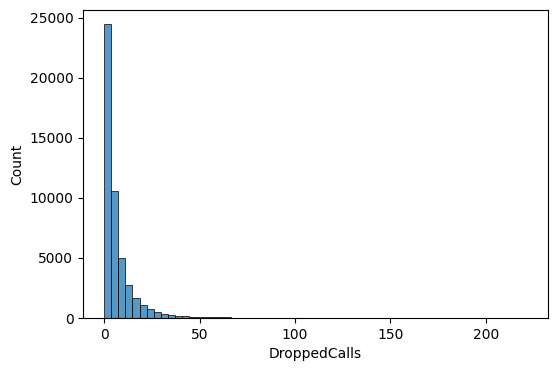

In [910]:
def OutlierHist (df,col):
    plt.figure(figsize =(6,4))
    sns.histplot(df[col],bins =60)
    save_path = rf"D:\Master Data Science\Graduation Project\Outliers\{col}_outliers.png"
    plt.savefig(save_path, bbox_inches='tight')  
OutlierHist (df16,'DroppedCalls')

**Dropped Calls' dist is right skewed, outliers close to 50**

In [912]:
def LowerUpperWisker (df, col, value):
    IQRDrop = df[col].quantile(0.75) - df[col].quantile(0.25)
    lowerDrop = df[col].quantile(0.25)-(IQRDrop*value)
    upperDrop = df[col].quantile(0.75)+(IQRDrop*value)
    print (lowerDrop) , print( upperDrop), print (df[col].mean())
    
    lower_outliersDrop = (df[col] < lowerDrop).sum()
    upper_outliersDrop = (df[col] > upperDrop).sum()
    
    print(f"Number of values below lower bound: {lower_outliersDrop}")
    print(f"Number of values above upper bound: {upper_outliersDrop}") 
LowerUpperWisker (df16, 'DroppedCalls', 1.5)

-9.5
18.5
6.367678772934341
Number of values below lower bound: 0
Number of values above upper bound: 3565


-5.250000000000001
9.55
4.30245538512977
Number of values below lower bound: 0
Number of values above upper bound: 5276


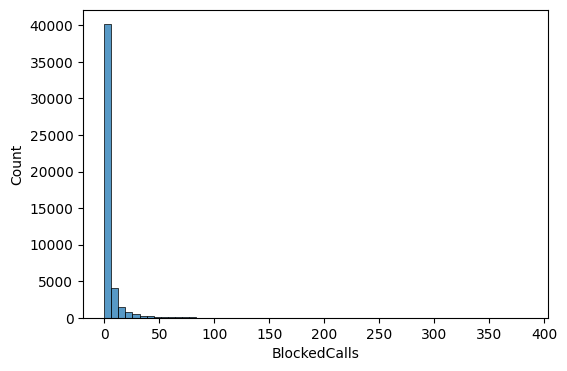

In [913]:
OutlierHist(df16,'BlockedCalls')
LowerUpperWisker(df16,'BlockedCalls',1.5)

-211.46249999999998
388.4375
121.88257616918128
Number of values below lower bound: 0
Number of values above upper bound: 3310


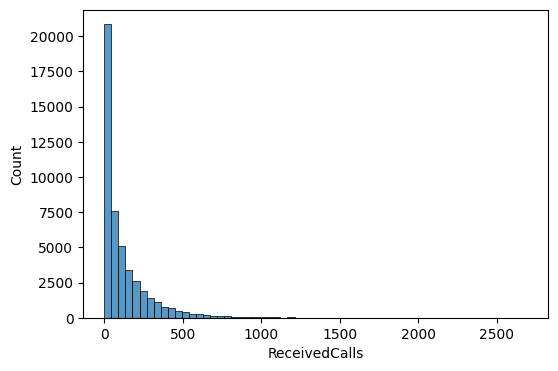

In [914]:
OutlierHist(df16,'ReceivedCalls')
LowerUpperWisker(df16,'ReceivedCalls',1.5)

-3.0
5.0
1.9750511973920677
Number of values below lower bound: 0
Number of values above upper bound: 5473


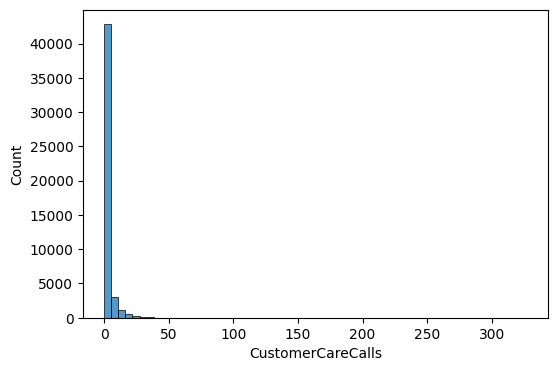

In [915]:
OutlierHist(df16,'CustomerCareCalls')
LowerUpperWisker(df16,'CustomerCareCalls',1.5)

**Right skewed with outliers around 15 or 20 calls and extreme outliers around 25 and above**

-104.80000000000001
212.8
71.79943160446358
Number of values below lower bound: 0
Number of values above upper bound: 3340


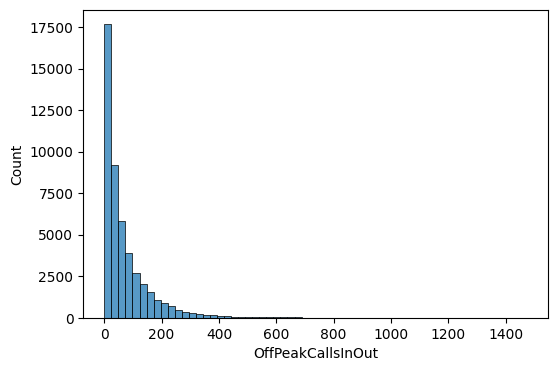

In [917]:
OutlierHist(df16,'OffPeakCallsInOut')
LowerUpperWisker(df16,'OffPeakCallsInOut',1.5)

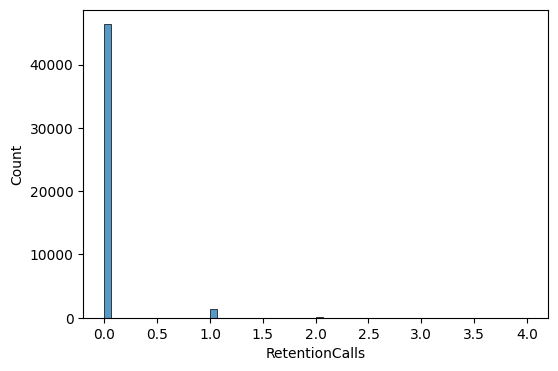

In [918]:
OutlierHist(df16,'RetentionCalls')


In [919]:
df16.groupby('Churn')['RetentionCalls'].value_counts(normalize =True)

Churn  RetentionCalls
No     0                 0.974572
       1                 0.023413
       2                 0.001810
       3                 0.000204
Yes    0                 0.952647
       1                 0.043676
       2                 0.003235
       3                 0.000368
       4                 0.000074
Name: proportion, dtype: float64

In [920]:

df16.groupby('Churn')['MadeCallToRetentionTeam'].value_counts(normalize =True)

Churn  MadeCallToRetentionTeam
No     No                         0.974572
       Yes                        0.025428
Yes    No                         0.952647
       Yes                        0.047353
Name: proportion, dtype: float64

**right skewed with outliers close to 200 & 400 and extreme values close to 600 and above**

In [922]:
df16.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'HandsetRefurbished', 'TruckOwner',
       'RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'Cre

In [923]:
columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls','PercChangeMinutes','PercChangeRevenues',
           'DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut',
           'CallForwardingCalls','CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays','HandsetRefurbished','RetentionCalls',
           'ReferralsMadeBySubscriber','RetentionOffersAccepted']
for col in columns:
    LowerUpperWisker(df16,col,1.5)

-22.799999999999983
128.23999999999998
59.18483219793539
Number of values below lower bound: 0
Number of values above upper bound: 2807
-15.0
105.0
47.10590546244828
Number of values below lower bound: 0
Number of values above upper bound: 787
-1.4849999999999999
2.4749999999999996
0.9051995653445898
Number of values below lower bound: 0
Number of values above upper bound: 5278
-61.5
102.5
40.55251389643499
Number of values below lower bound: 0
Number of values above upper bound: 5577
-0.30000000000000004
0.5
1.085087975926777
Number of values below lower bound: 0
Number of values above upper bound: 9286
-309.0
291.0
-11.992853262005266
Number of values below lower bound: 3299
Number of values above upper bound: 3161
-20.15
14.649999999999999
-1.2794792493835416
Number of values below lower bound: 6485
Number of values above upper bound: 6061
-9.5
18.5
6.367678772934341
Number of values below lower bound: 0
Number of values above upper bound: 3565
-5.250000000000001
9.55
4.302455385129

In [924]:
def LowerUpperWisker2(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - factor * IQR
    upper_whisker = Q3 + factor * IQR
    lower_outliers = df[df[col] < lower_whisker][col]
    upper_outliers = df[df[col] > upper_whisker][col]

    # Count or return actual values
    lower_outliersDrop = len(lower_outliers)
    upper_outliersDrop = len(upper_outliers)

    return lower_whisker, upper_whisker,lower_outliersDrop,upper_outliersDrop


In [925]:
df16.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'HandsetRefurbished', 'TruckOwner',
       'RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'Cre

In [926]:
results = []

columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
           'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
           'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
           'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
           'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted', 'MonthlyMinutes']

for col in columns:
    lower, upper, lower_outliersDrop, upper_outliersDrop = LowerUpperWisker2(df16, col, 1.5)
    results.append({
        'Column': col,
        'LowerWhisker': lower,
        'UpperWhisker': upper,
        'LowerOutliersCount': lower_outliersDrop,
        'UpperOutliersCount': upper_outliersDrop
    })

# Create DataFrame
whisker_df = pd.DataFrame(results)
print(whisker_df)


                       Column  LowerWhisker  UpperWhisker  LowerOutliersCount  \
0              MonthlyRevenue      -22.8000      128.2400                   0   
1        TotalRecurringCharge      -15.0000      105.0000                   0   
2       DirectorAssistedCalls       -1.4850        2.4750                   0   
3              OverageMinutes      -61.5000      102.5000                   0   
4                RoamingCalls       -0.3000        0.5000                   0   
5           PercChangeMinutes     -309.0000      291.0000                3299   
6          PercChangeRevenues      -20.1500       14.6500                6485   
7                DroppedCalls       -9.5000       18.5000                   0   
8                BlockedCalls       -5.2500        9.5500                   0   
9           CustomerCareCalls       -3.0000        5.0000                   0   
10              ThreewayCalls       -0.4500        0.7500                   0   
11              ReceivedCall

In [927]:
results2 = []

columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
           'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
           'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
           'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
           'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted', 'MonthlyMinutes']

for col in columns:
    lower2, upper2, lower_outliersDrop2, upper_outliersDrop2 = LowerUpperWisker2(df16, col, 3)
    results2.append({
        'Column': col,
        'LowerWhisker': lower2,
        'UpperWhisker': upper2,
        'LowerOutliersCount': lower_outliersDrop2,
        'UpperOutliersCount': upper_outliersDrop2
    })

# Create DataFrame
whisker_df2 = pd.DataFrame(results2)
print(whisker_df2)


                       Column  LowerWhisker  UpperWhisker  LowerOutliersCount  \
0              MonthlyRevenue       -79.440        184.88                   0   
1        TotalRecurringCharge       -60.000        150.00                   0   
2       DirectorAssistedCalls        -2.970          3.96                   0   
3              OverageMinutes      -123.000        164.00                   0   
4                RoamingCalls        -0.600          0.80                   0   
5           PercChangeMinutes      -534.000        516.00                1363   
6          PercChangeRevenues       -33.200         27.70                4029   
7                DroppedCalls       -20.000         29.00                   0   
8                BlockedCalls       -10.800         15.10                   0   
9           CustomerCareCalls        -6.000          8.00                   0   
10              ThreewayCalls        -0.900          1.20                   0   
11              ReceivedCall

In [928]:
df16.drop(columns=['HandsetRefurbished'], inplace =True)

C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\3315427454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16.drop(columns=['HandsetRefurbished'], inplace =True)


In [929]:
df16

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51037     3399906    No           31.92            63.0                  17.0   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51043     3399974    No           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51037                   0.00            43.0           0.0              -38.0   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51043                   0.99            45.0           4.7              122.0   

       PercChangeRevenues  ...  CallFailureRatio  CallProblemRatio  ratio_bin  \
0                   -19.0  ...          0.008537          0.017073      0- <1   
1                     0.0  ...          0.050000          0.050000      0- <1   
2                     0.0  ...          0.000000          0.000000      0- <1   
3                     8.1  ...          0.060507          0.069467      0- <1   
4                    -0.2  ...          0.000000          0.000000      0- <1   
...                   ...  ...               ...               ...        ...   
51037               -13.2  ...          0.022801          0.022801      0- <1   
51039                 0.0  ...          0.054734          0.059172      0- <1   
51040                -2.0  ...          0.052057          0.055697      0- <1   
51041                 0.0  ...          0.026042          0.032552      0- <1   
51043                15.9  ...          0.029453          0.030688      0- <1   

       ratio_bin_custom  ActiveRate  RetentionSuccessRatio  OutInRatio  \
0                  Zero         0.5                    0.0    0.000000   
1                  Zero         1.0                    0.0    0.000000   
2                  Zero         1.0                    0.0    0.300000   
3       Between 0 and 1         1.0                    0.0    2.519048   
4                  Zero         1.0                    0.0    0.000000   
...                 ...         ...                    ...         ...   
51037              Zero         1.0                    0.0    0.000000   
51039              Zero         1.0                    0.0    6.700000   
51040   Between 0 and 1         1.0                    0.0   85.666667   
51041              Zero         1.0                    0.0    1.300000   
51043   Between 0 and 1         1.0                    0.0    2.693694   

       RevenuePerMinute  RevenuePerOverage  AllMinutesPermonth  
0              0.109589          24.000000            3.590164  
1              1.699000          16.990000            0.172414  
2   

### Winsorization 
-`Winsorization is a data transformation technique used to limit extreme values (outliers) in a dataset. Instead of removing outliers, Winsorization replaces them with the nearest value within a specified percentile range`

In [931]:
df17_replaceOut = df16.copy()
columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
           'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
           'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
           'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
           'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted']

for col in columns:
    lower, upper, lower_outliersDrop, upper_outliersDrop = LowerUpperWisker2(df16, col, 1.5)
    df17_replaceOut[col] = df16[col].clip(lower=lower, upper=upper)
print (len(df16),len(df17_replaceOut))

47854 47854


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\942233425.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize =(6,4))


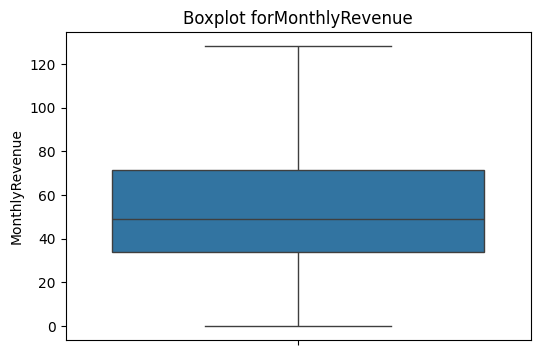

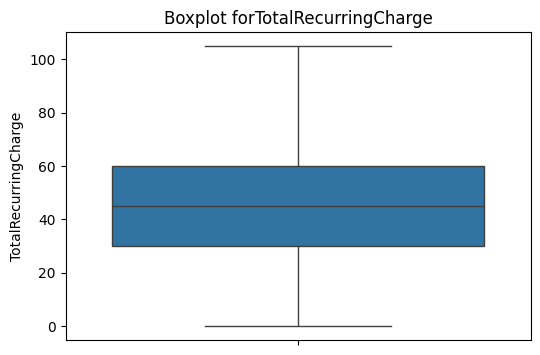

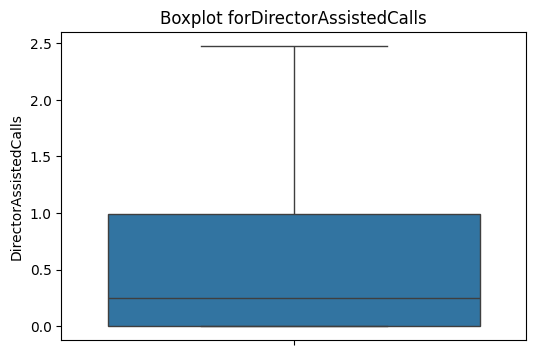

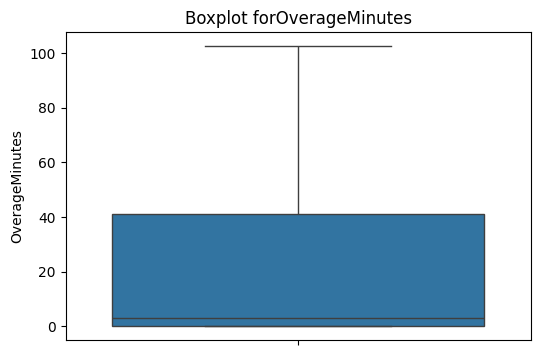

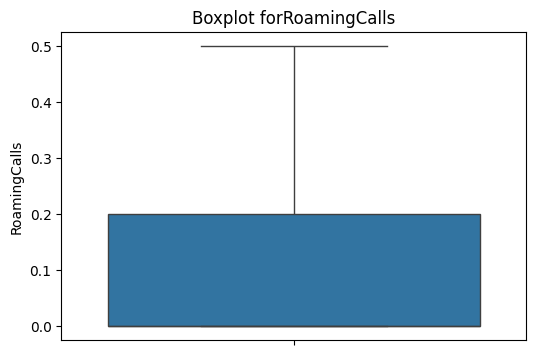

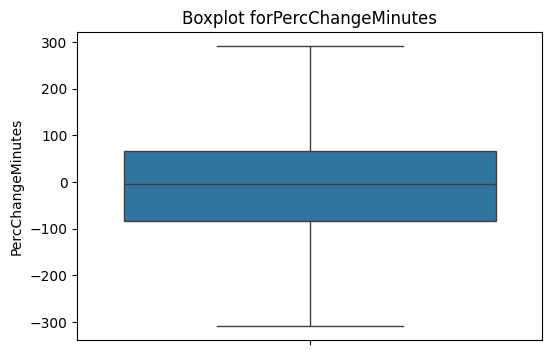

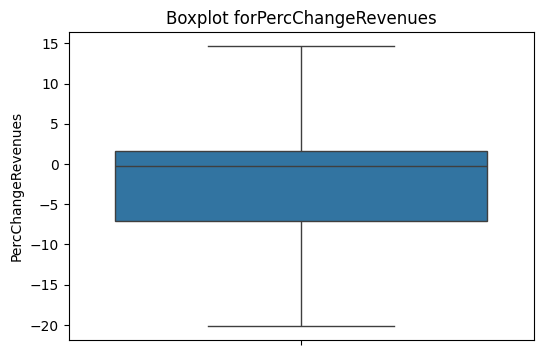

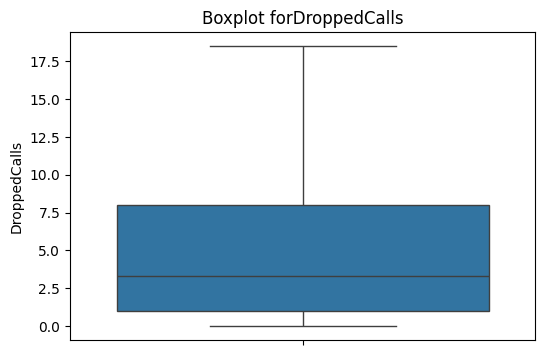

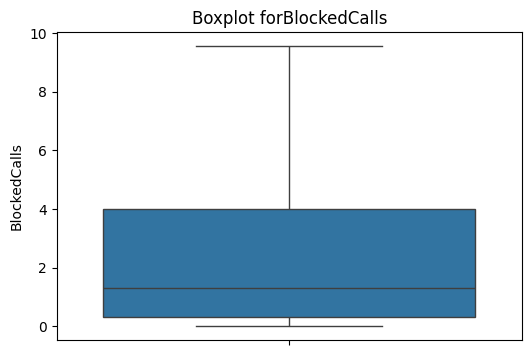

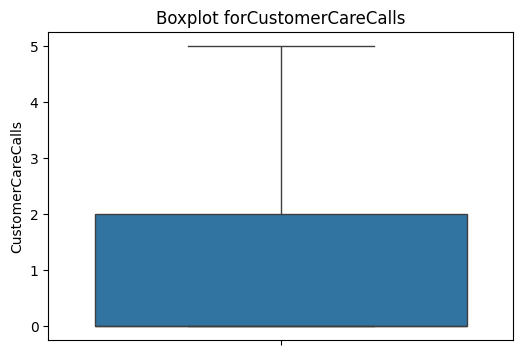

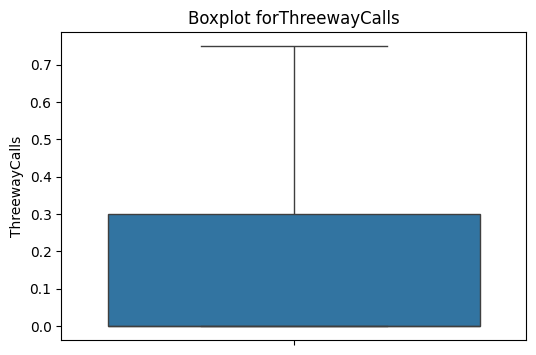

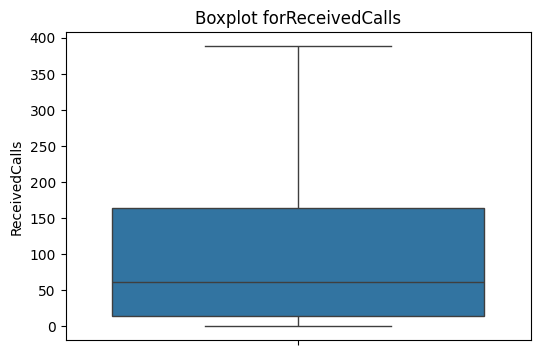

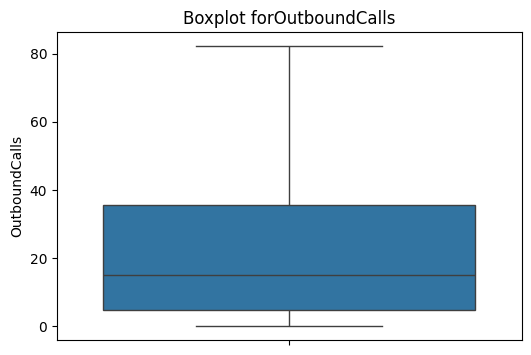

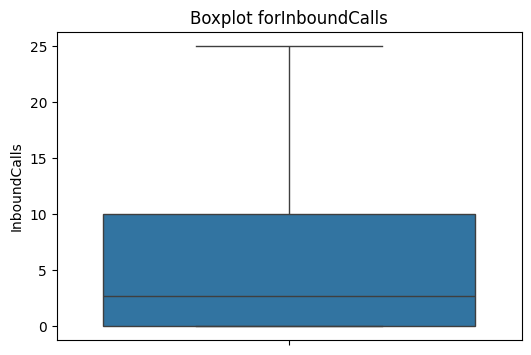

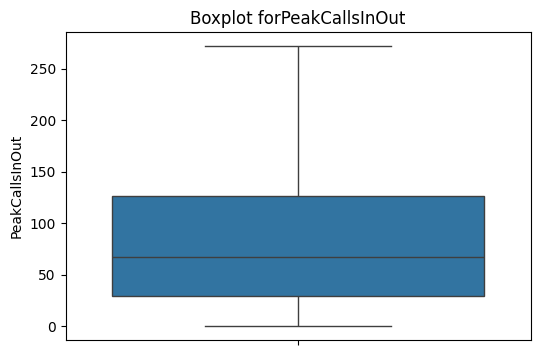

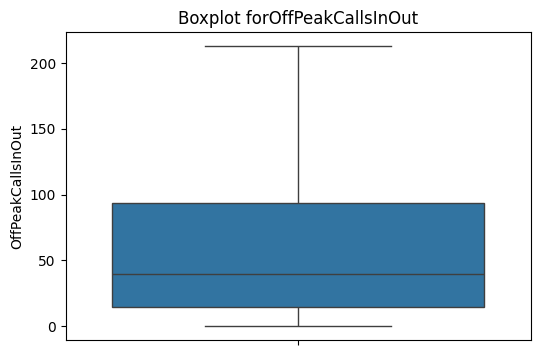

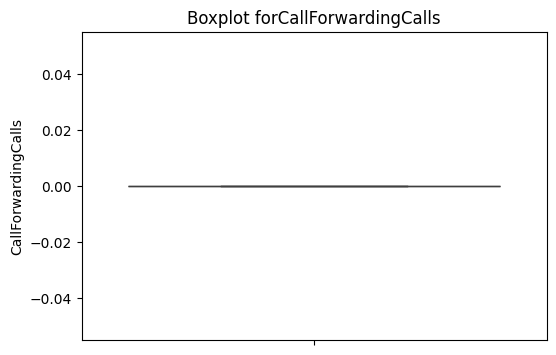

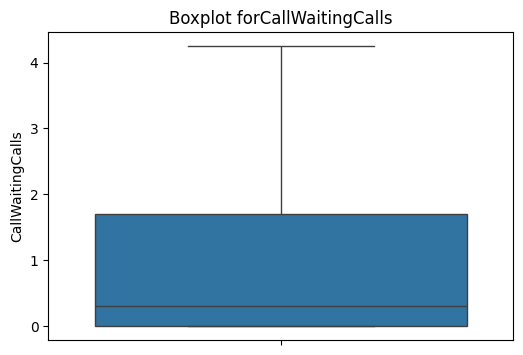

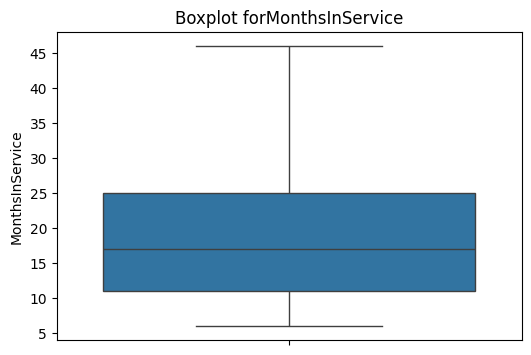

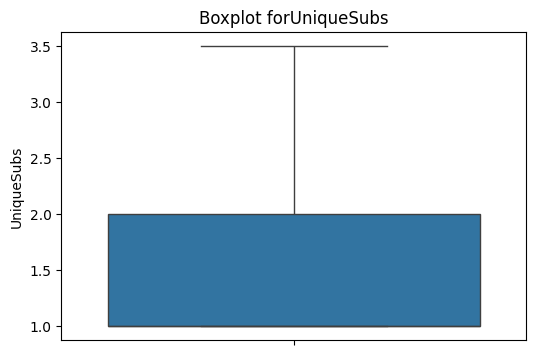

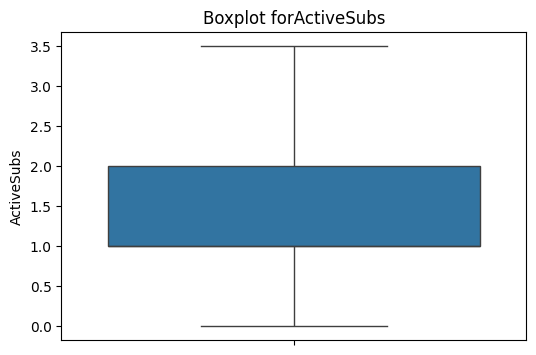

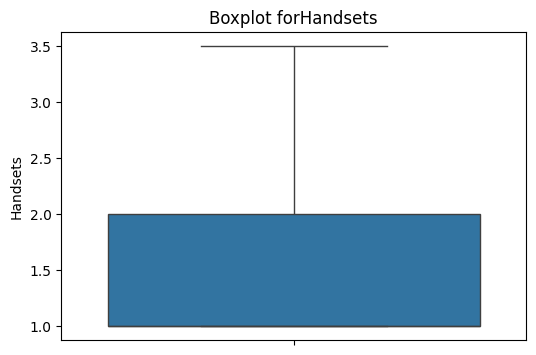

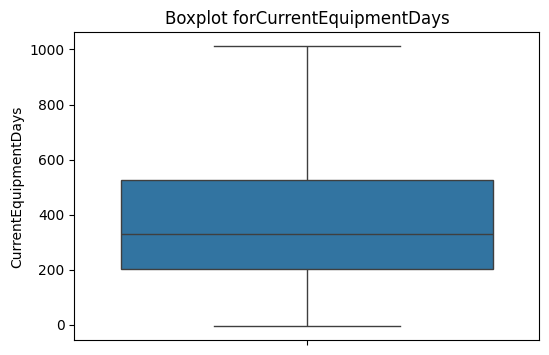

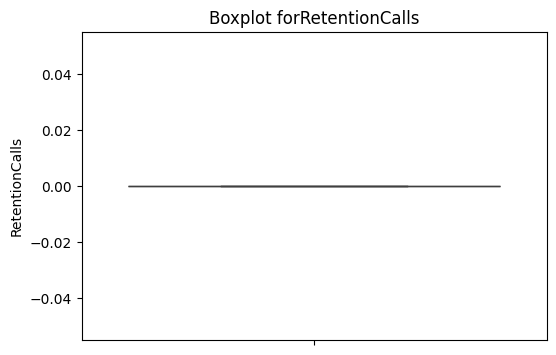

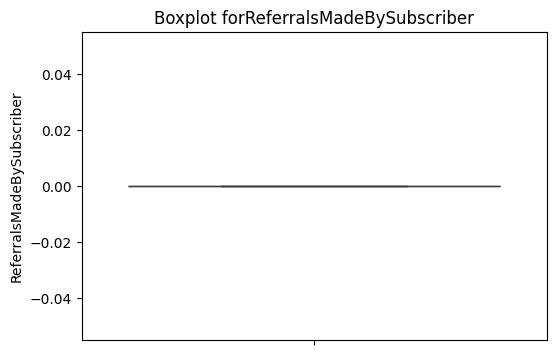

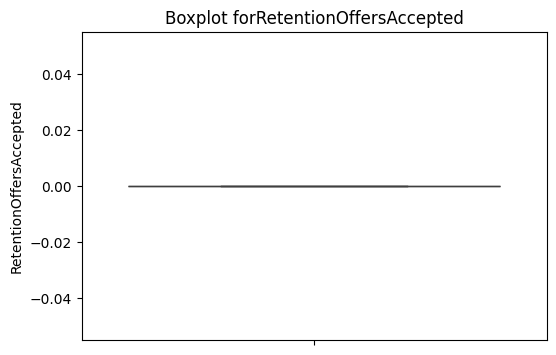

In [932]:
columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
           'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
           'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
           'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
           'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted']
for col in columns:
    plt.figure(figsize =(6,4))
    sns.boxplot(df17_replaceOut[col])
    plt.title(f'Boxplot for{col}')


In [933]:
f18_replaceEx = df16.copy()
columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
           'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
           'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
           'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
           'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted']

for col in columns:
    lower, upper, lower_outliersDrop, upper_outliersDrop = LowerUpperWisker2(df16, col, 3)
    f18_replaceEx[col] = df16[col].clip(lower=lower, upper=upper)
print (len(df16),len(f18_replaceEx))

47854 47854


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\1832225749.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize =(6,4))


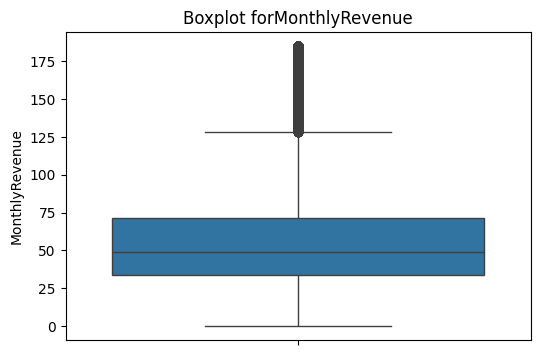

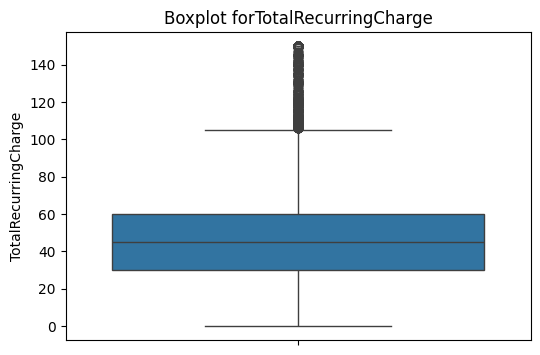

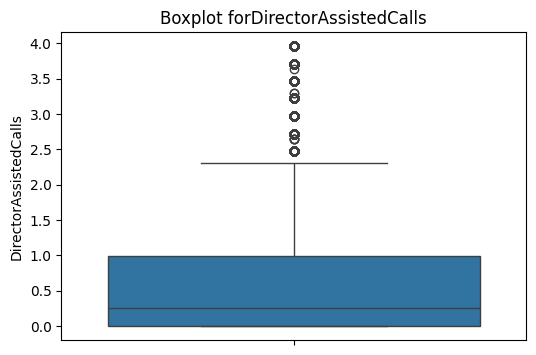

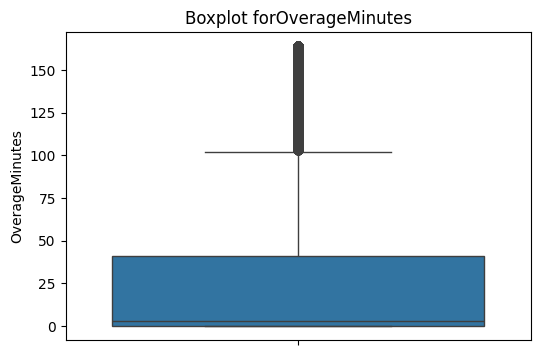

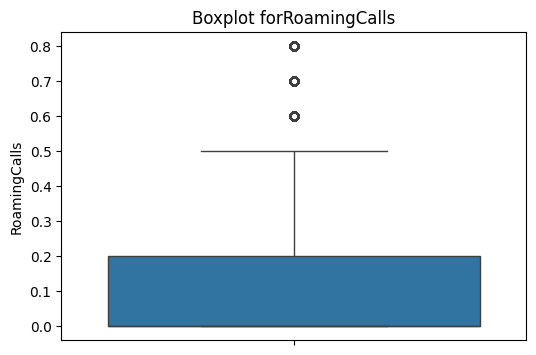

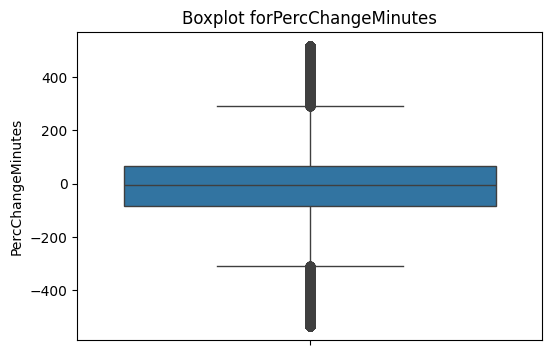

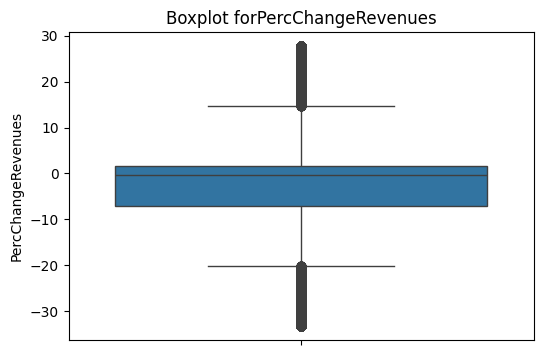

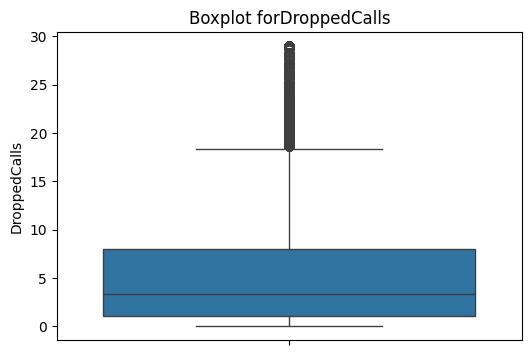

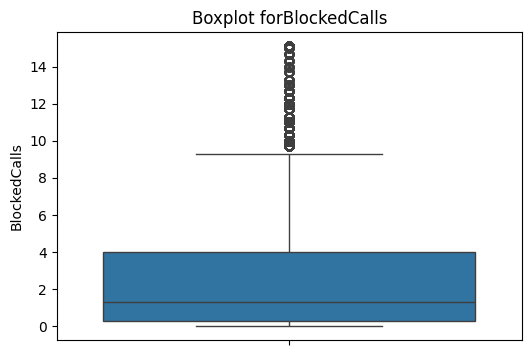

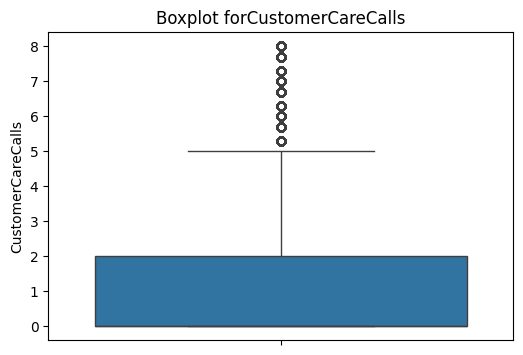

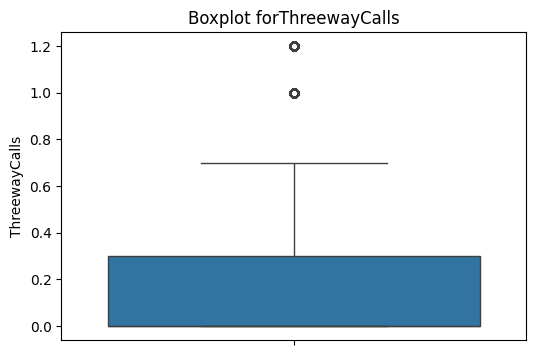

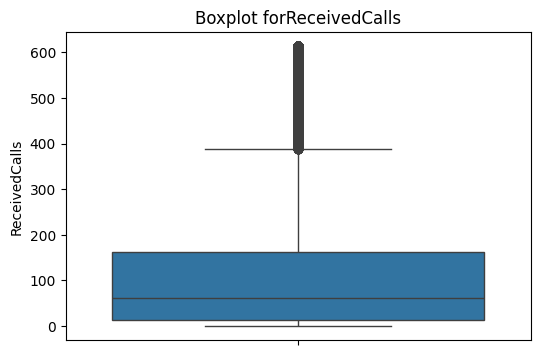

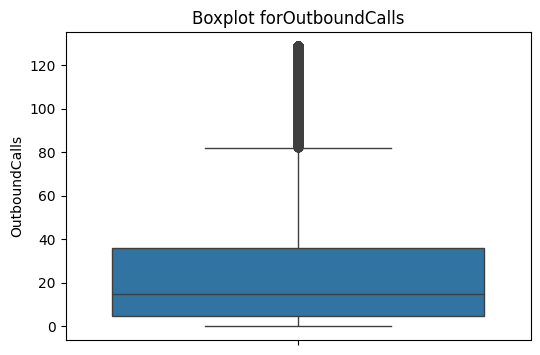

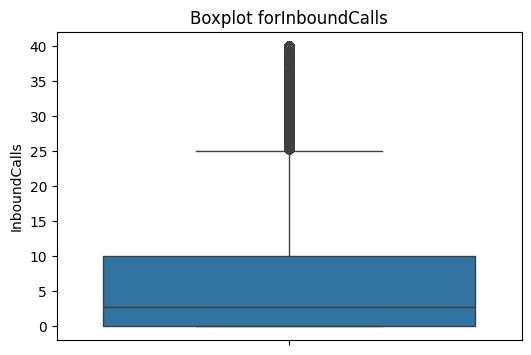

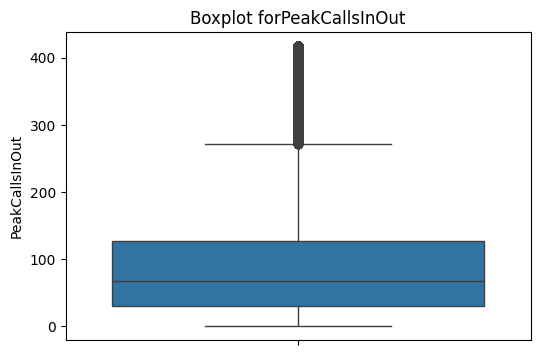

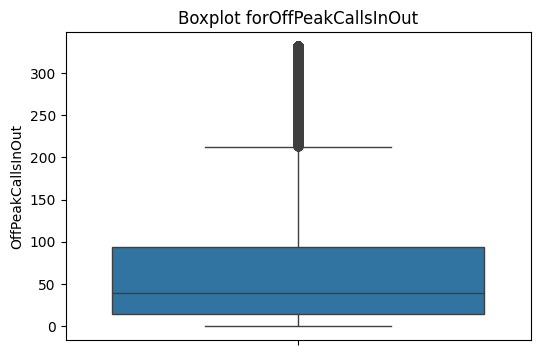

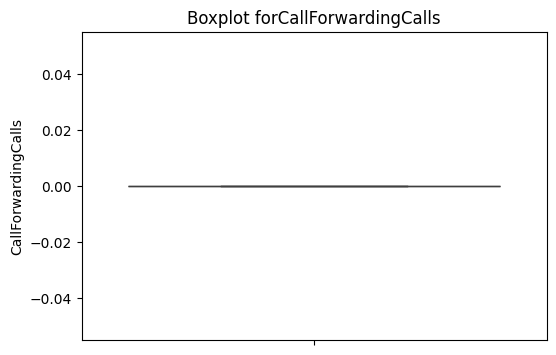

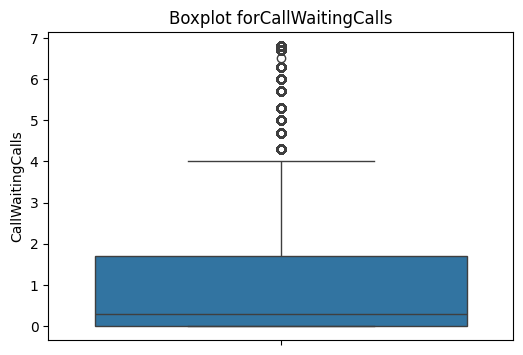

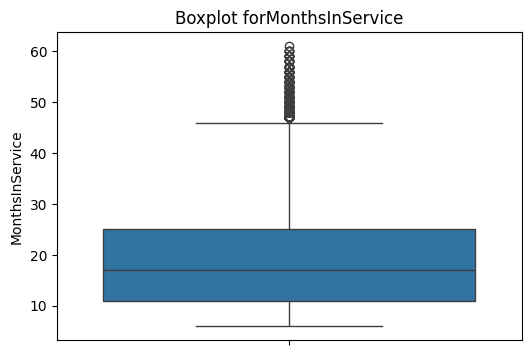

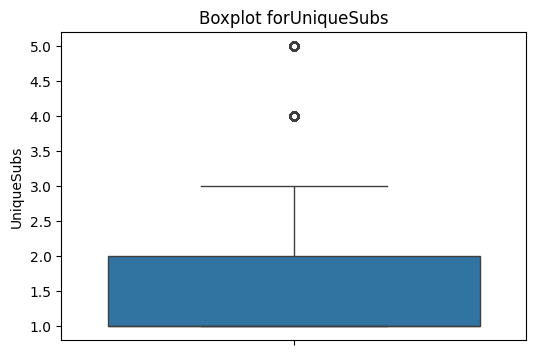

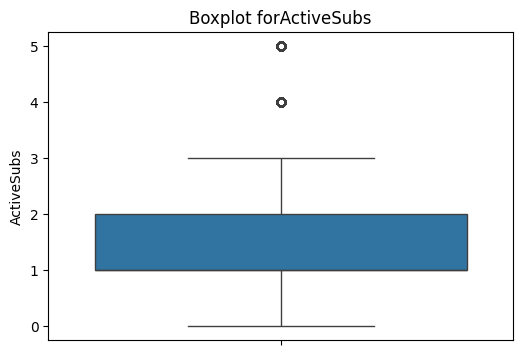

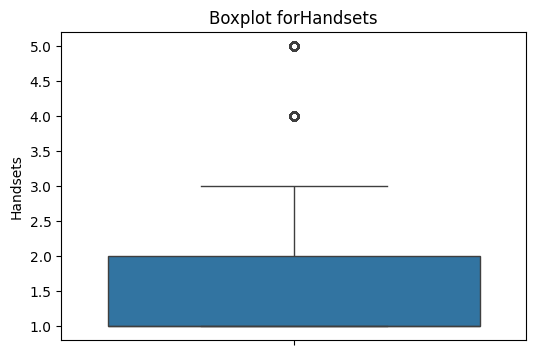

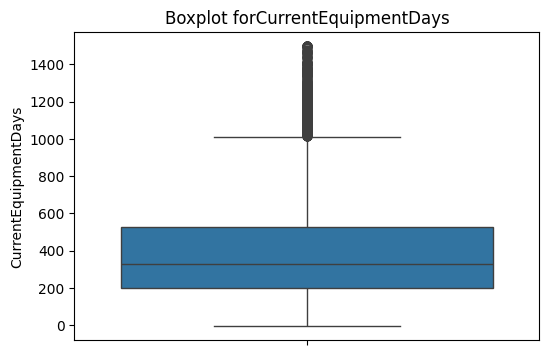

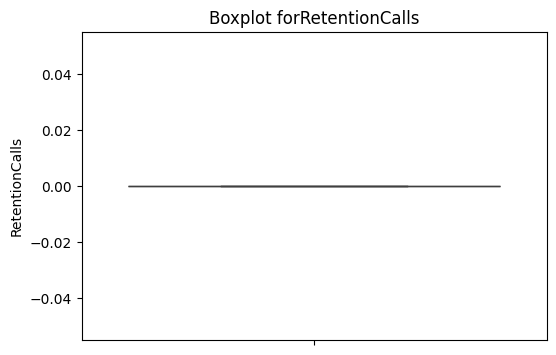

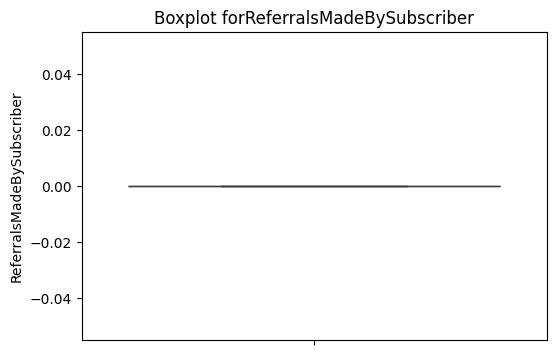

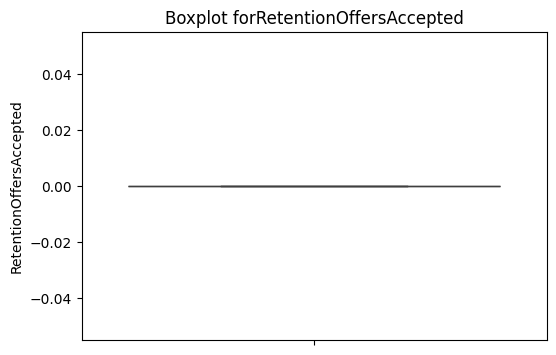

In [934]:
columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
           'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
           'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
           'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
           'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted']
for col in columns:
    plt.figure(figsize =(6,4))
    sns.boxplot(f18_replaceEx[col])
    plt.title(f'Boxplot for{col}')


## Deleting Outliers 

In [936]:
def remove_outliers(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return filtered_df


In [937]:
import pandas as pd

# دالة لحساب القيم المتطرفة باستخدام IQR
def get_outlier_mask(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return (df[col] < lower) | (df[col] > upper)


In [938]:
columns = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
    'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
    'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
    'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
    'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted'
]

combined_mask = pd.Series(False, index=df16.index)
for col in columns:
    combined_mask |= get_outlier_mask(df16, col, factor=1.5)

df16_removed = df16[~combined_mask].copy()

# نعرض الفرق
print(f"عدد الصفوف قبل الحذف: {len(df16)}")
print(f"عدد الصفوف بعد الحذف: {len(df16_removed)}")


عدد الصفوف قبل الحذف: 47854
عدد الصفوف بعد الحذف: 16428


In [939]:
columns = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
    'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
    'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
    'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
    'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted'
]

combined_mask = pd.Series(False, index=df16.index)
for col in columns:
    combined_mask |= get_outlier_mask(df16, col, factor=3)

df16_removedEx = df16[~combined_mask].copy()

# نعرض الفرق
print(f"عدد الصفوف قبل الحذف: {len(df16)}")
print(f"عدد الصفوف بعد الحذف: {len(df16_removedEx)}")


عدد الصفوف قبل الحذف: 47854
عدد الصفوف بعد الحذف: 24815


# Outlier Handling Scenarios

| No. | Description                                                   | Dataset Name (DataFrame) |
|------|--------------------------------------------------------------|--------------------------|
| 1    | Replace **extreme outliers** with 25th and 75th percentile   | `f18_replaceEx`          |
| 2    | Replace **all outliers** with  25th and 75th percentile      | `df17_replaceOut`        |
| 3    | Remove rows containing **any outliers** (upper or lower)     | `df16_removed`           |
| 4    | Remove rows containing **extreme outliers** only             | `df16_removedEx`         |
| 5    | Keep the original data unchanged                             | `df16`                   |

---
### Notes:
- The columns used for outlier detection and treatment are:

```python
columns = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
    'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
    'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
    'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
    'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted'
]



def plot_box_hist(data, version_name, columns):
    for col in columns:
        plt.figure(figsize=(14,6))
        plt.subplot(1,2,1)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col} - {version_name}')
        plt.subplot(1,2,2)
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f'Histogram of {col} - {version_name}')
        plt.tight_layout()
        plt.show()

# الأعمدة التي نرسم لها الرسومات
cols = [
    'MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
    'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
    'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','CallForwardingCalls',
    'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays',
    'RetentionCalls','ReferralsMadeBySubscriber','RetentionOffersAccepted'
]

# مثال على كيف تستخدم الدالة لكل نسخة:
plot_box_hist(f18_replaceEx, "Version 1 - Extreme Outliers replaced with 75th pct", cols)
plot_box_hist(df17_replaceOut, "Version 2 - All Outliers replaced with 75th pct", cols)
plot_box_hist(df16_removed, "Version 3 - Outliers Removed", cols)
plot_box_hist(df16_removedEx, "Version 4 - Extreme Outliers Removed", cols)
plot_box_hist(df16, "Version 5 - Original Data", cols)


# Feature Engeneering again after handling outliers

In [943]:
df16.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'TruckOwner', 'RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'CreditCat', 'AverageCalls

***cols =['peakCallsfromTotal', 'Inbound vs Outbound Ratio', 'CallFailureRatio', 'CallProblemRatio','ActiveRate', 'RetentionSuccessRatio',
       'OutInRatio', 'RevenuePerMinute', 'RevenuePerOverage','AllMinutesPermonth', 'AverageCallsPerMonth', 'CustomerCareCallsPerMonth']
denominator = df16['PeakCallsInOut'] + df16['OffPeakCallsInOut']***
- `df16['peakCallsfromTotal']` = df16['PeakCallsInOut'] / denominator.replace(0, 1)
- `df16['Inbound vs Outbound Ratio']` = df16['InboundCalls'] / df16['OutboundCalls'].replace(0, 1)
- `df16['CallFailureRatio'] `= df16['DroppedCalls'] / denominator
- `df16['CallProblemRatio']` = (df16['DroppedCalls'] + df16['BlockedCalls']) / denominator.replace(0, 1)
- `df16['ActiveRate']` = df16['ActiveSubs'] / np.where(df16['UniqueSubs'] == 0, 1, df16['UniqueSubs'])
- `df16['RetentionSuccessRatio']` = df16['RetentionOffersAccepted'] / np.where(df16['RetentionCalls'] == 0, 1, df16['RetentionCalls'])
- `df16['RevenuePerMinute']` = df16['MonthlyRevenue'] / np.where(df16['MonthlyMinutes'] == 0, 1, df16['MonthlyMinutes'])
- `df16['RevenuePerOverage']` = df16['MonthlyRevenue'] / np.where(df16['OverageMinutes'] == 0, 1, df16['OverageMinutes'])
- `df16['AllMinutesPermonth']` = (df16['MonthlyMinutes']+df16['OverageMinutes'])/df16['MonthsInService']
- `df16['AverageCallsPerMonth']` = (df16['PeakCallsInOut'] + df16['OffPeakCallsInOut']) / df16['MonthsInService']
- `df16['CustomerCareCallsPerMonth']` = df16['CustomerCareCalls'] / df16['MonthsInService']
- `df16['OutInRatio']` = df12['OutboundCalls'] / np.where(df12['InboundCalls'] == 0, 1, df16['InboundCalls'])



In [945]:
cols = [
    'peakCallsfromTotal', 'Inbound vs Outbound Ratio', 'CallFailureRatio', 'CallProblemRatio',
    'ActiveRate', 'RetentionSuccessRatio', 'OutInRatio', 'RevenuePerMinute', 'RevenuePerOverage',
    'AllMinutesPermonth', 'AverageCallsPerMonth', 'CustomerCareCallsPerMonth'
]
datasets = [
    ('f18_replaceEx', f18_replaceEx),
    ('df17_replaceOut', df17_replaceOut),
    ('df16_removed', df16_removed),
    ('df16_removedEx', df16_removedEx),
    ('df16', df16)
]

for name, df in datasets:
    print(f"Recreating: {name}")
    
    for col in cols:
        if col in df.columns:
            df.drop(columns=col, inplace=True)

    denominator = df['PeakCallsInOut'] + df['OffPeakCallsInOut']
    df['peakCallsfromTotal'] = df['PeakCallsInOut'] / denominator.replace(0, 1)
    df['Inbound vs Outbound Ratio'] = df['InboundCalls'] / df['OutboundCalls'].replace(0, 1)
    df['CallFailureRatio'] = df['DroppedCalls'] / denominator.replace(0, 1)
    df['CallProblemRatio'] = (df['DroppedCalls'] + df['BlockedCalls']) / denominator.replace(0, 1)
    df['ActiveRate'] = df['ActiveSubs'] / np.where(df['UniqueSubs'] == 0, 1, df['UniqueSubs'])
    df['RetentionSuccessRatio'] = df['RetentionOffersAccepted'] / np.where(df['RetentionCalls'] == 0, 1, df['RetentionCalls'])
    df['RevenuePerMinute'] = df['MonthlyRevenue'] / np.where(df['MonthlyMinutes'] == 0, 1, df['MonthlyMinutes'])
    df['RevenuePerOverage'] = df['MonthlyRevenue'] / np.where(df['OverageMinutes'] == 0, 1, df['OverageMinutes'])
    df['AllMinutesPermonth'] = (df['MonthlyMinutes'] + df['OverageMinutes']) / np.where(df['MonthsInService'] == 0, 1, df['MonthsInService'])
    df['AverageCallsPerMonth'] = (df['PeakCallsInOut'] + df['OffPeakCallsInOut']) / np.where(df['MonthsInService'] == 0, 1, df['MonthsInService'])
    df['CustomerCareCallsPerMonth'] = df['CustomerCareCalls'] / np.where(df['MonthsInService'] == 0, 1, df['MonthsInService'])
    df['OutInRatio'] = df['OutboundCalls'] / np.where(df['InboundCalls'] == 0, 1, df['InboundCalls'])

    print(f" Successfully updated the variables in {name}\n")


Recreating: f18_replaceEx
 Successfully updated the variables in f18_replaceEx

Recreating: df17_replaceOut
 Successfully updated the variables in df17_replaceOut

Recreating: df16_removed
 Successfully updated the variables in df16_removed

Recreating: df16_removedEx
 Successfully updated the variables in df16_removedEx

Recreating: df16


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\2672751485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=col, inplace=True)
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\2672751485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=col, inplace=True)
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\2672751485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

 Successfully updated the variables in df16



C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\2672751485.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AllMinutesPermonth'] = (df['MonthlyMinutes'] + df['OverageMinutes']) / np.where(df['MonthsInService'] == 0, 1, df['MonthsInService'])
C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_28232\2672751485.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AverageCallsPerMonth'] = (df['PeakCallsInOut'] + df['OffPeakCallsInOut']) / np.where(df['MonthsInService'] == 0, 1, df['Mont

In [946]:
for name, df in datasets:
    print( f'variables in {name} are {df.columns}')

variables in f18_replaceEx are Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'TruckOwner', 'RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
  

In [947]:
for name, df in datasets:
    print( f'variables in {name} are {df.isna().sum()}')

variables in f18_replaceEx are CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
                            ..
RevenuePerOverage            0
AllMinutesPermonth           0
AverageCallsPerMonth         0
CustomerCareCallsPerMonth    0
OutInRatio                   0
Length: 66, dtype: int64
variables in df17_replaceOut are CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
                            ..
RevenuePerOverage            0
AllMinutesPermonth           0
AverageCallsPerMonth         0
CustomerCareCallsPerMonth    0
OutInRatio                   0
Length: 66, dtype: int64
variables in df16_removed are CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
                   

# Lables Encoding

In [949]:
df16.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'TruckOwner', 'RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatusmissing', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'CreditCat', 'MinutesDiff'

In [950]:
from sklearn.preprocessing import LabelEncoder
cats = ['Churn','TruckOwner','RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard','NewCellphoneUser','OwnsMotorcycle',
        'MadeCallToRetentionTeam','IncomeCat', 'PrizmCat', 'OccupationCat', 'CreditCat']


        

## Label Encoding

- `data1` = df18_replaceEx.copy()
- `data2` = df17_replaceOut.copy()
- `data3` = df16_removedEx.copy()
- `data4` = df16_removed.copy()
- `data5` = df16.copy
- `data6` = df17_replaceOut2.copy()

In [952]:
data1 = f18_replaceEx.copy()
data2 = df17_replaceOut.copy()
data3 = df16_removedEx.copy()
data4 = df16_removed.copy()
data5 = df16.copy

In [953]:
data6 = df17_replaceOut2.copy()

NameError: name 'df17_replaceOut2' is not defined

In [ ]:

def LabelData (df, cols):
    label_mappings = {}
    le = LabelEncoder()
    for col in cols:
        df[col] = le.fit_transform(df[col])
        label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
        
    for col, mapping in label_mappings.items():
        print(f"\nEncoding for '{col}':")
        for k, v in mapping.items():
            print(f"  {k} → {v}")

LabelData(data1,cats)


In [ ]:
data1

In [ ]:
data1.isna().sum()

## Feature Selection & Model XGBoost

In [ ]:
data1.columns

In [ ]:
x1= data1.drop(columns=['CustomerID','Churn','DroppedCalls','UnansweredCalls','CustomerCareCalls','OutboundCalls', 'InboundCalls',
                        'PeakCallsInOut', 'OffPeakCallsInOut','UniqueSubs', 'ActiveSubs','Homeownership','RetentionOffersAccepted','IncomeGroup',
                        'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation','MinutesDiff',
                         'Rev_Rec_Diff', 'RevRecDiff_Flag', 'ratio_bin', 'ratio_bin_custom','Inbound vs Outbound Ratio'])
x1

In [ ]:
y1 =data1['Churn']
y1

In [ ]:
numerical_cols = x1.select_dtypes(include=['int64', 'float64']).columns
       
corr = x1[numerical_cols].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

plt.title('Correlation Map for Independent Numeric Variables')
plt.show()


In [ ]:
def correlationfunction (df, cols):


In [ ]:
x1.columns

### Add new version without replacing Retention and forwarding Calls as after replacing the little values found removed and we worry that this will relate to Churn, out target variable 

In [ ]:
del df17_replaceOut2

In [ ]:

df17_replaceOut2 = df16.copy()
columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
           'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
           'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut',
           'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays']

for col in columns:
    lower, upper, lower_outliersDrop, upper_outliersDrop = LowerUpperWisker2(df16, col, 1.5)
    df17_replaceOut2[col] = df16[col].clip(lower=lower, upper=upper)
print (len(df16),len(df17_replaceOut2))

#### add new rates 

In [ ]:
cols = [
    'peakCallsfromTotal', 'Inbound vs Outbound Ratio', 'CallFailureRatio', 'CallProblemRatio',
    'ActiveRate', 'RetentionSuccessRatio', 'OutInRatio', 'RevenuePerMinute', 'RevenuePerOverage',
    'AllMinutesPermonth', 'AverageCallsPerMonth', 'CustomerCareCallsPerMonth'
]

for col in cols:
    if col in cols:
        df17_replaceOut2.drop(columns = col, inplace = True)
        
def newrates (df):
    denominator = df['PeakCallsInOut'] + df['OffPeakCallsInOut']
    df['peakCallsfromTotal'] = df['PeakCallsInOut'] / denominator.replace(0, 1)
    df['Inbound vs Outbound Ratio'] = df['InboundCalls'] / df['OutboundCalls'].replace(0, 1)
    df['CallFailureRatio'] = df['DroppedCalls'] / denominator.replace(0, 1)
    df['CallProblemRatio'] = (df['DroppedCalls'] + df['BlockedCalls']) / denominator.replace(0, 1)
    df['ActiveRate'] = df['ActiveSubs'] / np.where(df['UniqueSubs'] == 0, 1, df['UniqueSubs'])
    df['RetentionSuccessRatio'] = df['RetentionOffersAccepted'] / np.where(df['RetentionCalls'] == 0, 1, df['RetentionCalls'])
    df['RevenuePerMinute'] = df['MonthlyRevenue'] / np.where(df['MonthlyMinutes'] == 0, 1, df['MonthlyMinutes'])
    df['RevenuePerOverage'] = df['MonthlyRevenue'] / np.where(df['OverageMinutes'] == 0, 1, df['OverageMinutes'])
    df['AllMinutesPermonth'] = (df['MonthlyMinutes'] + df['OverageMinutes']) / np.where(df['MonthsInService'] == 0, 1, df['MonthsInService'])
    df['AverageCallsPerMonth'] = (df['PeakCallsInOut'] + df['OffPeakCallsInOut']) / np.where(df['MonthsInService'] == 0, 1, df['MonthsInService'])
    df['CustomerCareCallsPerMonth'] = df['CustomerCareCalls'] / np.where(df['MonthsInService'] == 0, 1, df['MonthsInService'])
    df['OutInRatio'] = df['OutboundCalls'] / np.where(df['InboundCalls'] == 0, 1, df['InboundCalls'])

newrates(df17_replaceOut2)

   

In [ ]:
columns = ['MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes','RoamingCalls',
           'PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','CustomerCareCalls','ThreewayCalls',
           'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut',
           'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','Handsets','CurrentEquipmentDays','ReferralsMadeBySubscriber','RetentionCalls','ForwardingCalls',
          'RetentionOffersAccepted']

for col in columns:
    plt.figure(figsize =(6,4))
    sns.boxplot(df17_replaceOut2[col])
    plt.title(f'Boxplot for{col}')

In [ ]:
sns.boxplot(df17_replaceOut2['RetentionOffersAccepted'])


In [ ]:
LabelData(data6,cats)


In [ ]:
data6

In [ ]:
x6_1= data6.drop(columns=['CustomerID','Churn','UnansweredCalls',
                      'Homeownership','IncomeGroup',
                        'CreditRating', 'PrizmCode', 'Occupation','MinutesDiff','Rev_Rec_Diff', 'RevRecDiff_Flag', 'ratio_bin', 'ratio_bin_custom',
                        'Inbound vs Outbound Ratio','AllMinutesPermonth','AverageCallsPerMonth','CustomerCareCallsPerMonth'])

In [ ]:
x6_1

# 🔍 Feature Comparison Scenarios for XGBoost Churn Model

We are comparing two versions of feature sets to evaluate the impact of removing original variables after creating engineered features.

---

## ✅ Scenario 1: `x6_1`

**Includes original variables + some engineered features**

```python
x6_1 = data6.drop(columns=[
    'CustomerID', 'Churn', 'UnansweredCalls',
    'Homeownership', 'IncomeGroup', 'CreditRating',
    'PrizmCode', 'Occupation', 'MinutesDiff', 'Rev_Rec_Diff',
    'RevRecDiff_Flag', 'ratio_bin', 'ratio_bin_custom',
    'Inbound vs Outbound Ratio', 'AllMinutesPermonth',
    'AverageCallsPerMonth', 'CustomerCareCallsPerMonth'
])
```

- `Purpose: Retains important raw features to evaluate their contribution alongside derived features.`


#### 1- first scenario

In [ ]:
x6_1.describe()

In [ ]:
x6_1.drop(columns ='CallProblemRatio', inplace = True)

In [ ]:
x6_1

In [ ]:
y

In [ ]:
x6_1.columns

# Save final senarios:
`after dealing with missing, outliers, create new features, remove unlogic values, All is done to the step before Label Encoding`

In [ ]:
import os
path = r"D:\Master Data Science\Graduation Project\All datasets"
f18_replaceEx.to_excel(os.path.join(path, "f18_replaceEx.xlsx"), index=False)
df17_replaceOut.to_excel(os.path.join(path, "df17_replaceOut.xlsx"), index=False)
df16_removedEx.to_excel(os.path.join(path, "df16_removedEx.xlsx"), index=False)
df16_removed.to_excel(os.path.join(path, "df16_removed.xlsx"), index=False)
df16.to_excel(os.path.join(path, "df16.xlsx"), index=False)
df17_replaceOut2.to_excel(os.path.join(path, "df17_replaceOut2.xlsx"), index=False)

print("All datasets were successfully saved in xlsx version🎉")


# Splitting Data

In [ ]:
y6 = data6['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x6_1train, x6_1test,y6train,y6test = train_test_split(x6_1,y6, test_size =0.2, random_state =100)
print(f' Number of rows in X6_1_train and y6_train {x6_1train.shape}')
print(f' Number of rows in X6_1_test and y6_test {x6_1test.shape}')


# Feature Selection 


### 1- Variance Analysis 


In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
thresholds = [0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
for t in thresholds:
    print(f"\n🔹 Threshold = {t}")
    
    selector = VarianceThreshold(threshold=t)
    selector.fit(x6_1train)
    support = selector.get_support() # columns which is true which will be in the model
    removed_columns = x6_1train.columns[~support]
    print(f"Number of columns will be removed: {len(removed_columns)}")
    if len(removed_columns) > 0:
        print("Name of columns will be removed:")
        print(removed_columns.tolist())
    else:
        print("no columns will be removed.")


In [ ]:
selected_columns = x6_1train.columns[var.get_support()]
print(len(selected_columns)) # no varibales removed 


In [ ]:
pip install xgboost

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier

thresholds = [0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
cv_results = []

for thresh in thresholds:
    selector = VarianceThreshold(threshold=thresh)
    X_selected = selector.fit_transform(x6_1train)
    
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_selected, y6train, cv=cv, scoring='accuracy')
    
    cv_results.append({
        'threshold': thresh,
        'num_features': X_selected.shape[1],
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores)
    })

results_df = pd.DataFrame(cv_results)
print(results_df)


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

thresholds = [0, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]
test_results = []

for thresh in thresholds:
    # 1. Apply Variance Threshold
    selector = VarianceThreshold(threshold=thresh)
    X_train_sel = selector.fit_transform(x6_1train)
    X_test_sel = selector.transform(x6_1test)

    # 2. Train XGBoost
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train_sel, y6train)

    # 3. Predict on test set
    y_pred = model.predict(X_test_sel)
    y_proba = model.predict_proba(X_test_sel)[:, 1]

    # 4. Metrics
    acc = accuracy_score(y6test, y_pred)
    auc = roc_auc_score(y6test, y_proba)
    cm = confusion_matrix(y6test, y_pred)

    # 5. Save results
    test_results.append({
        'Threshold': thresh,
        'Num_features': X_train_sel.shape[1],
        'Accuracy': acc,
        'AUC': auc
    })

    # 6. Print confusion matrix
    print(f"\n🔹 Threshold: {thresh}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ AUC: {auc:.4f}")
    print("🔍 Confusion Matrix:")
    print(cm)

# Convert to DataFrame and display summary
results_df = pd.DataFrame(test_results)
print("\n📊 Summary Table:")
print(results_df)

# Optional: Plotting
plt.figure(figsize=(10, 5))
sns.lineplot(data=results_df, x='Threshold', y='Accuracy', label='Accuracy')
sns.lineplot(data=results_df, x='Threshold', y='AUC', label='AUC')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Test Accuracy & AUC vs Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()



#### Then we will use threshold = 0.01 as its AUC the highest and AUC is useful for imbalanced data

### 2- Recursive Feature Elimintation with Cross Validation in each step (REFCV)

In [ ]:
x6_1train

In [ ]:
x6_1train.drop (columns = 'CallFailureRatio', inplace = True)

In [ ]:
x6_1test.drop (columns = 'CallFailureRatio', inplace = True)

In [ ]:
x6_1test

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [ ]:
print(type(x6_1train), x6_1train.shape)
print(type(y6train), y6train.shape)

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=StratifiedKFold(5),     # 5-fold stratified CV
    scoring='roc_auc',        # we 're doing classification with imbalanced data
    n_jobs=-1
)
rfecv.fit(x6_1train, y6train)
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:")
print(x6_1train.columns[rfecv.support_])
#save results : 
selected_features = x6_1train.columns[rfecv.support_]



In [ ]:
selected_features

In [ ]:
print ( len (selected_features))

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.title("RFECV - Feature Selection with XGBoost")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),rfecv.cv_results_['mean_test_score'])
plt.grid()
save_path = r"D:\Master Data Science\Graduation Project\RfeCV\rfecv_plot.png"
plt.savefig(save_path, bbox_inches='tight')


#### 29 Features are choosen, let's define new x6 train and new x6 test

In [ ]:
x6train_rfe = x6_1train[selected_features]
x6_test_rfe = x6_1test[selected_features]




In [ ]:
x6train_rfe

In [ ]:
x6_test_rfe

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(x6train_rfe.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Selected Features")
plt.show()  #Recieved calls & Monthly minutes are highly correlated 0.8, let's ignore it for now 


# OverSampling to fix imbalanced data

`SMOTETomekmethod.  SMOTETomek  integrates  the  SMOTE  (Synthetic  Minority  Over-sampling Technique) and Tomek links algorithms to oversample the minority class and remove borderline  samples.`<p align="center"><b>The SMOTETomek method & SMOTE & the original data.</b></p>


In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
y6train

In [ ]:
y6.value_counts(normalize =True)

In [ ]:
x6train_rfe

In [ ]:
#oversampling<1>
from collections import Counter
os = SMOTETomek(sampling_strategy=0.5, random_state=42)
X6train_resampled, y6train_resampled = os.fit_resample(x6train_rfe, y6train)
print ('the Number of classes before fit{}'.format(Counter(y6train)))
print ('the Number of classes after fit{}'.format(Counter(y6train_resampled)))




In [ ]:
#oversampling<2>
os = SMOTETomek(sampling_strategy=0.75, random_state=42)
X6train_resampled2, y6train_resampled2 = os.fit_resample(x6train_rfe, y6train)
print ('the Number of classes before fit{}'.format(Counter(y6train)))
print ('the Number of classes after fit{}'.format(Counter(y6train_resampled2)))


# Dataset and Oversampling Scenarios Explanation
## Original Data
- **Training features:** `x6train_rfe`  
- **Training labels:** `y6train`  
- These represent the original imbalanced training set before any resampling.
## Oversampling with SMOTETomek
1. **Scenario 1: Sampling strategy = 0.5**  
   - Oversampled training features: `X6train_resampled`  
   - Oversampled training labels: `y6train_resampled`  
   - The minority class size after resampling is 50% of the majority class size.

2. **Scenario 2: Sampling strategy = 0.75**  
   - Oversampled training features: `X6train_resampled2`  
   - Oversampled training labels: `y6train_resampled2`  
   - The minority class size after resampling is 75% of the majority class size.

# Fit the Model with Hyperparameter tunning

In [ ]:
#hyperparameters optimization
params = {
    'learning_rate' : [0.01,0.05,0.1,0.15,0.20,0.25,0.30],
    'max_depth' : [3,4,5,6,7,8,9,10,12,15],
    'min_child_weight':[1,3,5,7,9,10],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.6,0.7],
    'n_estimators': [100,200,300]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
classifier = xgboost.XGBClassifier()


In [ ]:
random_search = RandomizedSearchCV(classifier,param_distributions = params, n_iter=5,scoring = 'roc_auc',n_jobs =1,cv=5,verbose =3)

In [ ]:
random_search.fit(X6train_resampled,y6train_resampled)

In [ ]:
random_search.best_params_

In [ ]:
random_search.best_estimator_

In [ ]:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=3,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None)


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X6train_resampled,y6train_resampled,cv=10)

In [ ]:
score

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
score = cross_val_score(classifier, X6train_resampled,y6train_resampled, cv=skf)
score

In [ ]:
score.mean()